## Processing with RN data obtained from forest sites

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../02_input_data/RN_sites_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.781087,-0.247069,9.004084,2.197678,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.549336,0.437826,24.247024,3.188294,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.583447,-0.538802,9.304047,2.230449,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.145072,-1.930528,5.279971,1.663921,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.254295,-1.369259,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'T_ag_Cs', 'ln_T_ag_Cs', 'T_ag_Sr', 'ln_T_ag_Sr'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,1,2,3.524231,5.926403,249,2842.194109,998.435843,7.705262,9.103868,-0.247069,2.197678
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,1,2,3.830667,6.018960,249,2930.287815,987.750099,8.420682,10.083724,0.437826,3.188294
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,1,2,0.483571,13.046428,189,281.088291,65.777826,5.099866,6.416732,-0.538802,2.230449
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,2,2,0.364500,12.741627,189,289.512268,69.886752,3.737670,5.910797,-1.930528,1.663921
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,2,2,0.333333,12.893213,189,287.067816,69.993095,4.290459,6.139885,-1.369259,1.891488


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   F_Soil_ID      209 non-null    int64  
 10  M_Soil         209 non-null    int64  
 11  AEDR_mean      209 non-null    float64
 12  Distance_km    209 non-null    float64
 13  Azimuth        209 non-null    int64  
 14  Cs_2021_kBq_m  209 non-null    float64
 15  Sr_2021_kBq_m  209 non-null    float64
 16  ln_A_Cs        209 non-null    float64
 17  ln_A_Sr        209 non-null    float64
 18  ln_T_ag_Cs

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species"])["ln_T_ag_Cs", "ln_T_ag_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_T_ag_Cs                                                    \
             count      mean       std       min       25%       50%   
Species                                                                
Alder         13.0 -0.621091  1.079748 -2.054670 -1.409349 -0.890892   
Aspen          9.0 -0.930356  1.335868 -2.444532 -1.853749 -1.029875   
Birch         45.0 -1.044739  1.196316 -4.108084 -1.510900 -0.745616   
Oak            7.0 -0.035739  1.168828 -1.788996 -0.938084  0.643762   
Pine         130.0 -0.475106  1.288430 -4.677466 -1.320049 -0.050791   
Red oak        3.0 -0.579268  1.040146 -1.253902 -1.178204 -1.102506   
Robinia        1.0 -4.160037       NaN -4.160037 -4.160037 -4.160037   
Spruce         1.0 -2.405881       NaN -2.405881 -2.405881 -2.405881   

                            ln_T_ag_Sr                                \
              75%       max      count      mean       std       min   
Species                                                                
Alder    0.599227  1.107047       13.0  1.114066  0.639805 -0.169130   
Aspen   -0.638032  1.550281        9.0  2.833696  0.588208  1.974979   
Birch   -0.238936  1.534340       45.0  2.370196  0.858688 -0.222660   
Oak      0.714661  1.341910        7.0  1.450404  0.926819  0.552561   
Pine     0.464423  1.651960      130.0  2.438000  0.904689 -0.113856   
Red oak -0.241951  0.618604        3.0  2.351417  0.608020  1.649582   
Robinia -4.160037 -4.160037        1.0  1.845017       NaN  1.845017   
Spruce  -2.405881 -2.405881        1.0  1.807111       NaN  1.807111   

                                                 
              25%       50%       75%       max  
Species                                          
Alder    0.519859  1.340031  1.537968  1.797310  
Aspen    2.415378  2.710312  3.171806  3.759708  
Birch    2.054711  2.467375  2.681882  4.658771  
Oak      0.880759  1.258733  1.625258  3.329504  
Pine     1.825535  2.616560  3.143035  4.114105  
Red oak  2.167897  2.686212  2.702334  2.718456  
Robinia  1.845017  1.845017  1.845017  1.845017  
Spruce   1.807111  1.807111  1.807111  1.807111

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,5.964225,7.381811,-0.640088,2.317915
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,2.095016,2.042856,1.288804,0.931775
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,1.504077,2.406945,-4.677466,-0.222660
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,4.110874,5.752573,-1.390832,1.734814
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,6.309918,7.506592,-0.504711,2.420262
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,7.306531,8.846497,0.338120,2.967019
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,11.366743,13.864301,1.651960,4.658771


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_T_ag_Cs"
indep_variables = ['Species_ID','D_cm', 'H_m', 'G_m2_ha', 'A_year',
    'Origin_ID', 'F_Soil_ID', 'M_Soil']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  F_Soil_ID  M_Soil  AEDR_mean  Distance_km  \
0        a          1  

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,Origin_ID,F_Soil_ID,M_Soil
0,0,26.060965,25.423284,49.081648,68,1,1,2
1,0,4.303100,4.705979,8.731641,15,0,1,2
2,0,28.142898,27.556869,54.703060,69,0,1,2
3,0,14.953551,8.506028,40.420188,15,0,2,2
4,0,7.208435,3.425669,2.120687,10,0,2,2


In [11]:
# Columns in "y" data collections
y.head()

,ln_T_ag_Cs
0,-0.247069
1,0.437826
2,-0.538802
3,-1.930528
4,-1.369259


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.16311334219566542, -0.10433223112755141, 0.24097639224842993]
    Mean: 0.100
    Std: 0.148

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.20038041 1.2861709  1.08083396]
    Mean: 1.189
    Std: 0.084

 --------------------
Mean absolute error (MAE): 

    Scores: [0.8626195535423853, 0.9667365731123964, 0.9901188962503162]
    Mean: 0.940
    Std: 0.055

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.45691821501086227                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.2560259537637241                    # gamma
print('Gamma: ' + str(p2))

p3 = 0.012598221621159957                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 63          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.9043195843997436                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.45691821501086227
Gamma: 0.2560259537637241
Learning_rate: 0.012598221621159957
Max_depth: 4
N_estimators: 63
Subsample: 0.9043195843997436


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.64553	validation_1-rmse:1.92381
[1]	validation_0-rmse:1.63506	validation_1-rmse:1.91371
[2]	validation_0-rmse:1.62362	validation_1-rmse:1.90340
[3]	validation_0-rmse:1.61438	validation_1-rmse:1.89453
[4]	validation_0-rmse:1.60344	validation_1-rmse:1.88288
[5]	validation_0-rmse:1.59218	validation_1-rmse:1.87453
[6]	validation_0-rmse:1.58160	validation_1-rmse:1.86283
[7]	validation_0-rmse:1.56921	validation_1-rmse:1.85083


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.55879	validation_1-rmse:1.83962
[9]	validation_0-rmse:1.54975	validation_1-rmse:1.83127
[10]	validation_0-rmse:1.53869	validation_1-rmse:1.82181
[11]	validation_0-rmse:1.52772	validation_1-rmse:1.81230
[12]	validation_0-rmse:1.51848	validation_1-rmse:1.80206
[13]	validation_0-rmse:1.50771	validation_1-rmse:1.79144
[14]	validation_0-rmse:1.49845	validation_1-rmse:1.78303
[15]	validation_0-rmse:1.48711	validation_1-rmse:1.77153
[16]	validation_0-rmse:1.47724	validation_1-rmse:1.76057
[17]	validation_0-rmse:1.46668	validation_1-rmse:1.75111
[18]	validation_0-rmse:1.45773	validation_1-rmse:1.74218
[19]	validation_0-rmse:1.44758	validation_1-rmse:1.73319
[20]	validation_0-rmse:1.43813	validation_1-rmse:1.72385
[21]	validation_0-rmse:1.42940	validation_1-rmse:1.71629
[22]	validation_0-rmse:1.42054	validation_1-rmse:1.70822
[23]	validation_0-rmse:1.41138	validation_1-rmse:1.70029
[24]	validation_0-rmse:1.40196	validation_1-rmse:1.69175
[25]	validation_0-rmse:1.39248	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68855	validation_1-rmse:1.76615
[1]	validation_0-rmse:1.67759	validation_1-rmse:1.75686
[2]	validation_0-rmse:1.66503	validation_1-rmse:1.74691


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.65513	validation_1-rmse:1.73875
[4]	validation_0-rmse:1.64375	validation_1-rmse:1.72816
[5]	validation_0-rmse:1.63156	validation_1-rmse:1.71818
[6]	validation_0-rmse:1.61992	validation_1-rmse:1.70753
[7]	validation_0-rmse:1.60776	validation_1-rmse:1.69813
[8]	validation_0-rmse:1.59616	validation_1-rmse:1.68861
[9]	validation_0-rmse:1.58589	validation_1-rmse:1.68151
[10]	validation_0-rmse:1.57454	validation_1-rmse:1.67156
[11]	validation_0-rmse:1.56315	validation_1-rmse:1.66196
[12]	validation_0-rmse:1.55370	validation_1-rmse:1.65419
[13]	validation_0-rmse:1.54301	validation_1-rmse:1.64455
[14]	validation_0-rmse:1.53305	validation_1-rmse:1.63824
[15]	validation_0-rmse:1.52033	validation_1-rmse:1.62955
[16]	validation_0-rmse:1.50989	validation_1-rmse:1.61924
[17]	validation_0-rmse:1.49879	validation_1-rmse:1.61130
[18]	validation_0-rmse:1.48825	validation_1-rmse:1.60308
[19]	validation_0-rmse:1.47715	validation_1-rmse:1.59482
[20]	validation_0-rmse:1.46731	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75251	validation_1-rmse:1.49826
[1]	validation_0-rmse:1.74072	validation_1-rmse:1.48999


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.72733	validation_1-rmse:1.48016
[3]	validation_0-rmse:1.71572	validation_1-rmse:1.47237
[4]	validation_0-rmse:1.70357	validation_1-rmse:1.46340
[5]	validation_0-rmse:1.69108	validation_1-rmse:1.45340
[6]	validation_0-rmse:1.67825	validation_1-rmse:1.44325
[7]	validation_0-rmse:1.66572	validation_1-rmse:1.43481
[8]	validation_0-rmse:1.65314	validation_1-rmse:1.42471
[9]	validation_0-rmse:1.64359	validation_1-rmse:1.41737
[10]	validation_0-rmse:1.63135	validation_1-rmse:1.40890
[11]	validation_0-rmse:1.61896	validation_1-rmse:1.40012
[12]	validation_0-rmse:1.60849	validation_1-rmse:1.39243
[13]	validation_0-rmse:1.59765	validation_1-rmse:1.38430
[14]	validation_0-rmse:1.58745	validation_1-rmse:1.37624
[15]	validation_0-rmse:1.57456	validation_1-rmse:1.36703
[16]	validation_0-rmse:1.56456	validation_1-rmse:1.36100
[17]	validation_0-rmse:1.55356	validation_1-rmse:1.35385
[18]	validation_0-rmse:1.54260	validation_1-rmse:1.34798
[19]	validation_0-rmse:1.53132	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67361	validation_1-rmse:1.82130
[1]	validation_0-rmse:1.66224	validation_1-rmse:1.81225
[2]	validation_0-rmse:1.64885	validation_1-rmse:1.80202
[3]	validation_0-rmse:1.63806	validation_1-rmse:1.79338
[4]	validation_0-rmse:1.62639	validation_1-rmse:1.78406
[5]	validation_0-rmse:1.61491	validation_1-rmse:1.77532


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.60297	validation_1-rmse:1.76609
[7]	validation_0-rmse:1.59083	validation_1-rmse:1.75617
[8]	validation_0-rmse:1.57866	validation_1-rmse:1.74555
[9]	validation_0-rmse:1.56871	validation_1-rmse:1.73751
[10]	validation_0-rmse:1.55681	validation_1-rmse:1.72821
[11]	validation_0-rmse:1.54486	validation_1-rmse:1.71753
[12]	validation_0-rmse:1.53426	validation_1-rmse:1.70904
[13]	validation_0-rmse:1.52415	validation_1-rmse:1.70020
[14]	validation_0-rmse:1.51461	validation_1-rmse:1.69381
[15]	validation_0-rmse:1.50258	validation_1-rmse:1.68347
[16]	validation_0-rmse:1.49132	validation_1-rmse:1.67397
[17]	validation_0-rmse:1.47953	validation_1-rmse:1.66727
[18]	validation_0-rmse:1.46778	validation_1-rmse:1.66065
[19]	validation_0-rmse:1.45682	validation_1-rmse:1.65237
[20]	validation_0-rmse:1.44577	validation_1-rmse:1.64352
[21]	validation_0-rmse:1.43507	validation_1-rmse:1.63462
[22]	validation_0-rmse:1.42559	validation_1-rmse:1.62887
[23]	validation_0-rmse:1.41486	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69420	validation_1-rmse:1.74587
[1]	validation_0-rmse:1.68331	validation_1-rmse:1.73476
[2]	validation_0-rmse:1.67152	validation_1-rmse:1.72275
[3]	validation_0-rmse:1.66085	validation_1-rmse:1.71217
[4]	validation_0-rmse:1.64928	validation_1-rmse:1.69974
[5]	validation_0-rmse:1.63823	validation_1-rmse:1.68745
[6]	validation_0-rmse:1.62696	validation_1-rmse:1.67658
[7]	validation_0-rmse:1.61540	validation_1-rmse:1.66441


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.60433	validation_1-rmse:1.65333
[9]	validation_0-rmse:1.59412	validation_1-rmse:1.64383
[10]	validation_0-rmse:1.58223	validation_1-rmse:1.63460
[11]	validation_0-rmse:1.57046	validation_1-rmse:1.62258
[12]	validation_0-rmse:1.56094	validation_1-rmse:1.61261
[13]	validation_0-rmse:1.55127	validation_1-rmse:1.60272
[14]	validation_0-rmse:1.54165	validation_1-rmse:1.59265
[15]	validation_0-rmse:1.52967	validation_1-rmse:1.58228
[16]	validation_0-rmse:1.51888	validation_1-rmse:1.57441
[17]	validation_0-rmse:1.50786	validation_1-rmse:1.56408
[18]	validation_0-rmse:1.49681	validation_1-rmse:1.55149
[19]	validation_0-rmse:1.48679	validation_1-rmse:1.54196
[20]	validation_0-rmse:1.47741	validation_1-rmse:1.53495
[21]	validation_0-rmse:1.46702	validation_1-rmse:1.52667
[22]	validation_0-rmse:1.45835	validation_1-rmse:1.51836
[23]	validation_0-rmse:1.44885	validation_1-rmse:1.51005
[24]	validation_0-rmse:1.43904	validation_1-rmse:1.50093
[25]	validation_0-rmse:1.42964	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78071	validation_1-rmse:1.36190
[1]	validation_0-rmse:1.76853	validation_1-rmse:1.34969
[2]	validation_0-rmse:1.75618	validation_1-rmse:1.33743
[3]	validation_0-rmse:1.74520	validation_1-rmse:1.32528
[4]	validation_0-rmse:1.73252	validation_1-rmse:1.31600
[5]	validation_0-rmse:1.71952	validation_1-rmse:1.30608


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.70715	validation_1-rmse:1.29662
[7]	validation_0-rmse:1.69409	validation_1-rmse:1.28615
[8]	validation_0-rmse:1.68066	validation_1-rmse:1.27613
[9]	validation_0-rmse:1.67127	validation_1-rmse:1.26739
[10]	validation_0-rmse:1.65964	validation_1-rmse:1.25542
[11]	validation_0-rmse:1.64737	validation_1-rmse:1.24355
[12]	validation_0-rmse:1.63717	validation_1-rmse:1.23373
[13]	validation_0-rmse:1.62595	validation_1-rmse:1.22598
[14]	validation_0-rmse:1.61495	validation_1-rmse:1.21770
[15]	validation_0-rmse:1.60258	validation_1-rmse:1.20958
[16]	validation_0-rmse:1.59072	validation_1-rmse:1.20197
[17]	validation_0-rmse:1.57854	validation_1-rmse:1.19141
[18]	validation_0-rmse:1.56774	validation_1-rmse:1.18201
[19]	validation_0-rmse:1.55684	validation_1-rmse:1.17209
[20]	validation_0-rmse:1.54689	validation_1-rmse:1.16389
[21]	validation_0-rmse:1.53611	validation_1-rmse:1.15497
[22]	validation_0-rmse:1.52689	validation_1-rmse:1.14712
[23]	validation_0-rmse:1.51727	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75506	validation_1-rmse:1.48801
[1]	validation_0-rmse:1.74278	validation_1-rmse:1.47824
[2]	validation_0-rmse:1.72970	validation_1-rmse:1.46923
[3]	validation_0-rmse:1.71823	validation_1-rmse:1.45998
[4]	validation_0-rmse:1.70591	validation_1-rmse:1.44998
[5]	validation_0-rmse:1.69343	validation_1-rmse:1.44119
[6]	validation_0-rmse:1.68156	validation_1-rmse:1.43296


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.66839	validation_1-rmse:1.42335
[8]	validation_0-rmse:1.65624	validation_1-rmse:1.41436
[9]	validation_0-rmse:1.64554	validation_1-rmse:1.40762
[10]	validation_0-rmse:1.63339	validation_1-rmse:1.39888
[11]	validation_0-rmse:1.62165	validation_1-rmse:1.38915
[12]	validation_0-rmse:1.61189	validation_1-rmse:1.38039
[13]	validation_0-rmse:1.60075	validation_1-rmse:1.37211
[14]	validation_0-rmse:1.59012	validation_1-rmse:1.36489
[15]	validation_0-rmse:1.57723	validation_1-rmse:1.35523
[16]	validation_0-rmse:1.56578	validation_1-rmse:1.34627
[17]	validation_0-rmse:1.55491	validation_1-rmse:1.33716
[18]	validation_0-rmse:1.54360	validation_1-rmse:1.32955
[19]	validation_0-rmse:1.53250	validation_1-rmse:1.32262
[20]	validation_0-rmse:1.52242	validation_1-rmse:1.31623
[21]	validation_0-rmse:1.51262	validation_1-rmse:1.30974
[22]	validation_0-rmse:1.50354	validation_1-rmse:1.30308
[23]	validation_0-rmse:1.49310	validation_1-rmse:1.29629
[24]	validation_0-rmse:1.48259	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72341	validation_1-rmse:1.62481
[1]	validation_0-rmse:1.71207	validation_1-rmse:1.61228
[2]	validation_0-rmse:1.69849	validation_1-rmse:1.60019
[3]	validation_0-rmse:1.68868	validation_1-rmse:1.58930
[4]	validation_0-rmse:1.67725	validation_1-rmse:1.57820
[5]	validation_0-rmse:1.66500	validation_1-rmse:1.56494
[6]	validation_0-rmse:1.65356	validation_1-rmse:1.55348


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.64180	validation_1-rmse:1.54354
[8]	validation_0-rmse:1.63040	validation_1-rmse:1.53358
[9]	validation_0-rmse:1.62062	validation_1-rmse:1.52293
[10]	validation_0-rmse:1.60971	validation_1-rmse:1.51269
[11]	validation_0-rmse:1.59856	validation_1-rmse:1.50082
[12]	validation_0-rmse:1.58874	validation_1-rmse:1.48990
[13]	validation_0-rmse:1.57846	validation_1-rmse:1.47964
[14]	validation_0-rmse:1.56833	validation_1-rmse:1.47071
[15]	validation_0-rmse:1.55631	validation_1-rmse:1.45869
[16]	validation_0-rmse:1.54550	validation_1-rmse:1.44788
[17]	validation_0-rmse:1.53547	validation_1-rmse:1.43862
[18]	validation_0-rmse:1.52425	validation_1-rmse:1.42950
[19]	validation_0-rmse:1.51368	validation_1-rmse:1.41798
[20]	validation_0-rmse:1.50467	validation_1-rmse:1.40829
[21]	validation_0-rmse:1.49524	validation_1-rmse:1.39874
[22]	validation_0-rmse:1.48681	validation_1-rmse:1.38971
[23]	validation_0-rmse:1.47713	validation_1-rmse:1.37981
[24]	validation_0-rmse:1.46716	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74474	validation_1-rmse:1.53596
[1]	validation_0-rmse:1.73286	validation_1-rmse:1.52515
[2]	validation_0-rmse:1.72013	validation_1-rmse:1.51463
[3]	validation_0-rmse:1.70991	validation_1-rmse:1.50460
[4]	validation_0-rmse:1.69777	validation_1-rmse:1.49496
[5]	validation_0-rmse:1.68516	validation_1-rmse:1.48644
[6]	validation_0-rmse:1.67301	validation_1-rmse:1.47659


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.66075	validation_1-rmse:1.46764
[8]	validation_0-rmse:1.64928	validation_1-rmse:1.45794
[9]	validation_0-rmse:1.63961	validation_1-rmse:1.44919
[10]	validation_0-rmse:1.62820	validation_1-rmse:1.43982
[11]	validation_0-rmse:1.61776	validation_1-rmse:1.42865
[12]	validation_0-rmse:1.60774	validation_1-rmse:1.41923
[13]	validation_0-rmse:1.59736	validation_1-rmse:1.41122
[14]	validation_0-rmse:1.58735	validation_1-rmse:1.40540
[15]	validation_0-rmse:1.57414	validation_1-rmse:1.39499
[16]	validation_0-rmse:1.56214	validation_1-rmse:1.38399
[17]	validation_0-rmse:1.55047	validation_1-rmse:1.37489
[18]	validation_0-rmse:1.54005	validation_1-rmse:1.36822
[19]	validation_0-rmse:1.52866	validation_1-rmse:1.35815
[20]	validation_0-rmse:1.51884	validation_1-rmse:1.34967
[21]	validation_0-rmse:1.50833	validation_1-rmse:1.34016
[22]	validation_0-rmse:1.49963	validation_1-rmse:1.33176
[23]	validation_0-rmse:1.48880	validation_1-rmse:1.32342
[24]	validation_0-rmse:1.47872	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63336	validation_1-rmse:1.96381
[1]	validation_0-rmse:1.62272	validation_1-rmse:1.95169
[2]	validation_0-rmse:1.61077	validation_1-rmse:1.94055
[3]	validation_0-rmse:1.60148	validation_1-rmse:1.93141
[4]	validation_0-rmse:1.59092	validation_1-rmse:1.92183
[5]	validation_0-rmse:1.58023	validation_1-rmse:1.91290


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56997	validation_1-rmse:1.90265
[7]	validation_0-rmse:1.55842	validation_1-rmse:1.89214
[8]	validation_0-rmse:1.54780	validation_1-rmse:1.88191
[9]	validation_0-rmse:1.53872	validation_1-rmse:1.87279
[10]	validation_0-rmse:1.52806	validation_1-rmse:1.86226
[11]	validation_0-rmse:1.51717	validation_1-rmse:1.85170
[12]	validation_0-rmse:1.50787	validation_1-rmse:1.84170
[13]	validation_0-rmse:1.49746	validation_1-rmse:1.83179
[14]	validation_0-rmse:1.48951	validation_1-rmse:1.82389
[15]	validation_0-rmse:1.47901	validation_1-rmse:1.81190
[16]	validation_0-rmse:1.46969	validation_1-rmse:1.80326
[17]	validation_0-rmse:1.45989	validation_1-rmse:1.79279
[18]	validation_0-rmse:1.44992	validation_1-rmse:1.78329
[19]	validation_0-rmse:1.44071	validation_1-rmse:1.77290
[20]	validation_0-rmse:1.43232	validation_1-rmse:1.76433
[21]	validation_0-rmse:1.42334	validation_1-rmse:1.75685
[22]	validation_0-rmse:1.41454	validation_1-rmse:1.74865
[23]	validation_0-rmse:1.40588	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73727	validation_1-rmse:1.56351
[1]	validation_0-rmse:1.72545	validation_1-rmse:1.55342
[2]	validation_0-rmse:1.71233	validation_1-rmse:1.54264
[3]	validation_0-rmse:1.70227	validation_1-rmse:1.53381


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.68939	validation_1-rmse:1.52389
[5]	validation_0-rmse:1.67784	validation_1-rmse:1.51386
[6]	validation_0-rmse:1.66551	validation_1-rmse:1.50355
[7]	validation_0-rmse:1.65259	validation_1-rmse:1.49300
[8]	validation_0-rmse:1.64076	validation_1-rmse:1.48204
[9]	validation_0-rmse:1.63002	validation_1-rmse:1.47275
[10]	validation_0-rmse:1.61871	validation_1-rmse:1.46399
[11]	validation_0-rmse:1.60670	validation_1-rmse:1.45276
[12]	validation_0-rmse:1.59624	validation_1-rmse:1.44425
[13]	validation_0-rmse:1.58493	validation_1-rmse:1.43442
[14]	validation_0-rmse:1.57516	validation_1-rmse:1.42629
[15]	validation_0-rmse:1.56318	validation_1-rmse:1.41773
[16]	validation_0-rmse:1.55249	validation_1-rmse:1.40910
[17]	validation_0-rmse:1.54107	validation_1-rmse:1.40115
[18]	validation_0-rmse:1.53069	validation_1-rmse:1.39413
[19]	validation_0-rmse:1.51970	validation_1-rmse:1.38562
[20]	validation_0-rmse:1.51004	validation_1-rmse:1.37735
[21]	validation_0-rmse:1.49966	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76448	validation_1-rmse:1.43981
[1]	validation_0-rmse:1.75354	validation_1-rmse:1.42891
[2]	validation_0-rmse:1.74021	validation_1-rmse:1.41718
[3]	validation_0-rmse:1.72874	validation_1-rmse:1.40712


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.71642	validation_1-rmse:1.39686
[5]	validation_0-rmse:1.70422	validation_1-rmse:1.38679
[6]	validation_0-rmse:1.69199	validation_1-rmse:1.37607
[7]	validation_0-rmse:1.67932	validation_1-rmse:1.36671
[8]	validation_0-rmse:1.66709	validation_1-rmse:1.35696
[9]	validation_0-rmse:1.65676	validation_1-rmse:1.34876
[10]	validation_0-rmse:1.64601	validation_1-rmse:1.33872
[11]	validation_0-rmse:1.63459	validation_1-rmse:1.32944
[12]	validation_0-rmse:1.62479	validation_1-rmse:1.31999
[13]	validation_0-rmse:1.61426	validation_1-rmse:1.31144
[14]	validation_0-rmse:1.60418	validation_1-rmse:1.30056
[15]	validation_0-rmse:1.59120	validation_1-rmse:1.29098
[16]	validation_0-rmse:1.58017	validation_1-rmse:1.28236
[17]	validation_0-rmse:1.56931	validation_1-rmse:1.27242
[18]	validation_0-rmse:1.55820	validation_1-rmse:1.26368
[19]	validation_0-rmse:1.54724	validation_1-rmse:1.25469
[20]	validation_0-rmse:1.53739	validation_1-rmse:1.24704
[21]	validation_0-rmse:1.52789	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64215	validation_1-rmse:1.93796
[1]	validation_0-rmse:1.63174	validation_1-rmse:1.92755
[2]	validation_0-rmse:1.61991	validation_1-rmse:1.91679
[3]	validation_0-rmse:1.60948	validation_1-rmse:1.90560
[4]	validation_0-rmse:1.59877	validation_1-rmse:1.89508


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.58653	validation_1-rmse:1.88406
[6]	validation_0-rmse:1.57486	validation_1-rmse:1.87196
[7]	validation_0-rmse:1.56309	validation_1-rmse:1.86242
[8]	validation_0-rmse:1.55177	validation_1-rmse:1.85219
[9]	validation_0-rmse:1.54287	validation_1-rmse:1.84213
[10]	validation_0-rmse:1.53114	validation_1-rmse:1.83238
[11]	validation_0-rmse:1.52020	validation_1-rmse:1.82096
[12]	validation_0-rmse:1.51125	validation_1-rmse:1.81082
[13]	validation_0-rmse:1.50126	validation_1-rmse:1.80110
[14]	validation_0-rmse:1.49174	validation_1-rmse:1.79296
[15]	validation_0-rmse:1.47960	validation_1-rmse:1.78082
[16]	validation_0-rmse:1.46879	validation_1-rmse:1.77211
[17]	validation_0-rmse:1.45817	validation_1-rmse:1.76155
[18]	validation_0-rmse:1.44843	validation_1-rmse:1.75243
[19]	validation_0-rmse:1.43749	validation_1-rmse:1.74228
[20]	validation_0-rmse:1.42736	validation_1-rmse:1.73576
[21]	validation_0-rmse:1.41828	validation_1-rmse:1.72699
[22]	validation_0-rmse:1.40948	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71799	validation_1-rmse:1.64843
[1]	validation_0-rmse:1.70652	validation_1-rmse:1.63895
[2]	validation_0-rmse:1.69390	validation_1-rmse:1.62907
[3]	validation_0-rmse:1.68285	validation_1-rmse:1.62056


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.67045	validation_1-rmse:1.61244
[5]	validation_0-rmse:1.65759	validation_1-rmse:1.60473
[6]	validation_0-rmse:1.64545	validation_1-rmse:1.59639
[7]	validation_0-rmse:1.63269	validation_1-rmse:1.58740
[8]	validation_0-rmse:1.62038	validation_1-rmse:1.58000
[9]	validation_0-rmse:1.60988	validation_1-rmse:1.57127
[10]	validation_0-rmse:1.59755	validation_1-rmse:1.56204
[11]	validation_0-rmse:1.58630	validation_1-rmse:1.55247
[12]	validation_0-rmse:1.57663	validation_1-rmse:1.54424
[13]	validation_0-rmse:1.56462	validation_1-rmse:1.53672
[14]	validation_0-rmse:1.55507	validation_1-rmse:1.53020
[15]	validation_0-rmse:1.54276	validation_1-rmse:1.52171
[16]	validation_0-rmse:1.53175	validation_1-rmse:1.51319
[17]	validation_0-rmse:1.52078	validation_1-rmse:1.50543
[18]	validation_0-rmse:1.51014	validation_1-rmse:1.49766
[19]	validation_0-rmse:1.49922	validation_1-rmse:1.48922
[20]	validation_0-rmse:1.48917	validation_1-rmse:1.48447
[21]	validation_0-rmse:1.47823	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81107	validation_1-rmse:1.18396
[1]	validation_0-rmse:1.79939	validation_1-rmse:1.17400
[2]	validation_0-rmse:1.78555	validation_1-rmse:1.16349
[3]	validation_0-rmse:1.77383	validation_1-rmse:1.15407


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.76100	validation_1-rmse:1.14478
[5]	validation_0-rmse:1.74778	validation_1-rmse:1.13613
[6]	validation_0-rmse:1.73497	validation_1-rmse:1.12747
[7]	validation_0-rmse:1.72104	validation_1-rmse:1.11921
[8]	validation_0-rmse:1.70732	validation_1-rmse:1.11025
[9]	validation_0-rmse:1.69713	validation_1-rmse:1.10288
[10]	validation_0-rmse:1.68438	validation_1-rmse:1.09354
[11]	validation_0-rmse:1.67201	validation_1-rmse:1.08600
[12]	validation_0-rmse:1.66151	validation_1-rmse:1.07808
[13]	validation_0-rmse:1.64983	validation_1-rmse:1.07153
[14]	validation_0-rmse:1.63867	validation_1-rmse:1.06616
[15]	validation_0-rmse:1.62515	validation_1-rmse:1.05870
[16]	validation_0-rmse:1.61434	validation_1-rmse:1.05160
[17]	validation_0-rmse:1.60255	validation_1-rmse:1.04415
[18]	validation_0-rmse:1.59168	validation_1-rmse:1.03691
[19]	validation_0-rmse:1.57995	validation_1-rmse:1.02923
[20]	validation_0-rmse:1.56979	validation_1-rmse:1.02351
[21]	validation_0-rmse:1.55945	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65307	validation_1-rmse:1.89925
[1]	validation_0-rmse:1.64255	validation_1-rmse:1.88817


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.63013	validation_1-rmse:1.87570
[3]	validation_0-rmse:1.62018	validation_1-rmse:1.86595
[4]	validation_0-rmse:1.60955	validation_1-rmse:1.85594
[5]	validation_0-rmse:1.59944	validation_1-rmse:1.84776
[6]	validation_0-rmse:1.58788	validation_1-rmse:1.83550
[7]	validation_0-rmse:1.57564	validation_1-rmse:1.82560
[8]	validation_0-rmse:1.56451	validation_1-rmse:1.81473
[9]	validation_0-rmse:1.55528	validation_1-rmse:1.80609
[10]	validation_0-rmse:1.54507	validation_1-rmse:1.79585
[11]	validation_0-rmse:1.53377	validation_1-rmse:1.78411
[12]	validation_0-rmse:1.52398	validation_1-rmse:1.77430
[13]	validation_0-rmse:1.51409	validation_1-rmse:1.76426
[14]	validation_0-rmse:1.50495	validation_1-rmse:1.75627
[15]	validation_0-rmse:1.49334	validation_1-rmse:1.74402
[16]	validation_0-rmse:1.48323	validation_1-rmse:1.73400
[17]	validation_0-rmse:1.47289	validation_1-rmse:1.72373
[18]	validation_0-rmse:1.46154	validation_1-rmse:1.71374
[19]	validation_0-rmse:1.45190	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71428	validation_1-rmse:1.66538
[1]	validation_0-rmse:1.70285	validation_1-rmse:1.65523
[2]	validation_0-rmse:1.68975	validation_1-rmse:1.64395
[3]	validation_0-rmse:1.67879	validation_1-rmse:1.63560


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.66764	validation_1-rmse:1.62468
[5]	validation_0-rmse:1.65592	validation_1-rmse:1.61563
[6]	validation_0-rmse:1.64537	validation_1-rmse:1.60516
[7]	validation_0-rmse:1.63276	validation_1-rmse:1.59576
[8]	validation_0-rmse:1.62078	validation_1-rmse:1.58731
[9]	validation_0-rmse:1.61089	validation_1-rmse:1.57939
[10]	validation_0-rmse:1.59962	validation_1-rmse:1.57074
[11]	validation_0-rmse:1.58758	validation_1-rmse:1.56011
[12]	validation_0-rmse:1.57798	validation_1-rmse:1.55123
[13]	validation_0-rmse:1.56685	validation_1-rmse:1.54128
[14]	validation_0-rmse:1.55622	validation_1-rmse:1.53414
[15]	validation_0-rmse:1.54427	validation_1-rmse:1.52532
[16]	validation_0-rmse:1.53373	validation_1-rmse:1.51758
[17]	validation_0-rmse:1.52231	validation_1-rmse:1.50793
[18]	validation_0-rmse:1.51219	validation_1-rmse:1.49912
[19]	validation_0-rmse:1.50128	validation_1-rmse:1.49140
[20]	validation_0-rmse:1.49086	validation_1-rmse:1.48534
[21]	validation_0-rmse:1.47970	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70655	validation_1-rmse:1.69695
[1]	validation_0-rmse:1.69574	validation_1-rmse:1.68632
[2]	validation_0-rmse:1.68327	validation_1-rmse:1.67549
[3]	validation_0-rmse:1.67224	validation_1-rmse:1.66445


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.66060	validation_1-rmse:1.65373
[5]	validation_0-rmse:1.64832	validation_1-rmse:1.64271
[6]	validation_0-rmse:1.63711	validation_1-rmse:1.63279
[7]	validation_0-rmse:1.62474	validation_1-rmse:1.62103
[8]	validation_0-rmse:1.61356	validation_1-rmse:1.61045
[9]	validation_0-rmse:1.60411	validation_1-rmse:1.60218
[10]	validation_0-rmse:1.59299	validation_1-rmse:1.59282
[11]	validation_0-rmse:1.58141	validation_1-rmse:1.58229
[12]	validation_0-rmse:1.57163	validation_1-rmse:1.57318
[13]	validation_0-rmse:1.56091	validation_1-rmse:1.56294
[14]	validation_0-rmse:1.55166	validation_1-rmse:1.55294
[15]	validation_0-rmse:1.53882	validation_1-rmse:1.54234
[16]	validation_0-rmse:1.52838	validation_1-rmse:1.53217
[17]	validation_0-rmse:1.51718	validation_1-rmse:1.52228
[18]	validation_0-rmse:1.50588	validation_1-rmse:1.51369
[19]	validation_0-rmse:1.49564	validation_1-rmse:1.50408
[20]	validation_0-rmse:1.48592	validation_1-rmse:1.49627
[21]	validation_0-rmse:1.47620	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72791	validation_1-rmse:1.60792
[1]	validation_0-rmse:1.71680	validation_1-rmse:1.59842
[2]	validation_0-rmse:1.70325	validation_1-rmse:1.58943
[3]	validation_0-rmse:1.69185	validation_1-rmse:1.58094


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.67926	validation_1-rmse:1.57151
[5]	validation_0-rmse:1.66692	validation_1-rmse:1.56076
[6]	validation_0-rmse:1.65469	validation_1-rmse:1.55187
[7]	validation_0-rmse:1.64126	validation_1-rmse:1.54490
[8]	validation_0-rmse:1.62883	validation_1-rmse:1.53749
[9]	validation_0-rmse:1.61929	validation_1-rmse:1.53051
[10]	validation_0-rmse:1.60693	validation_1-rmse:1.52268
[11]	validation_0-rmse:1.59527	validation_1-rmse:1.51248
[12]	validation_0-rmse:1.58521	validation_1-rmse:1.50443
[13]	validation_0-rmse:1.57376	validation_1-rmse:1.49594
[14]	validation_0-rmse:1.56359	validation_1-rmse:1.49100
[15]	validation_0-rmse:1.55081	validation_1-rmse:1.47905
[16]	validation_0-rmse:1.54033	validation_1-rmse:1.47251
[17]	validation_0-rmse:1.52907	validation_1-rmse:1.46275
[18]	validation_0-rmse:1.51818	validation_1-rmse:1.45613
[19]	validation_0-rmse:1.50691	validation_1-rmse:1.44506
[20]	validation_0-rmse:1.49725	validation_1-rmse:1.44072
[21]	validation_0-rmse:1.48636	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77059	validation_1-rmse:1.40695
[1]	validation_0-rmse:1.75839	validation_1-rmse:1.39693
[2]	validation_0-rmse:1.74358	validation_1-rmse:1.38618
[3]	validation_0-rmse:1.73282	validation_1-rmse:1.37607


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.71964	validation_1-rmse:1.36584
[5]	validation_0-rmse:1.70740	validation_1-rmse:1.35531
[6]	validation_0-rmse:1.69463	validation_1-rmse:1.34443
[7]	validation_0-rmse:1.68072	validation_1-rmse:1.33465
[8]	validation_0-rmse:1.66765	validation_1-rmse:1.32353
[9]	validation_0-rmse:1.65752	validation_1-rmse:1.31566
[10]	validation_0-rmse:1.64468	validation_1-rmse:1.30516
[11]	validation_0-rmse:1.63146	validation_1-rmse:1.29608
[12]	validation_0-rmse:1.62053	validation_1-rmse:1.28688
[13]	validation_0-rmse:1.60859	validation_1-rmse:1.27878
[14]	validation_0-rmse:1.59789	validation_1-rmse:1.27087
[15]	validation_0-rmse:1.58481	validation_1-rmse:1.26084
[16]	validation_0-rmse:1.57266	validation_1-rmse:1.25472
[17]	validation_0-rmse:1.55999	validation_1-rmse:1.24585
[18]	validation_0-rmse:1.54871	validation_1-rmse:1.23816
[19]	validation_0-rmse:1.53646	validation_1-rmse:1.23021
[20]	validation_0-rmse:1.52621	validation_1-rmse:1.22271
[21]	validation_0-rmse:1.51396	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76705	validation_1-rmse:1.42915
[1]	validation_0-rmse:1.75554	validation_1-rmse:1.41989
[2]	validation_0-rmse:1.74176	validation_1-rmse:1.41090
[3]	validation_0-rmse:1.73065	validation_1-rmse:1.40136
[4]	validation_0-rmse:1.71793	validation_1-rmse:1.39246


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.70582	validation_1-rmse:1.38247
[6]	validation_0-rmse:1.69352	validation_1-rmse:1.37243
[7]	validation_0-rmse:1.68115	validation_1-rmse:1.36408
[8]	validation_0-rmse:1.67032	validation_1-rmse:1.35469
[9]	validation_0-rmse:1.66010	validation_1-rmse:1.34547
[10]	validation_0-rmse:1.64810	validation_1-rmse:1.33598
[11]	validation_0-rmse:1.63592	validation_1-rmse:1.32548
[12]	validation_0-rmse:1.62525	validation_1-rmse:1.31661
[13]	validation_0-rmse:1.61466	validation_1-rmse:1.30854
[14]	validation_0-rmse:1.60472	validation_1-rmse:1.30285
[15]	validation_0-rmse:1.59175	validation_1-rmse:1.29404
[16]	validation_0-rmse:1.58074	validation_1-rmse:1.28432
[17]	validation_0-rmse:1.56967	validation_1-rmse:1.27482
[18]	validation_0-rmse:1.55896	validation_1-rmse:1.26721
[19]	validation_0-rmse:1.54763	validation_1-rmse:1.25798
[20]	validation_0-rmse:1.53805	validation_1-rmse:1.24995
[21]	validation_0-rmse:1.52818	validation_1-rmse:1.24424
[22]	validation_0-rmse:1.51851	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71415	validation_1-rmse:1.66756
[1]	validation_0-rmse:1.70304	validation_1-rmse:1.65648
[2]	validation_0-rmse:1.69036	validation_1-rmse:1.64466
[3]	validation_0-rmse:1.68034	validation_1-rmse:1.63517


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.66885	validation_1-rmse:1.62477
[5]	validation_0-rmse:1.65731	validation_1-rmse:1.61399
[6]	validation_0-rmse:1.64550	validation_1-rmse:1.60291
[7]	validation_0-rmse:1.63268	validation_1-rmse:1.59023
[8]	validation_0-rmse:1.62213	validation_1-rmse:1.58039
[9]	validation_0-rmse:1.61323	validation_1-rmse:1.57073
[10]	validation_0-rmse:1.60265	validation_1-rmse:1.55939
[11]	validation_0-rmse:1.59066	validation_1-rmse:1.54925
[12]	validation_0-rmse:1.58071	validation_1-rmse:1.53857
[13]	validation_0-rmse:1.57078	validation_1-rmse:1.52836
[14]	validation_0-rmse:1.56096	validation_1-rmse:1.51886
[15]	validation_0-rmse:1.54975	validation_1-rmse:1.51032
[16]	validation_0-rmse:1.53908	validation_1-rmse:1.49917
[17]	validation_0-rmse:1.52809	validation_1-rmse:1.48995
[18]	validation_0-rmse:1.51882	validation_1-rmse:1.48205
[19]	validation_0-rmse:1.50808	validation_1-rmse:1.47278
[20]	validation_0-rmse:1.49913	validation_1-rmse:1.46248
[21]	validation_0-rmse:1.48884	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70370	validation_1-rmse:1.71136
[1]	validation_0-rmse:1.69147	validation_1-rmse:1.70287


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67796	validation_1-rmse:1.69413
[3]	validation_0-rmse:1.66749	validation_1-rmse:1.68582
[4]	validation_0-rmse:1.65612	validation_1-rmse:1.67864
[5]	validation_0-rmse:1.64475	validation_1-rmse:1.66949
[6]	validation_0-rmse:1.63200	validation_1-rmse:1.66270
[7]	validation_0-rmse:1.61947	validation_1-rmse:1.65365
[8]	validation_0-rmse:1.60784	validation_1-rmse:1.64561
[9]	validation_0-rmse:1.59859	validation_1-rmse:1.63871
[10]	validation_0-rmse:1.58632	validation_1-rmse:1.63075
[11]	validation_0-rmse:1.57438	validation_1-rmse:1.62093
[12]	validation_0-rmse:1.56436	validation_1-rmse:1.61397
[13]	validation_0-rmse:1.55233	validation_1-rmse:1.60742
[14]	validation_0-rmse:1.54266	validation_1-rmse:1.60032
[15]	validation_0-rmse:1.52987	validation_1-rmse:1.59132
[16]	validation_0-rmse:1.51804	validation_1-rmse:1.58337
[17]	validation_0-rmse:1.50684	validation_1-rmse:1.57554
[18]	validation_0-rmse:1.49557	validation_1-rmse:1.56891
[19]	validation_0-rmse:1.48410	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68522	validation_1-rmse:1.78626
[1]	validation_0-rmse:1.67481	validation_1-rmse:1.77641
[2]	validation_0-rmse:1.66335	validation_1-rmse:1.76726
[3]	validation_0-rmse:1.65406	validation_1-rmse:1.75916
[4]	validation_0-rmse:1.64281	validation_1-rmse:1.74785
[5]	validation_0-rmse:1.63108	validation_1-rmse:1.73555
[6]	validation_0-rmse:1.62101	validation_1-rmse:1.72518
[7]	validation_0-rmse:1.60839	validation_1-rmse:1.71217
[8]	validation_0-rmse:1.59765	validation_1-rmse:1.70302
[9]	validation_0-rmse:1.58761	validation_1-rmse:1.69411
[10]	validation_0-rmse:1.57682	validation_1-rmse:1.68457
[11]	validation_0-rmse:1.56546	validation_1-rmse:1.67254
[12]	validation_0-rmse:1.55678	validation_1-rmse:1.66345
[13]	validation_0-rmse:1.54603	validation_1-rmse:1.65478
[14]	validation_0-rmse:1.53776	validation_1-rmse:1.64646
[15]	validation_0-rmse:1.52652	validation_1-rmse:1.63760
[16]	validation_0-rmse:1.51528	validation_1-rmse:1.62580
[17]	validation_0-rmse:1.50478	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73299	validation_1-rmse:1.58516
[1]	validation_0-rmse:1.72098	validation_1-rmse:1.57550


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70789	validation_1-rmse:1.56459
[3]	validation_0-rmse:1.69691	validation_1-rmse:1.55587
[4]	validation_0-rmse:1.68493	validation_1-rmse:1.54664
[5]	validation_0-rmse:1.67324	validation_1-rmse:1.53670
[6]	validation_0-rmse:1.66072	validation_1-rmse:1.52727
[7]	validation_0-rmse:1.64841	validation_1-rmse:1.51759
[8]	validation_0-rmse:1.63649	validation_1-rmse:1.50953
[9]	validation_0-rmse:1.62679	validation_1-rmse:1.50143
[10]	validation_0-rmse:1.61535	validation_1-rmse:1.49328
[11]	validation_0-rmse:1.60379	validation_1-rmse:1.48443
[12]	validation_0-rmse:1.59316	validation_1-rmse:1.47502
[13]	validation_0-rmse:1.58212	validation_1-rmse:1.46757
[14]	validation_0-rmse:1.57285	validation_1-rmse:1.45985
[15]	validation_0-rmse:1.56108	validation_1-rmse:1.45109
[16]	validation_0-rmse:1.54989	validation_1-rmse:1.44345
[17]	validation_0-rmse:1.53898	validation_1-rmse:1.43543
[18]	validation_0-rmse:1.52729	validation_1-rmse:1.42725
[19]	validation_0-rmse:1.51631	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.62836	validation_1-rmse:1.97616
[1]	validation_0-rmse:1.61760	validation_1-rmse:1.96445
[2]	validation_0-rmse:1.60443	validation_1-rmse:1.95177
[3]	validation_0-rmse:1.59441	validation_1-rmse:1.94075
[4]	validation_0-rmse:1.58330	validation_1-rmse:1.92938
[5]	validation_0-rmse:1.57230	validation_1-rmse:1.91943
[6]	validation_0-rmse:1.56140	validation_1-rmse:1.90789
[7]	validation_0-rmse:1.54931	validation_1-rmse:1.89565
[8]	validation_0-rmse:1.53926	validation_1-rmse:1.88504
[9]	validation_0-rmse:1.52995	validation_1-rmse:1.87609
[10]	validation_0-rmse:1.51900	validation_1-rmse:1.86662
[11]	validation_0-rmse:1.50767	validation_1-rmse:1.85483
[12]	validation_0-rmse:1.49808	validation_1-rmse:1.84388
[13]	validation_0-rmse:1.48821	validation_1-rmse:1.83313
[14]	validation_0-rmse:1.47880	validation_1-rmse:1.82512
[15]	validation_0-rmse:1.46701	validation_1-rmse:1.81157
[16]	validation_0-rmse:1.45690	validation_1-rmse:1.79955
[17]	validation_0-rmse:1.44653	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67969	validation_1-rmse:1.79971
[1]	validation_0-rmse:1.66926	validation_1-rmse:1.78895
[2]	validation_0-rmse:1.65743	validation_1-rmse:1.77669


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.64666	validation_1-rmse:1.76602
[4]	validation_0-rmse:1.63567	validation_1-rmse:1.75418
[5]	validation_0-rmse:1.62418	validation_1-rmse:1.74421
[6]	validation_0-rmse:1.61328	validation_1-rmse:1.73306
[7]	validation_0-rmse:1.60098	validation_1-rmse:1.72056
[8]	validation_0-rmse:1.59030	validation_1-rmse:1.70795
[9]	validation_0-rmse:1.58110	validation_1-rmse:1.69875
[10]	validation_0-rmse:1.56947	validation_1-rmse:1.68693
[11]	validation_0-rmse:1.55754	validation_1-rmse:1.67637
[12]	validation_0-rmse:1.54871	validation_1-rmse:1.66608
[13]	validation_0-rmse:1.53888	validation_1-rmse:1.65546
[14]	validation_0-rmse:1.52914	validation_1-rmse:1.64775
[15]	validation_0-rmse:1.51838	validation_1-rmse:1.63822
[16]	validation_0-rmse:1.50783	validation_1-rmse:1.62640
[17]	validation_0-rmse:1.49692	validation_1-rmse:1.61662
[18]	validation_0-rmse:1.48689	validation_1-rmse:1.60742
[19]	validation_0-rmse:1.47597	validation_1-rmse:1.59746
[20]	validation_0-rmse:1.46713	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67445	validation_1-rmse:1.82547
[1]	validation_0-rmse:1.66355	validation_1-rmse:1.81585


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65039	validation_1-rmse:1.80653
[3]	validation_0-rmse:1.64032	validation_1-rmse:1.79822
[4]	validation_0-rmse:1.62865	validation_1-rmse:1.78910
[5]	validation_0-rmse:1.61768	validation_1-rmse:1.78136
[6]	validation_0-rmse:1.60571	validation_1-rmse:1.77325
[7]	validation_0-rmse:1.59369	validation_1-rmse:1.76367
[8]	validation_0-rmse:1.58210	validation_1-rmse:1.75624
[9]	validation_0-rmse:1.57302	validation_1-rmse:1.74891
[10]	validation_0-rmse:1.56137	validation_1-rmse:1.73965
[11]	validation_0-rmse:1.55019	validation_1-rmse:1.72950
[12]	validation_0-rmse:1.54045	validation_1-rmse:1.71983
[13]	validation_0-rmse:1.52960	validation_1-rmse:1.71168
[14]	validation_0-rmse:1.51897	validation_1-rmse:1.70590
[15]	validation_0-rmse:1.50658	validation_1-rmse:1.69870
[16]	validation_0-rmse:1.49502	validation_1-rmse:1.69020
[17]	validation_0-rmse:1.48467	validation_1-rmse:1.68261
[18]	validation_0-rmse:1.47363	validation_1-rmse:1.67581
[19]	validation_0-rmse:1.46304	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73744	validation_1-rmse:1.56488
[1]	validation_0-rmse:1.72650	validation_1-rmse:1.55331
[2]	validation_0-rmse:1.71275	validation_1-rmse:1.54291
[3]	validation_0-rmse:1.70251	validation_1-rmse:1.53221


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.69109	validation_1-rmse:1.52134
[5]	validation_0-rmse:1.67834	validation_1-rmse:1.51049
[6]	validation_0-rmse:1.66594	validation_1-rmse:1.49881
[7]	validation_0-rmse:1.65340	validation_1-rmse:1.49229
[8]	validation_0-rmse:1.64181	validation_1-rmse:1.48172
[9]	validation_0-rmse:1.63247	validation_1-rmse:1.47218
[10]	validation_0-rmse:1.62131	validation_1-rmse:1.46579
[11]	validation_0-rmse:1.60979	validation_1-rmse:1.45577
[12]	validation_0-rmse:1.60022	validation_1-rmse:1.44554
[13]	validation_0-rmse:1.58947	validation_1-rmse:1.43572
[14]	validation_0-rmse:1.57926	validation_1-rmse:1.42761
[15]	validation_0-rmse:1.56695	validation_1-rmse:1.41977
[16]	validation_0-rmse:1.55576	validation_1-rmse:1.41323
[17]	validation_0-rmse:1.54350	validation_1-rmse:1.40386
[18]	validation_0-rmse:1.53109	validation_1-rmse:1.39480
[19]	validation_0-rmse:1.52019	validation_1-rmse:1.38456
[20]	validation_0-rmse:1.51064	validation_1-rmse:1.37756
[21]	validation_0-rmse:1.49970	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67161	validation_1-rmse:1.83508
[1]	validation_0-rmse:1.66097	validation_1-rmse:1.82501
[2]	validation_0-rmse:1.64960	validation_1-rmse:1.81342


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63879	validation_1-rmse:1.80287
[4]	validation_0-rmse:1.62741	validation_1-rmse:1.79052
[5]	validation_0-rmse:1.61709	validation_1-rmse:1.77901
[6]	validation_0-rmse:1.60584	validation_1-rmse:1.76718
[7]	validation_0-rmse:1.59357	validation_1-rmse:1.75494
[8]	validation_0-rmse:1.58216	validation_1-rmse:1.74104
[9]	validation_0-rmse:1.57281	validation_1-rmse:1.73116
[10]	validation_0-rmse:1.56234	validation_1-rmse:1.72133
[11]	validation_0-rmse:1.55135	validation_1-rmse:1.70907
[12]	validation_0-rmse:1.54187	validation_1-rmse:1.69955
[13]	validation_0-rmse:1.53192	validation_1-rmse:1.68942
[14]	validation_0-rmse:1.52281	validation_1-rmse:1.68160
[15]	validation_0-rmse:1.51091	validation_1-rmse:1.66917
[16]	validation_0-rmse:1.50133	validation_1-rmse:1.66189
[17]	validation_0-rmse:1.49115	validation_1-rmse:1.65223
[18]	validation_0-rmse:1.48109	validation_1-rmse:1.64224
[19]	validation_0-rmse:1.47197	validation_1-rmse:1.63338
[20]	validation_0-rmse:1.46268	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76521	validation_1-rmse:1.43664
[1]	validation_0-rmse:1.75321	validation_1-rmse:1.42734


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.74056	validation_1-rmse:1.41787
[3]	validation_0-rmse:1.72894	validation_1-rmse:1.40922
[4]	validation_0-rmse:1.71631	validation_1-rmse:1.39951
[5]	validation_0-rmse:1.70312	validation_1-rmse:1.39156
[6]	validation_0-rmse:1.69042	validation_1-rmse:1.38198
[7]	validation_0-rmse:1.67733	validation_1-rmse:1.37207
[8]	validation_0-rmse:1.66555	validation_1-rmse:1.36398
[9]	validation_0-rmse:1.65486	validation_1-rmse:1.35652
[10]	validation_0-rmse:1.64316	validation_1-rmse:1.34923
[11]	validation_0-rmse:1.63005	validation_1-rmse:1.34109
[12]	validation_0-rmse:1.61957	validation_1-rmse:1.33358
[13]	validation_0-rmse:1.60831	validation_1-rmse:1.32538
[14]	validation_0-rmse:1.59775	validation_1-rmse:1.31794
[15]	validation_0-rmse:1.58424	validation_1-rmse:1.30820
[16]	validation_0-rmse:1.57219	validation_1-rmse:1.30126
[17]	validation_0-rmse:1.56067	validation_1-rmse:1.29364
[18]	validation_0-rmse:1.54901	validation_1-rmse:1.28525
[19]	validation_0-rmse:1.53823	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63464	validation_1-rmse:1.96242
[1]	validation_0-rmse:1.62445	validation_1-rmse:1.95068
[2]	validation_0-rmse:1.61213	validation_1-rmse:1.94057


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60261	validation_1-rmse:1.93096
[4]	validation_0-rmse:1.59169	validation_1-rmse:1.92101
[5]	validation_0-rmse:1.58093	validation_1-rmse:1.91060
[6]	validation_0-rmse:1.57043	validation_1-rmse:1.89901
[7]	validation_0-rmse:1.55882	validation_1-rmse:1.88846
[8]	validation_0-rmse:1.54828	validation_1-rmse:1.87797
[9]	validation_0-rmse:1.53930	validation_1-rmse:1.86905
[10]	validation_0-rmse:1.52890	validation_1-rmse:1.85732
[11]	validation_0-rmse:1.51802	validation_1-rmse:1.84460
[12]	validation_0-rmse:1.50916	validation_1-rmse:1.83417
[13]	validation_0-rmse:1.50024	validation_1-rmse:1.82458
[14]	validation_0-rmse:1.49137	validation_1-rmse:1.81703
[15]	validation_0-rmse:1.48058	validation_1-rmse:1.80608
[16]	validation_0-rmse:1.47115	validation_1-rmse:1.79741
[17]	validation_0-rmse:1.46144	validation_1-rmse:1.78739
[18]	validation_0-rmse:1.45159	validation_1-rmse:1.77887
[19]	validation_0-rmse:1.44232	validation_1-rmse:1.76877
[20]	validation_0-rmse:1.43418	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70829	validation_1-rmse:1.68909
[1]	validation_0-rmse:1.69775	validation_1-rmse:1.67642
[2]	validation_0-rmse:1.68526	validation_1-rmse:1.66130


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.67500	validation_1-rmse:1.65177
[4]	validation_0-rmse:1.66447	validation_1-rmse:1.63895
[5]	validation_0-rmse:1.65229	validation_1-rmse:1.62544
[6]	validation_0-rmse:1.64143	validation_1-rmse:1.61295
[7]	validation_0-rmse:1.62931	validation_1-rmse:1.60012
[8]	validation_0-rmse:1.61943	validation_1-rmse:1.58813
[9]	validation_0-rmse:1.60979	validation_1-rmse:1.57977
[10]	validation_0-rmse:1.59903	validation_1-rmse:1.56945
[11]	validation_0-rmse:1.58719	validation_1-rmse:1.55871
[12]	validation_0-rmse:1.57796	validation_1-rmse:1.54741
[13]	validation_0-rmse:1.56754	validation_1-rmse:1.53508
[14]	validation_0-rmse:1.55857	validation_1-rmse:1.52762
[15]	validation_0-rmse:1.54652	validation_1-rmse:1.51166
[16]	validation_0-rmse:1.53725	validation_1-rmse:1.50352
[17]	validation_0-rmse:1.52613	validation_1-rmse:1.49226
[18]	validation_0-rmse:1.51568	validation_1-rmse:1.48000
[19]	validation_0-rmse:1.50569	validation_1-rmse:1.46988
[20]	validation_0-rmse:1.49706	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67658	validation_1-rmse:1.81184
[1]	validation_0-rmse:1.66608	validation_1-rmse:1.80111
[2]	validation_0-rmse:1.65423	validation_1-rmse:1.79106
[3]	validation_0-rmse:1.64429	validation_1-rmse:1.78139
[4]	validation_0-rmse:1.63335	validation_1-rmse:1.77154
[5]	validation_0-rmse:1.62175	validation_1-rmse:1.76175
[6]	validation_0-rmse:1.61029	validation_1-rmse:1.75031
[7]	validation_0-rmse:1.59812	validation_1-rmse:1.74010
[8]	validation_0-rmse:1.58728	validation_1-rmse:1.72939
[9]	validation_0-rmse:1.57842	validation_1-rmse:1.72050
[10]	validation_0-rmse:1.56764	validation_1-rmse:1.70950
[11]	validation_0-rmse:1.55739	validation_1-rmse:1.69826
[12]	validation_0-rmse:1.54804	validation_1-rmse:1.68765
[13]	validation_0-rmse:1.53732	validation_1-rmse:1.67673
[14]	validation_0-rmse:1.52730	validation_1-rmse:1.66982
[15]	validation_0-rmse:1.51577	validation_1-rmse:1.66090
[16]	validation_0-rmse:1.50660	validation_1-rmse:1.65390
[17]	validation_0-rmse:1.49581	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60684	validation_1-rmse:2.05186
[1]	validation_0-rmse:1.59703	validation_1-rmse:2.04181


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.58499	validation_1-rmse:2.03135
[3]	validation_0-rmse:1.57435	validation_1-rmse:2.02270
[4]	validation_0-rmse:1.56339	validation_1-rmse:2.01245
[5]	validation_0-rmse:1.55301	validation_1-rmse:2.00464
[6]	validation_0-rmse:1.54223	validation_1-rmse:1.99438
[7]	validation_0-rmse:1.53017	validation_1-rmse:1.98224
[8]	validation_0-rmse:1.51955	validation_1-rmse:1.97205
[9]	validation_0-rmse:1.50968	validation_1-rmse:1.96604
[10]	validation_0-rmse:1.49900	validation_1-rmse:1.95407
[11]	validation_0-rmse:1.48940	validation_1-rmse:1.94391
[12]	validation_0-rmse:1.48047	validation_1-rmse:1.93443
[13]	validation_0-rmse:1.47101	validation_1-rmse:1.92731
[14]	validation_0-rmse:1.46179	validation_1-rmse:1.91829
[15]	validation_0-rmse:1.45098	validation_1-rmse:1.91014
[16]	validation_0-rmse:1.44031	validation_1-rmse:1.90123
[17]	validation_0-rmse:1.42993	validation_1-rmse:1.89152
[18]	validation_0-rmse:1.41956	validation_1-rmse:1.88129
[19]	validation_0-rmse:1.40995	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69650	validation_1-rmse:1.72950
[1]	validation_0-rmse:1.68604	validation_1-rmse:1.71882
[2]	validation_0-rmse:1.67374	validation_1-rmse:1.70729


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.66197	validation_1-rmse:1.69834
[4]	validation_0-rmse:1.65032	validation_1-rmse:1.68625
[5]	validation_0-rmse:1.63915	validation_1-rmse:1.67494
[6]	validation_0-rmse:1.62724	validation_1-rmse:1.66481
[7]	validation_0-rmse:1.61416	validation_1-rmse:1.65211
[8]	validation_0-rmse:1.60308	validation_1-rmse:1.64357
[9]	validation_0-rmse:1.59293	validation_1-rmse:1.63607
[10]	validation_0-rmse:1.58163	validation_1-rmse:1.62696
[11]	validation_0-rmse:1.57054	validation_1-rmse:1.61882
[12]	validation_0-rmse:1.56100	validation_1-rmse:1.60914
[13]	validation_0-rmse:1.54981	validation_1-rmse:1.60017
[14]	validation_0-rmse:1.54058	validation_1-rmse:1.58977
[15]	validation_0-rmse:1.52772	validation_1-rmse:1.57875
[16]	validation_0-rmse:1.51695	validation_1-rmse:1.57074
[17]	validation_0-rmse:1.50593	validation_1-rmse:1.56108
[18]	validation_0-rmse:1.49443	validation_1-rmse:1.54812
[19]	validation_0-rmse:1.48396	validation_1-rmse:1.53976
[20]	validation_0-rmse:1.47315	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72924	validation_1-rmse:1.60568


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71770	validation_1-rmse:1.59580
[2]	validation_0-rmse:1.70434	validation_1-rmse:1.58551
[3]	validation_0-rmse:1.69358	validation_1-rmse:1.57650
[4]	validation_0-rmse:1.68100	validation_1-rmse:1.56590
[5]	validation_0-rmse:1.66908	validation_1-rmse:1.55498
[6]	validation_0-rmse:1.65725	validation_1-rmse:1.54479
[7]	validation_0-rmse:1.64443	validation_1-rmse:1.53635
[8]	validation_0-rmse:1.63241	validation_1-rmse:1.52597
[9]	validation_0-rmse:1.62276	validation_1-rmse:1.51637
[10]	validation_0-rmse:1.61089	validation_1-rmse:1.50874
[11]	validation_0-rmse:1.59907	validation_1-rmse:1.49686
[12]	validation_0-rmse:1.58930	validation_1-rmse:1.48803
[13]	validation_0-rmse:1.57829	validation_1-rmse:1.47885
[14]	validation_0-rmse:1.56866	validation_1-rmse:1.47041
[15]	validation_0-rmse:1.55654	validation_1-rmse:1.45981
[16]	validation_0-rmse:1.54451	validation_1-rmse:1.45001
[17]	validation_0-rmse:1.53336	validation_1-rmse:1.44054
[18]	validation_0-rmse:1.52183	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69181	validation_1-rmse:1.75516
[1]	validation_0-rmse:1.68059	validation_1-rmse:1.74495
[2]	validation_0-rmse:1.66738	validation_1-rmse:1.73397
[3]	validation_0-rmse:1.65706	validation_1-rmse:1.72561
[4]	validation_0-rmse:1.64615	validation_1-rmse:1.71636
[5]	validation_0-rmse:1.63386	validation_1-rmse:1.70856
[6]	validation_0-rmse:1.62224	validation_1-rmse:1.69938
[7]	validation_0-rmse:1.60870	validation_1-rmse:1.69085
[8]	validation_0-rmse:1.59638	validation_1-rmse:1.68212
[9]	validation_0-rmse:1.58698	validation_1-rmse:1.67501
[10]	validation_0-rmse:1.57649	validation_1-rmse:1.66712
[11]	validation_0-rmse:1.56530	validation_1-rmse:1.65812
[12]	validation_0-rmse:1.55488	validation_1-rmse:1.64906
[13]	validation_0-rmse:1.54374	validation_1-rmse:1.64007
[14]	validation_0-rmse:1.53376	validation_1-rmse:1.63219
[15]	validation_0-rmse:1.52137	validation_1-rmse:1.62203
[16]	validation_0-rmse:1.51020	validation_1-rmse:1.61187
[17]	validation_0-rmse:1.49937	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65683	validation_1-rmse:1.88932


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64649	validation_1-rmse:1.87825
[2]	validation_0-rmse:1.63360	validation_1-rmse:1.86931
[3]	validation_0-rmse:1.62417	validation_1-rmse:1.86043
[4]	validation_0-rmse:1.61279	validation_1-rmse:1.85036
[5]	validation_0-rmse:1.60165	validation_1-rmse:1.83850
[6]	validation_0-rmse:1.59071	validation_1-rmse:1.82821
[7]	validation_0-rmse:1.57879	validation_1-rmse:1.81802
[8]	validation_0-rmse:1.56791	validation_1-rmse:1.80930
[9]	validation_0-rmse:1.55929	validation_1-rmse:1.80039
[10]	validation_0-rmse:1.54856	validation_1-rmse:1.79174
[11]	validation_0-rmse:1.53749	validation_1-rmse:1.78034
[12]	validation_0-rmse:1.52801	validation_1-rmse:1.76975
[13]	validation_0-rmse:1.51754	validation_1-rmse:1.75907
[14]	validation_0-rmse:1.50921	validation_1-rmse:1.74984
[15]	validation_0-rmse:1.49750	validation_1-rmse:1.73895
[16]	validation_0-rmse:1.48718	validation_1-rmse:1.72952
[17]	validation_0-rmse:1.47682	validation_1-rmse:1.71942
[18]	validation_0-rmse:1.46697	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66698	validation_1-rmse:1.85189
[1]	validation_0-rmse:1.65675	validation_1-rmse:1.84044
[2]	validation_0-rmse:1.64302	validation_1-rmse:1.83010
[3]	validation_0-rmse:1.63258	validation_1-rmse:1.81875
[4]	validation_0-rmse:1.62074	validation_1-rmse:1.80926
[5]	validation_0-rmse:1.60957	validation_1-rmse:1.79839
[6]	validation_0-rmse:1.59777	validation_1-rmse:1.78817
[7]	validation_0-rmse:1.58552	validation_1-rmse:1.77497
[8]	validation_0-rmse:1.57450	validation_1-rmse:1.76526
[9]	validation_0-rmse:1.56572	validation_1-rmse:1.75601
[10]	validation_0-rmse:1.55517	validation_1-rmse:1.74574
[11]	validation_0-rmse:1.54504	validation_1-rmse:1.73355
[12]	validation_0-rmse:1.53633	validation_1-rmse:1.72301
[13]	validation_0-rmse:1.52641	validation_1-rmse:1.71480
[14]	validation_0-rmse:1.51786	validation_1-rmse:1.70628
[15]	validation_0-rmse:1.50574	validation_1-rmse:1.69564
[16]	validation_0-rmse:1.49602	validation_1-rmse:1.68483
[17]	validation_0-rmse:1.48582	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58895	validation_1-rmse:2.10901
[1]	validation_0-rmse:1.57911	validation_1-rmse:2.09884
[2]	validation_0-rmse:1.56645	validation_1-rmse:2.08746
[3]	validation_0-rmse:1.55579	validation_1-rmse:2.07825
[4]	validation_0-rmse:1.54494	validation_1-rmse:2.06713
[5]	validation_0-rmse:1.53419	validation_1-rmse:2.05803
[6]	validation_0-rmse:1.52460	validation_1-rmse:2.04725
[7]	validation_0-rmse:1.51252	validation_1-rmse:2.03553
[8]	validation_0-rmse:1.50251	validation_1-rmse:2.02587
[9]	validation_0-rmse:1.49374	validation_1-rmse:2.01908
[10]	validation_0-rmse:1.48313	validation_1-rmse:2.00933
[11]	validation_0-rmse:1.47292	validation_1-rmse:1.99800
[12]	validation_0-rmse:1.46389	validation_1-rmse:1.98908
[13]	validation_0-rmse:1.45421	validation_1-rmse:1.97863
[14]	validation_0-rmse:1.44559	validation_1-rmse:1.97064
[15]	validation_0-rmse:1.43348	validation_1-rmse:1.95808
[16]	validation_0-rmse:1.42308	validation_1-rmse:1.94727
[17]	validation_0-rmse:1.41330	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71004	validation_1-rmse:1.68360


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69901	validation_1-rmse:1.67129
[2]	validation_0-rmse:1.68514	validation_1-rmse:1.65952
[3]	validation_0-rmse:1.67436	validation_1-rmse:1.64987
[4]	validation_0-rmse:1.66308	validation_1-rmse:1.64115
[5]	validation_0-rmse:1.65043	validation_1-rmse:1.63163
[6]	validation_0-rmse:1.63870	validation_1-rmse:1.62212
[7]	validation_0-rmse:1.62641	validation_1-rmse:1.61319
[8]	validation_0-rmse:1.61487	validation_1-rmse:1.60368
[9]	validation_0-rmse:1.60446	validation_1-rmse:1.59337
[10]	validation_0-rmse:1.59273	validation_1-rmse:1.58525
[11]	validation_0-rmse:1.58124	validation_1-rmse:1.57531
[12]	validation_0-rmse:1.57126	validation_1-rmse:1.56564
[13]	validation_0-rmse:1.56170	validation_1-rmse:1.55730
[14]	validation_0-rmse:1.55133	validation_1-rmse:1.54953
[15]	validation_0-rmse:1.53860	validation_1-rmse:1.54116
[16]	validation_0-rmse:1.52777	validation_1-rmse:1.53341
[17]	validation_0-rmse:1.51646	validation_1-rmse:1.52498
[18]	validation_0-rmse:1.50487	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69437	validation_1-rmse:1.74627
[1]	validation_0-rmse:1.68368	validation_1-rmse:1.73545
[2]	validation_0-rmse:1.67029	validation_1-rmse:1.72699


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.65953	validation_1-rmse:1.71796
[4]	validation_0-rmse:1.64720	validation_1-rmse:1.70956
[5]	validation_0-rmse:1.63528	validation_1-rmse:1.69784
[6]	validation_0-rmse:1.62352	validation_1-rmse:1.68990
[7]	validation_0-rmse:1.61130	validation_1-rmse:1.67953
[8]	validation_0-rmse:1.59937	validation_1-rmse:1.67169
[9]	validation_0-rmse:1.58962	validation_1-rmse:1.66332
[10]	validation_0-rmse:1.57845	validation_1-rmse:1.65413
[11]	validation_0-rmse:1.56750	validation_1-rmse:1.64590
[12]	validation_0-rmse:1.55753	validation_1-rmse:1.63660
[13]	validation_0-rmse:1.54670	validation_1-rmse:1.62906
[14]	validation_0-rmse:1.53708	validation_1-rmse:1.61881
[15]	validation_0-rmse:1.52563	validation_1-rmse:1.60834
[16]	validation_0-rmse:1.51603	validation_1-rmse:1.60023
[17]	validation_0-rmse:1.50540	validation_1-rmse:1.59233
[18]	validation_0-rmse:1.49345	validation_1-rmse:1.58631
[19]	validation_0-rmse:1.48364	validation_1-rmse:1.57727
[20]	validation_0-rmse:1.47478	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67428	validation_1-rmse:1.81987
[1]	validation_0-rmse:1.66341	validation_1-rmse:1.81125


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64908	validation_1-rmse:1.80094
[3]	validation_0-rmse:1.63885	validation_1-rmse:1.79167
[4]	validation_0-rmse:1.62688	validation_1-rmse:1.78245
[5]	validation_0-rmse:1.61517	validation_1-rmse:1.77243
[6]	validation_0-rmse:1.60315	validation_1-rmse:1.76453
[7]	validation_0-rmse:1.58999	validation_1-rmse:1.75505
[8]	validation_0-rmse:1.57837	validation_1-rmse:1.74777
[9]	validation_0-rmse:1.56817	validation_1-rmse:1.73918
[10]	validation_0-rmse:1.55604	validation_1-rmse:1.73192
[11]	validation_0-rmse:1.54478	validation_1-rmse:1.72240
[12]	validation_0-rmse:1.53451	validation_1-rmse:1.71482
[13]	validation_0-rmse:1.52442	validation_1-rmse:1.70690
[14]	validation_0-rmse:1.51427	validation_1-rmse:1.70007
[15]	validation_0-rmse:1.50146	validation_1-rmse:1.69306
[16]	validation_0-rmse:1.48978	validation_1-rmse:1.68618
[17]	validation_0-rmse:1.47880	validation_1-rmse:1.67654
[18]	validation_0-rmse:1.46716	validation_1-rmse:1.66893
[19]	validation_0-rmse:1.45601	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54676	validation_1-rmse:2.22754
[1]	validation_0-rmse:1.53708	validation_1-rmse:2.21648
[2]	validation_0-rmse:1.52570	validation_1-rmse:2.20554


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.51687	validation_1-rmse:2.19549
[4]	validation_0-rmse:1.50690	validation_1-rmse:2.18600
[5]	validation_0-rmse:1.49666	validation_1-rmse:2.17584
[6]	validation_0-rmse:1.48700	validation_1-rmse:2.16599
[7]	validation_0-rmse:1.47500	validation_1-rmse:2.15494
[8]	validation_0-rmse:1.46478	validation_1-rmse:2.14282
[9]	validation_0-rmse:1.45695	validation_1-rmse:2.13363
[10]	validation_0-rmse:1.44755	validation_1-rmse:2.12449
[11]	validation_0-rmse:1.43838	validation_1-rmse:2.11386
[12]	validation_0-rmse:1.42977	validation_1-rmse:2.10263
[13]	validation_0-rmse:1.41929	validation_1-rmse:2.09232
[14]	validation_0-rmse:1.41019	validation_1-rmse:2.08559
[15]	validation_0-rmse:1.39895	validation_1-rmse:2.07508
[16]	validation_0-rmse:1.39018	validation_1-rmse:2.06647
[17]	validation_0-rmse:1.38130	validation_1-rmse:2.05904
[18]	validation_0-rmse:1.37188	validation_1-rmse:2.04715
[19]	validation_0-rmse:1.36304	validation_1-rmse:2.03681
[20]	validation_0-rmse:1.35528	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72550	validation_1-rmse:1.62109
[1]	validation_0-rmse:1.71404	validation_1-rmse:1.60943
[2]	validation_0-rmse:1.70132	validation_1-rmse:1.59738


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.69032	validation_1-rmse:1.58695
[4]	validation_0-rmse:1.67812	validation_1-rmse:1.57649
[5]	validation_0-rmse:1.66600	validation_1-rmse:1.56751
[6]	validation_0-rmse:1.65408	validation_1-rmse:1.55776
[7]	validation_0-rmse:1.64092	validation_1-rmse:1.54734
[8]	validation_0-rmse:1.63016	validation_1-rmse:1.53886
[9]	validation_0-rmse:1.62010	validation_1-rmse:1.52939
[10]	validation_0-rmse:1.60859	validation_1-rmse:1.52087
[11]	validation_0-rmse:1.59666	validation_1-rmse:1.51051
[12]	validation_0-rmse:1.58655	validation_1-rmse:1.50067
[13]	validation_0-rmse:1.57689	validation_1-rmse:1.49282
[14]	validation_0-rmse:1.56608	validation_1-rmse:1.48435
[15]	validation_0-rmse:1.55342	validation_1-rmse:1.47481
[16]	validation_0-rmse:1.54259	validation_1-rmse:1.46645
[17]	validation_0-rmse:1.53196	validation_1-rmse:1.45693
[18]	validation_0-rmse:1.52148	validation_1-rmse:1.44745
[19]	validation_0-rmse:1.51024	validation_1-rmse:1.43707
[20]	validation_0-rmse:1.49993	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69579	validation_1-rmse:1.73996
[1]	validation_0-rmse:1.68519	validation_1-rmse:1.72856
[2]	validation_0-rmse:1.67322	validation_1-rmse:1.71806


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.66316	validation_1-rmse:1.70870
[4]	validation_0-rmse:1.65176	validation_1-rmse:1.69773
[5]	validation_0-rmse:1.64148	validation_1-rmse:1.68878
[6]	validation_0-rmse:1.63100	validation_1-rmse:1.67860
[7]	validation_0-rmse:1.61870	validation_1-rmse:1.66760
[8]	validation_0-rmse:1.60688	validation_1-rmse:1.65554
[9]	validation_0-rmse:1.59706	validation_1-rmse:1.64706
[10]	validation_0-rmse:1.58588	validation_1-rmse:1.63924
[11]	validation_0-rmse:1.57428	validation_1-rmse:1.62722
[12]	validation_0-rmse:1.56442	validation_1-rmse:1.61660
[13]	validation_0-rmse:1.55357	validation_1-rmse:1.60666
[14]	validation_0-rmse:1.54420	validation_1-rmse:1.59787
[15]	validation_0-rmse:1.53175	validation_1-rmse:1.58737
[16]	validation_0-rmse:1.52104	validation_1-rmse:1.57796
[17]	validation_0-rmse:1.51003	validation_1-rmse:1.56984
[18]	validation_0-rmse:1.49976	validation_1-rmse:1.56150
[19]	validation_0-rmse:1.48918	validation_1-rmse:1.55255
[20]	validation_0-rmse:1.48050	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63478	validation_1-rmse:1.95768
[1]	validation_0-rmse:1.62352	validation_1-rmse:1.94643
[2]	validation_0-rmse:1.61185	validation_1-rmse:1.93417


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60148	validation_1-rmse:1.92593
[4]	validation_0-rmse:1.59016	validation_1-rmse:1.91575
[5]	validation_0-rmse:1.57943	validation_1-rmse:1.90753
[6]	validation_0-rmse:1.56779	validation_1-rmse:1.89871
[7]	validation_0-rmse:1.55626	validation_1-rmse:1.88893
[8]	validation_0-rmse:1.54459	validation_1-rmse:1.87963
[9]	validation_0-rmse:1.53489	validation_1-rmse:1.87207
[10]	validation_0-rmse:1.52387	validation_1-rmse:1.86100
[11]	validation_0-rmse:1.51358	validation_1-rmse:1.85248
[12]	validation_0-rmse:1.50387	validation_1-rmse:1.84287
[13]	validation_0-rmse:1.49340	validation_1-rmse:1.83541
[14]	validation_0-rmse:1.48403	validation_1-rmse:1.82793
[15]	validation_0-rmse:1.47127	validation_1-rmse:1.81686
[16]	validation_0-rmse:1.46126	validation_1-rmse:1.80757
[17]	validation_0-rmse:1.45074	validation_1-rmse:1.79739
[18]	validation_0-rmse:1.44040	validation_1-rmse:1.78742
[19]	validation_0-rmse:1.43043	validation_1-rmse:1.77677
[20]	validation_0-rmse:1.42101	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73373	validation_1-rmse:1.58191
[1]	validation_0-rmse:1.72234	validation_1-rmse:1.57097
[2]	validation_0-rmse:1.70932	validation_1-rmse:1.56005


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.69725	validation_1-rmse:1.55317
[4]	validation_0-rmse:1.68551	validation_1-rmse:1.54410
[5]	validation_0-rmse:1.67316	validation_1-rmse:1.53328
[6]	validation_0-rmse:1.66071	validation_1-rmse:1.52494
[7]	validation_0-rmse:1.64856	validation_1-rmse:1.51436
[8]	validation_0-rmse:1.63610	validation_1-rmse:1.50470
[9]	validation_0-rmse:1.62598	validation_1-rmse:1.49750
[10]	validation_0-rmse:1.61478	validation_1-rmse:1.48832
[11]	validation_0-rmse:1.60363	validation_1-rmse:1.47743
[12]	validation_0-rmse:1.59384	validation_1-rmse:1.46727
[13]	validation_0-rmse:1.58242	validation_1-rmse:1.45885
[14]	validation_0-rmse:1.57191	validation_1-rmse:1.45018
[15]	validation_0-rmse:1.55922	validation_1-rmse:1.44032
[16]	validation_0-rmse:1.54867	validation_1-rmse:1.43079
[17]	validation_0-rmse:1.53824	validation_1-rmse:1.42151
[18]	validation_0-rmse:1.52763	validation_1-rmse:1.41271
[19]	validation_0-rmse:1.51754	validation_1-rmse:1.40408
[20]	validation_0-rmse:1.50918	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66204	validation_1-rmse:1.86660
[1]	validation_0-rmse:1.65085	validation_1-rmse:1.85436


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.63850	validation_1-rmse:1.84508
[3]	validation_0-rmse:1.62781	validation_1-rmse:1.83559
[4]	validation_0-rmse:1.61632	validation_1-rmse:1.82439
[5]	validation_0-rmse:1.60418	validation_1-rmse:1.81740
[6]	validation_0-rmse:1.59220	validation_1-rmse:1.80691
[7]	validation_0-rmse:1.57970	validation_1-rmse:1.79702
[8]	validation_0-rmse:1.56846	validation_1-rmse:1.78530
[9]	validation_0-rmse:1.55841	validation_1-rmse:1.77828
[10]	validation_0-rmse:1.54646	validation_1-rmse:1.76812
[11]	validation_0-rmse:1.53521	validation_1-rmse:1.75538
[12]	validation_0-rmse:1.52579	validation_1-rmse:1.74493
[13]	validation_0-rmse:1.51493	validation_1-rmse:1.73386
[14]	validation_0-rmse:1.50542	validation_1-rmse:1.72674
[15]	validation_0-rmse:1.49301	validation_1-rmse:1.71772
[16]	validation_0-rmse:1.48292	validation_1-rmse:1.70849
[17]	validation_0-rmse:1.47147	validation_1-rmse:1.69669
[18]	validation_0-rmse:1.46071	validation_1-rmse:1.68963
[19]	validation_0-rmse:1.44986	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70752	validation_1-rmse:1.69001
[1]	validation_0-rmse:1.69676	validation_1-rmse:1.68126
[2]	validation_0-rmse:1.68402	validation_1-rmse:1.67090


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.67302	validation_1-rmse:1.66161
[4]	validation_0-rmse:1.66145	validation_1-rmse:1.65223
[5]	validation_0-rmse:1.64969	validation_1-rmse:1.64063
[6]	validation_0-rmse:1.63636	validation_1-rmse:1.62968
[7]	validation_0-rmse:1.62408	validation_1-rmse:1.61948
[8]	validation_0-rmse:1.61209	validation_1-rmse:1.60753
[9]	validation_0-rmse:1.60268	validation_1-rmse:1.60066
[10]	validation_0-rmse:1.59063	validation_1-rmse:1.58958
[11]	validation_0-rmse:1.57919	validation_1-rmse:1.57787
[12]	validation_0-rmse:1.56921	validation_1-rmse:1.56794
[13]	validation_0-rmse:1.55952	validation_1-rmse:1.56068
[14]	validation_0-rmse:1.54972	validation_1-rmse:1.55262
[15]	validation_0-rmse:1.53685	validation_1-rmse:1.54270
[16]	validation_0-rmse:1.52616	validation_1-rmse:1.53113
[17]	validation_0-rmse:1.51567	validation_1-rmse:1.52341
[18]	validation_0-rmse:1.50435	validation_1-rmse:1.51530
[19]	validation_0-rmse:1.49365	validation_1-rmse:1.50536
[20]	validation_0-rmse:1.48535	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63842	validation_1-rmse:1.95025
[1]	validation_0-rmse:1.62787	validation_1-rmse:1.94057
[2]	validation_0-rmse:1.61570	validation_1-rmse:1.93198


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60579	validation_1-rmse:1.92147
[4]	validation_0-rmse:1.59459	validation_1-rmse:1.91021
[5]	validation_0-rmse:1.58395	validation_1-rmse:1.89935
[6]	validation_0-rmse:1.57294	validation_1-rmse:1.88918
[7]	validation_0-rmse:1.56091	validation_1-rmse:1.87927
[8]	validation_0-rmse:1.55031	validation_1-rmse:1.86786
[9]	validation_0-rmse:1.54130	validation_1-rmse:1.85848
[10]	validation_0-rmse:1.53032	validation_1-rmse:1.84843
[11]	validation_0-rmse:1.51939	validation_1-rmse:1.83784
[12]	validation_0-rmse:1.51000	validation_1-rmse:1.82893
[13]	validation_0-rmse:1.50099	validation_1-rmse:1.81907
[14]	validation_0-rmse:1.49169	validation_1-rmse:1.80957
[15]	validation_0-rmse:1.48105	validation_1-rmse:1.80012
[16]	validation_0-rmse:1.47124	validation_1-rmse:1.79044
[17]	validation_0-rmse:1.46118	validation_1-rmse:1.77974
[18]	validation_0-rmse:1.45114	validation_1-rmse:1.77130
[19]	validation_0-rmse:1.44154	validation_1-rmse:1.76130
[20]	validation_0-rmse:1.43209	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70450	validation_1-rmse:1.70692


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69275	validation_1-rmse:1.69663
[2]	validation_0-rmse:1.67987	validation_1-rmse:1.68570
[3]	validation_0-rmse:1.66821	validation_1-rmse:1.67468
[4]	validation_0-rmse:1.65556	validation_1-rmse:1.66382
[5]	validation_0-rmse:1.64401	validation_1-rmse:1.65234
[6]	validation_0-rmse:1.63216	validation_1-rmse:1.64244
[7]	validation_0-rmse:1.61955	validation_1-rmse:1.63266
[8]	validation_0-rmse:1.60733	validation_1-rmse:1.62323
[9]	validation_0-rmse:1.59744	validation_1-rmse:1.61454
[10]	validation_0-rmse:1.58567	validation_1-rmse:1.60488
[11]	validation_0-rmse:1.57380	validation_1-rmse:1.59395
[12]	validation_0-rmse:1.56356	validation_1-rmse:1.58483
[13]	validation_0-rmse:1.55257	validation_1-rmse:1.57498
[14]	validation_0-rmse:1.54349	validation_1-rmse:1.56770
[15]	validation_0-rmse:1.53119	validation_1-rmse:1.55909
[16]	validation_0-rmse:1.51974	validation_1-rmse:1.55051
[17]	validation_0-rmse:1.50855	validation_1-rmse:1.54106
[18]	validation_0-rmse:1.49747	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71828	validation_1-rmse:1.64631
[1]	validation_0-rmse:1.70754	validation_1-rmse:1.63540
[2]	validation_0-rmse:1.69490	validation_1-rmse:1.62641


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.68447	validation_1-rmse:1.61461
[4]	validation_0-rmse:1.67298	validation_1-rmse:1.60319
[5]	validation_0-rmse:1.66041	validation_1-rmse:1.59218
[6]	validation_0-rmse:1.64841	validation_1-rmse:1.58125
[7]	validation_0-rmse:1.63611	validation_1-rmse:1.57047
[8]	validation_0-rmse:1.62400	validation_1-rmse:1.56072
[9]	validation_0-rmse:1.61462	validation_1-rmse:1.55040
[10]	validation_0-rmse:1.60367	validation_1-rmse:1.54186
[11]	validation_0-rmse:1.59205	validation_1-rmse:1.53089
[12]	validation_0-rmse:1.58203	validation_1-rmse:1.52166
[13]	validation_0-rmse:1.57211	validation_1-rmse:1.51294
[14]	validation_0-rmse:1.56180	validation_1-rmse:1.50220
[15]	validation_0-rmse:1.54931	validation_1-rmse:1.49476
[16]	validation_0-rmse:1.53770	validation_1-rmse:1.48671
[17]	validation_0-rmse:1.52742	validation_1-rmse:1.47878
[18]	validation_0-rmse:1.51634	validation_1-rmse:1.47037
[19]	validation_0-rmse:1.50633	validation_1-rmse:1.46076
[20]	validation_0-rmse:1.49648	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69696	validation_1-rmse:1.73252
[1]	validation_0-rmse:1.68610	validation_1-rmse:1.72178
[2]	validation_0-rmse:1.67335	validation_1-rmse:1.71138


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.66238	validation_1-rmse:1.70340
[4]	validation_0-rmse:1.65095	validation_1-rmse:1.69437
[5]	validation_0-rmse:1.64003	validation_1-rmse:1.68571
[6]	validation_0-rmse:1.62864	validation_1-rmse:1.67848
[7]	validation_0-rmse:1.61537	validation_1-rmse:1.66833
[8]	validation_0-rmse:1.60325	validation_1-rmse:1.65987
[9]	validation_0-rmse:1.59303	validation_1-rmse:1.65300
[10]	validation_0-rmse:1.58219	validation_1-rmse:1.64181
[11]	validation_0-rmse:1.57154	validation_1-rmse:1.63248
[12]	validation_0-rmse:1.56205	validation_1-rmse:1.62381
[13]	validation_0-rmse:1.55115	validation_1-rmse:1.61607
[14]	validation_0-rmse:1.54162	validation_1-rmse:1.60551
[15]	validation_0-rmse:1.52978	validation_1-rmse:1.59567
[16]	validation_0-rmse:1.51918	validation_1-rmse:1.58709
[17]	validation_0-rmse:1.50844	validation_1-rmse:1.57718
[18]	validation_0-rmse:1.49700	validation_1-rmse:1.56921
[19]	validation_0-rmse:1.48650	validation_1-rmse:1.55974
[20]	validation_0-rmse:1.47723	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71242	validation_1-rmse:1.67499
[1]	validation_0-rmse:1.70159	validation_1-rmse:1.66408
[2]	validation_0-rmse:1.68819	validation_1-rmse:1.65468


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.67617	validation_1-rmse:1.64324
[4]	validation_0-rmse:1.66485	validation_1-rmse:1.63294
[5]	validation_0-rmse:1.65411	validation_1-rmse:1.62154
[6]	validation_0-rmse:1.64209	validation_1-rmse:1.61067
[7]	validation_0-rmse:1.63093	validation_1-rmse:1.60057
[8]	validation_0-rmse:1.61880	validation_1-rmse:1.58910
[9]	validation_0-rmse:1.60932	validation_1-rmse:1.57969
[10]	validation_0-rmse:1.59852	validation_1-rmse:1.57156
[11]	validation_0-rmse:1.58649	validation_1-rmse:1.56120
[12]	validation_0-rmse:1.57639	validation_1-rmse:1.55246
[13]	validation_0-rmse:1.56554	validation_1-rmse:1.54321
[14]	validation_0-rmse:1.55716	validation_1-rmse:1.53762
[15]	validation_0-rmse:1.54517	validation_1-rmse:1.52871
[16]	validation_0-rmse:1.53362	validation_1-rmse:1.51805
[17]	validation_0-rmse:1.52195	validation_1-rmse:1.50900
[18]	validation_0-rmse:1.51095	validation_1-rmse:1.50234
[19]	validation_0-rmse:1.50051	validation_1-rmse:1.49334
[20]	validation_0-rmse:1.49094	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68535	validation_1-rmse:1.77875


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67306	validation_1-rmse:1.76852
[2]	validation_0-rmse:1.66104	validation_1-rmse:1.75790
[3]	validation_0-rmse:1.64940	validation_1-rmse:1.75008
[4]	validation_0-rmse:1.63754	validation_1-rmse:1.74027
[5]	validation_0-rmse:1.62571	validation_1-rmse:1.72985
[6]	validation_0-rmse:1.61394	validation_1-rmse:1.72005
[7]	validation_0-rmse:1.60205	validation_1-rmse:1.70943
[8]	validation_0-rmse:1.59108	validation_1-rmse:1.69965
[9]	validation_0-rmse:1.58050	validation_1-rmse:1.69208
[10]	validation_0-rmse:1.56942	validation_1-rmse:1.68198
[11]	validation_0-rmse:1.55841	validation_1-rmse:1.67295
[12]	validation_0-rmse:1.54798	validation_1-rmse:1.66385
[13]	validation_0-rmse:1.53694	validation_1-rmse:1.65446
[14]	validation_0-rmse:1.52737	validation_1-rmse:1.64664
[15]	validation_0-rmse:1.51613	validation_1-rmse:1.63707
[16]	validation_0-rmse:1.50643	validation_1-rmse:1.62866
[17]	validation_0-rmse:1.49575	validation_1-rmse:1.62119
[18]	validation_0-rmse:1.48522	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76486	validation_1-rmse:1.43765


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.75278	validation_1-rmse:1.42731
[2]	validation_0-rmse:1.73873	validation_1-rmse:1.41657
[3]	validation_0-rmse:1.72826	validation_1-rmse:1.40700
[4]	validation_0-rmse:1.71598	validation_1-rmse:1.39763
[5]	validation_0-rmse:1.70397	validation_1-rmse:1.39073
[6]	validation_0-rmse:1.69102	validation_1-rmse:1.38139
[7]	validation_0-rmse:1.67776	validation_1-rmse:1.37314
[8]	validation_0-rmse:1.66551	validation_1-rmse:1.36461
[9]	validation_0-rmse:1.65550	validation_1-rmse:1.35638
[10]	validation_0-rmse:1.64378	validation_1-rmse:1.34875
[11]	validation_0-rmse:1.63090	validation_1-rmse:1.33864
[12]	validation_0-rmse:1.62106	validation_1-rmse:1.33024
[13]	validation_0-rmse:1.60963	validation_1-rmse:1.32273
[14]	validation_0-rmse:1.60011	validation_1-rmse:1.31562
[15]	validation_0-rmse:1.58787	validation_1-rmse:1.30912
[16]	validation_0-rmse:1.57666	validation_1-rmse:1.30189
[17]	validation_0-rmse:1.56463	validation_1-rmse:1.29385
[18]	validation_0-rmse:1.55355	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77449	validation_1-rmse:1.38799
[1]	validation_0-rmse:1.76224	validation_1-rmse:1.37790
[2]	validation_0-rmse:1.74848	validation_1-rmse:1.36834


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.73693	validation_1-rmse:1.35963
[4]	validation_0-rmse:1.72460	validation_1-rmse:1.35001
[5]	validation_0-rmse:1.71147	validation_1-rmse:1.33959
[6]	validation_0-rmse:1.69891	validation_1-rmse:1.33048
[7]	validation_0-rmse:1.68514	validation_1-rmse:1.32111
[8]	validation_0-rmse:1.67276	validation_1-rmse:1.31386
[9]	validation_0-rmse:1.66189	validation_1-rmse:1.30619
[10]	validation_0-rmse:1.64936	validation_1-rmse:1.29815
[11]	validation_0-rmse:1.63641	validation_1-rmse:1.28874
[12]	validation_0-rmse:1.62488	validation_1-rmse:1.28070
[13]	validation_0-rmse:1.61357	validation_1-rmse:1.27324
[14]	validation_0-rmse:1.60231	validation_1-rmse:1.26577
[15]	validation_0-rmse:1.58948	validation_1-rmse:1.25760
[16]	validation_0-rmse:1.57718	validation_1-rmse:1.25176
[17]	validation_0-rmse:1.56577	validation_1-rmse:1.24362
[18]	validation_0-rmse:1.55328	validation_1-rmse:1.23658
[19]	validation_0-rmse:1.54169	validation_1-rmse:1.22798
[20]	validation_0-rmse:1.53134	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69057	validation_1-rmse:1.76106
[1]	validation_0-rmse:1.67868	validation_1-rmse:1.75061


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66482	validation_1-rmse:1.73984
[3]	validation_0-rmse:1.65360	validation_1-rmse:1.73078
[4]	validation_0-rmse:1.64104	validation_1-rmse:1.72114
[5]	validation_0-rmse:1.63024	validation_1-rmse:1.71035
[6]	validation_0-rmse:1.61821	validation_1-rmse:1.69987
[7]	validation_0-rmse:1.60562	validation_1-rmse:1.68899
[8]	validation_0-rmse:1.59335	validation_1-rmse:1.67898
[9]	validation_0-rmse:1.58329	validation_1-rmse:1.67023
[10]	validation_0-rmse:1.57173	validation_1-rmse:1.66108
[11]	validation_0-rmse:1.56006	validation_1-rmse:1.65060
[12]	validation_0-rmse:1.54994	validation_1-rmse:1.64193
[13]	validation_0-rmse:1.53872	validation_1-rmse:1.63211
[14]	validation_0-rmse:1.52913	validation_1-rmse:1.62429
[15]	validation_0-rmse:1.51670	validation_1-rmse:1.61521
[16]	validation_0-rmse:1.50456	validation_1-rmse:1.60562
[17]	validation_0-rmse:1.49385	validation_1-rmse:1.59787
[18]	validation_0-rmse:1.48362	validation_1-rmse:1.58948
[19]	validation_0-rmse:1.47195	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75331	validation_1-rmse:1.49368
[1]	validation_0-rmse:1.74163	validation_1-rmse:1.48252


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.72859	validation_1-rmse:1.47185
[3]	validation_0-rmse:1.71698	validation_1-rmse:1.46399
[4]	validation_0-rmse:1.70487	validation_1-rmse:1.45518
[5]	validation_0-rmse:1.69295	validation_1-rmse:1.44699
[6]	validation_0-rmse:1.68008	validation_1-rmse:1.43593
[7]	validation_0-rmse:1.66700	validation_1-rmse:1.42761
[8]	validation_0-rmse:1.65463	validation_1-rmse:1.41795
[9]	validation_0-rmse:1.64447	validation_1-rmse:1.41178
[10]	validation_0-rmse:1.63320	validation_1-rmse:1.40339
[11]	validation_0-rmse:1.62087	validation_1-rmse:1.39380
[12]	validation_0-rmse:1.61002	validation_1-rmse:1.38340
[13]	validation_0-rmse:1.59922	validation_1-rmse:1.37459
[14]	validation_0-rmse:1.58934	validation_1-rmse:1.36466
[15]	validation_0-rmse:1.57679	validation_1-rmse:1.35691
[16]	validation_0-rmse:1.56493	validation_1-rmse:1.34780
[17]	validation_0-rmse:1.55339	validation_1-rmse:1.33885
[18]	validation_0-rmse:1.54220	validation_1-rmse:1.33109
[19]	validation_0-rmse:1.53171	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65410	validation_1-rmse:1.89721
[1]	validation_0-rmse:1.64352	validation_1-rmse:1.88527
[2]	validation_0-rmse:1.63150	validation_1-rmse:1.87320


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62185	validation_1-rmse:1.86367
[4]	validation_0-rmse:1.61044	validation_1-rmse:1.85194
[5]	validation_0-rmse:1.59977	validation_1-rmse:1.84144
[6]	validation_0-rmse:1.58873	validation_1-rmse:1.83119
[7]	validation_0-rmse:1.57685	validation_1-rmse:1.81997
[8]	validation_0-rmse:1.56612	validation_1-rmse:1.80817
[9]	validation_0-rmse:1.55725	validation_1-rmse:1.79871
[10]	validation_0-rmse:1.54592	validation_1-rmse:1.78686
[11]	validation_0-rmse:1.53446	validation_1-rmse:1.77349
[12]	validation_0-rmse:1.52557	validation_1-rmse:1.76242
[13]	validation_0-rmse:1.51552	validation_1-rmse:1.75250
[14]	validation_0-rmse:1.50664	validation_1-rmse:1.74188
[15]	validation_0-rmse:1.49535	validation_1-rmse:1.73096
[16]	validation_0-rmse:1.48544	validation_1-rmse:1.72008
[17]	validation_0-rmse:1.47377	validation_1-rmse:1.70813
[18]	validation_0-rmse:1.46352	validation_1-rmse:1.69896
[19]	validation_0-rmse:1.45270	validation_1-rmse:1.68717
[20]	validation_0-rmse:1.44356	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69394	validation_1-rmse:1.74376
[1]	validation_0-rmse:1.68247	validation_1-rmse:1.73518


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66972	validation_1-rmse:1.72563
[3]	validation_0-rmse:1.65910	validation_1-rmse:1.71765
[4]	validation_0-rmse:1.64694	validation_1-rmse:1.71002
[5]	validation_0-rmse:1.63500	validation_1-rmse:1.70276
[6]	validation_0-rmse:1.62361	validation_1-rmse:1.69502
[7]	validation_0-rmse:1.61138	validation_1-rmse:1.68627
[8]	validation_0-rmse:1.59879	validation_1-rmse:1.67669
[9]	validation_0-rmse:1.58863	validation_1-rmse:1.66839
[10]	validation_0-rmse:1.57705	validation_1-rmse:1.66000
[11]	validation_0-rmse:1.56520	validation_1-rmse:1.64960
[12]	validation_0-rmse:1.55509	validation_1-rmse:1.64163
[13]	validation_0-rmse:1.54394	validation_1-rmse:1.63535
[14]	validation_0-rmse:1.53334	validation_1-rmse:1.62817
[15]	validation_0-rmse:1.52136	validation_1-rmse:1.62046
[16]	validation_0-rmse:1.51092	validation_1-rmse:1.61189
[17]	validation_0-rmse:1.49970	validation_1-rmse:1.60437
[18]	validation_0-rmse:1.48782	validation_1-rmse:1.59723
[19]	validation_0-rmse:1.47691	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79576	validation_1-rmse:1.27441
[1]	validation_0-rmse:1.78338	validation_1-rmse:1.26524


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.76917	validation_1-rmse:1.25710
[3]	validation_0-rmse:1.75805	validation_1-rmse:1.24898
[4]	validation_0-rmse:1.74568	validation_1-rmse:1.23877
[5]	validation_0-rmse:1.73246	validation_1-rmse:1.22821
[6]	validation_0-rmse:1.72027	validation_1-rmse:1.21880
[7]	validation_0-rmse:1.70645	validation_1-rmse:1.20941
[8]	validation_0-rmse:1.69400	validation_1-rmse:1.20018
[9]	validation_0-rmse:1.68352	validation_1-rmse:1.19267
[10]	validation_0-rmse:1.67116	validation_1-rmse:1.18429
[11]	validation_0-rmse:1.65887	validation_1-rmse:1.17546
[12]	validation_0-rmse:1.64883	validation_1-rmse:1.16753
[13]	validation_0-rmse:1.63771	validation_1-rmse:1.15891
[14]	validation_0-rmse:1.62696	validation_1-rmse:1.15271
[15]	validation_0-rmse:1.61296	validation_1-rmse:1.14390
[16]	validation_0-rmse:1.60136	validation_1-rmse:1.13550
[17]	validation_0-rmse:1.58927	validation_1-rmse:1.12849
[18]	validation_0-rmse:1.57877	validation_1-rmse:1.12134
[19]	validation_0-rmse:1.56695	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74210	validation_1-rmse:1.55097
[1]	validation_0-rmse:1.73051	validation_1-rmse:1.54255
[2]	validation_0-rmse:1.71736	validation_1-rmse:1.53087
[3]	validation_0-rmse:1.70669	validation_1-rmse:1.52290
[4]	validation_0-rmse:1.69480	validation_1-rmse:1.51483
[5]	validation_0-rmse:1.68195	validation_1-rmse:1.50732
[6]	validation_0-rmse:1.66993	validation_1-rmse:1.49809
[7]	validation_0-rmse:1.65685	validation_1-rmse:1.48820
[8]	validation_0-rmse:1.64563	validation_1-rmse:1.48024
[9]	validation_0-rmse:1.63552	validation_1-rmse:1.47412
[10]	validation_0-rmse:1.62405	validation_1-rmse:1.46697
[11]	validation_0-rmse:1.61206	validation_1-rmse:1.45811
[12]	validation_0-rmse:1.60250	validation_1-rmse:1.45070
[13]	validation_0-rmse:1.59217	validation_1-rmse:1.44268
[14]	validation_0-rmse:1.58178	validation_1-rmse:1.43682
[15]	validation_0-rmse:1.56954	validation_1-rmse:1.42712
[16]	validation_0-rmse:1.55879	validation_1-rmse:1.41763
[17]	validation_0-rmse:1.54804	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66947	validation_1-rmse:1.84121
[1]	validation_0-rmse:1.65816	validation_1-rmse:1.82975


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64485	validation_1-rmse:1.81795
[3]	validation_0-rmse:1.63476	validation_1-rmse:1.81070
[4]	validation_0-rmse:1.62312	validation_1-rmse:1.80067
[5]	validation_0-rmse:1.61091	validation_1-rmse:1.79355
[6]	validation_0-rmse:1.59871	validation_1-rmse:1.78421
[7]	validation_0-rmse:1.58651	validation_1-rmse:1.77527
[8]	validation_0-rmse:1.57456	validation_1-rmse:1.76577
[9]	validation_0-rmse:1.56531	validation_1-rmse:1.75833
[10]	validation_0-rmse:1.55384	validation_1-rmse:1.74781
[11]	validation_0-rmse:1.54264	validation_1-rmse:1.73661
[12]	validation_0-rmse:1.53352	validation_1-rmse:1.72688
[13]	validation_0-rmse:1.52293	validation_1-rmse:1.71910
[14]	validation_0-rmse:1.51267	validation_1-rmse:1.71208
[15]	validation_0-rmse:1.50030	validation_1-rmse:1.70464
[16]	validation_0-rmse:1.48936	validation_1-rmse:1.69466
[17]	validation_0-rmse:1.47859	validation_1-rmse:1.68566
[18]	validation_0-rmse:1.46863	validation_1-rmse:1.67749
[19]	validation_0-rmse:1.45747	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62575	validation_1-rmse:1.98821
[1]	validation_0-rmse:1.61552	validation_1-rmse:1.97777


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.60353	validation_1-rmse:1.96658
[3]	validation_0-rmse:1.59402	validation_1-rmse:1.95763
[4]	validation_0-rmse:1.58262	validation_1-rmse:1.94720
[5]	validation_0-rmse:1.57165	validation_1-rmse:1.94033
[6]	validation_0-rmse:1.56098	validation_1-rmse:1.93163
[7]	validation_0-rmse:1.54895	validation_1-rmse:1.92146
[8]	validation_0-rmse:1.53859	validation_1-rmse:1.91137
[9]	validation_0-rmse:1.52914	validation_1-rmse:1.90266
[10]	validation_0-rmse:1.51749	validation_1-rmse:1.89335
[11]	validation_0-rmse:1.50737	validation_1-rmse:1.88418
[12]	validation_0-rmse:1.49852	validation_1-rmse:1.87510
[13]	validation_0-rmse:1.48816	validation_1-rmse:1.86592
[14]	validation_0-rmse:1.47853	validation_1-rmse:1.85758
[15]	validation_0-rmse:1.46700	validation_1-rmse:1.84836
[16]	validation_0-rmse:1.45659	validation_1-rmse:1.84049
[17]	validation_0-rmse:1.44606	validation_1-rmse:1.83090
[18]	validation_0-rmse:1.43582	validation_1-rmse:1.82218
[19]	validation_0-rmse:1.42560	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73203	validation_1-rmse:1.59179
[1]	validation_0-rmse:1.72079	validation_1-rmse:1.58133


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70786	validation_1-rmse:1.57086
[3]	validation_0-rmse:1.69634	validation_1-rmse:1.56153
[4]	validation_0-rmse:1.68525	validation_1-rmse:1.55258
[5]	validation_0-rmse:1.67289	validation_1-rmse:1.54417
[6]	validation_0-rmse:1.66112	validation_1-rmse:1.53308
[7]	validation_0-rmse:1.64835	validation_1-rmse:1.52364
[8]	validation_0-rmse:1.63644	validation_1-rmse:1.51444
[9]	validation_0-rmse:1.62661	validation_1-rmse:1.50656
[10]	validation_0-rmse:1.61503	validation_1-rmse:1.49803
[11]	validation_0-rmse:1.60328	validation_1-rmse:1.48698
[12]	validation_0-rmse:1.59342	validation_1-rmse:1.47756
[13]	validation_0-rmse:1.58258	validation_1-rmse:1.46815
[14]	validation_0-rmse:1.57217	validation_1-rmse:1.46085
[15]	validation_0-rmse:1.56028	validation_1-rmse:1.45220
[16]	validation_0-rmse:1.54969	validation_1-rmse:1.44410
[17]	validation_0-rmse:1.53889	validation_1-rmse:1.43485
[18]	validation_0-rmse:1.52808	validation_1-rmse:1.42608
[19]	validation_0-rmse:1.51666	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69335	validation_1-rmse:1.75296
[1]	validation_0-rmse:1.68321	validation_1-rmse:1.74175
[2]	validation_0-rmse:1.66995	validation_1-rmse:1.73209


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.65915	validation_1-rmse:1.72229
[4]	validation_0-rmse:1.64830	validation_1-rmse:1.71181
[5]	validation_0-rmse:1.63722	validation_1-rmse:1.70294
[6]	validation_0-rmse:1.62559	validation_1-rmse:1.69323
[7]	validation_0-rmse:1.61390	validation_1-rmse:1.68317
[8]	validation_0-rmse:1.60231	validation_1-rmse:1.67145
[9]	validation_0-rmse:1.59266	validation_1-rmse:1.66162
[10]	validation_0-rmse:1.58109	validation_1-rmse:1.65178
[11]	validation_0-rmse:1.57016	validation_1-rmse:1.64129
[12]	validation_0-rmse:1.56108	validation_1-rmse:1.63126
[13]	validation_0-rmse:1.55070	validation_1-rmse:1.62286
[14]	validation_0-rmse:1.54170	validation_1-rmse:1.61272
[15]	validation_0-rmse:1.52941	validation_1-rmse:1.60390
[16]	validation_0-rmse:1.51889	validation_1-rmse:1.59477
[17]	validation_0-rmse:1.50845	validation_1-rmse:1.58576
[18]	validation_0-rmse:1.49753	validation_1-rmse:1.57540
[19]	validation_0-rmse:1.48754	validation_1-rmse:1.56608
[20]	validation_0-rmse:1.47895	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66007	validation_1-rmse:1.87725


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64951	validation_1-rmse:1.86875
[2]	validation_0-rmse:1.63713	validation_1-rmse:1.85952
[3]	validation_0-rmse:1.62630	validation_1-rmse:1.84877
[4]	validation_0-rmse:1.61511	validation_1-rmse:1.84020
[5]	validation_0-rmse:1.60420	validation_1-rmse:1.83058
[6]	validation_0-rmse:1.59256	validation_1-rmse:1.82134
[7]	validation_0-rmse:1.58012	validation_1-rmse:1.81000
[8]	validation_0-rmse:1.56900	validation_1-rmse:1.79959
[9]	validation_0-rmse:1.56020	validation_1-rmse:1.79040
[10]	validation_0-rmse:1.54952	validation_1-rmse:1.77985
[11]	validation_0-rmse:1.53804	validation_1-rmse:1.76772
[12]	validation_0-rmse:1.52911	validation_1-rmse:1.76029
[13]	validation_0-rmse:1.51813	validation_1-rmse:1.75088
[14]	validation_0-rmse:1.50976	validation_1-rmse:1.74376
[15]	validation_0-rmse:1.49792	validation_1-rmse:1.73397
[16]	validation_0-rmse:1.48843	validation_1-rmse:1.72413
[17]	validation_0-rmse:1.47751	validation_1-rmse:1.71246
[18]	validation_0-rmse:1.46770	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70080	validation_1-rmse:1.72508
[1]	validation_0-rmse:1.69000	validation_1-rmse:1.71369


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67601	validation_1-rmse:1.70509
[3]	validation_0-rmse:1.66510	validation_1-rmse:1.69742
[4]	validation_0-rmse:1.65442	validation_1-rmse:1.68698
[5]	validation_0-rmse:1.64247	validation_1-rmse:1.67758
[6]	validation_0-rmse:1.63048	validation_1-rmse:1.66591
[7]	validation_0-rmse:1.61771	validation_1-rmse:1.65679
[8]	validation_0-rmse:1.60650	validation_1-rmse:1.64635
[9]	validation_0-rmse:1.59640	validation_1-rmse:1.63846
[10]	validation_0-rmse:1.58516	validation_1-rmse:1.62894
[11]	validation_0-rmse:1.57363	validation_1-rmse:1.61994
[12]	validation_0-rmse:1.56412	validation_1-rmse:1.61083
[13]	validation_0-rmse:1.55395	validation_1-rmse:1.60215
[14]	validation_0-rmse:1.54326	validation_1-rmse:1.59623
[15]	validation_0-rmse:1.53068	validation_1-rmse:1.58617
[16]	validation_0-rmse:1.51988	validation_1-rmse:1.57911
[17]	validation_0-rmse:1.50865	validation_1-rmse:1.57213
[18]	validation_0-rmse:1.49799	validation_1-rmse:1.56615
[19]	validation_0-rmse:1.48761	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71280	validation_1-rmse:1.67096
[1]	validation_0-rmse:1.70100	validation_1-rmse:1.66243


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68787	validation_1-rmse:1.65454
[3]	validation_0-rmse:1.67703	validation_1-rmse:1.64507
[4]	validation_0-rmse:1.66452	validation_1-rmse:1.63600
[5]	validation_0-rmse:1.65336	validation_1-rmse:1.62788
[6]	validation_0-rmse:1.64097	validation_1-rmse:1.61789
[7]	validation_0-rmse:1.62827	validation_1-rmse:1.61197
[8]	validation_0-rmse:1.61507	validation_1-rmse:1.60289
[9]	validation_0-rmse:1.60551	validation_1-rmse:1.59514
[10]	validation_0-rmse:1.59479	validation_1-rmse:1.58783
[11]	validation_0-rmse:1.58252	validation_1-rmse:1.57836
[12]	validation_0-rmse:1.57272	validation_1-rmse:1.57161
[13]	validation_0-rmse:1.56127	validation_1-rmse:1.56334
[14]	validation_0-rmse:1.55038	validation_1-rmse:1.55443
[15]	validation_0-rmse:1.53776	validation_1-rmse:1.54478
[16]	validation_0-rmse:1.52599	validation_1-rmse:1.53575
[17]	validation_0-rmse:1.51411	validation_1-rmse:1.52849
[18]	validation_0-rmse:1.50309	validation_1-rmse:1.52151
[19]	validation_0-rmse:1.49232	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64186	validation_1-rmse:1.93843
[1]	validation_0-rmse:1.63116	validation_1-rmse:1.92869


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.61911	validation_1-rmse:1.92006
[3]	validation_0-rmse:1.60836	validation_1-rmse:1.91294
[4]	validation_0-rmse:1.59661	validation_1-rmse:1.90243
[5]	validation_0-rmse:1.58574	validation_1-rmse:1.89392
[6]	validation_0-rmse:1.57438	validation_1-rmse:1.88477
[7]	validation_0-rmse:1.56204	validation_1-rmse:1.87538
[8]	validation_0-rmse:1.55158	validation_1-rmse:1.86679
[9]	validation_0-rmse:1.54121	validation_1-rmse:1.85945
[10]	validation_0-rmse:1.53079	validation_1-rmse:1.85023
[11]	validation_0-rmse:1.51970	validation_1-rmse:1.83831
[12]	validation_0-rmse:1.51038	validation_1-rmse:1.82868
[13]	validation_0-rmse:1.50019	validation_1-rmse:1.82008
[14]	validation_0-rmse:1.49139	validation_1-rmse:1.81256
[15]	validation_0-rmse:1.48003	validation_1-rmse:1.80115
[16]	validation_0-rmse:1.47082	validation_1-rmse:1.79159
[17]	validation_0-rmse:1.46084	validation_1-rmse:1.78230
[18]	validation_0-rmse:1.45027	validation_1-rmse:1.77290
[19]	validation_0-rmse:1.44052	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66730	validation_1-rmse:1.84575
[1]	validation_0-rmse:1.65640	validation_1-rmse:1.83450
[2]	validation_0-rmse:1.64406	validation_1-rmse:1.82345
[3]	validation_0-rmse:1.63480	validation_1-rmse:1.81364
[4]	validation_0-rmse:1.62307	validation_1-rmse:1.80375
[5]	validation_0-rmse:1.61191	validation_1-rmse:1.79218
[6]	validation_0-rmse:1.60012	validation_1-rmse:1.78149
[7]	validation_0-rmse:1.58764	validation_1-rmse:1.77051
[8]	validation_0-rmse:1.57590	validation_1-rmse:1.75910
[9]	validation_0-rmse:1.56671	validation_1-rmse:1.75038
[10]	validation_0-rmse:1.55614	validation_1-rmse:1.73894
[11]	validation_0-rmse:1.54505	validation_1-rmse:1.72609
[12]	validation_0-rmse:1.53593	validation_1-rmse:1.71539
[13]	validation_0-rmse:1.52591	validation_1-rmse:1.70648
[14]	validation_0-rmse:1.51695	validation_1-rmse:1.69798
[15]	validation_0-rmse:1.50497	validation_1-rmse:1.68634
[16]	validation_0-rmse:1.49478	validation_1-rmse:1.67398
[17]	validation_0-rmse:1.48403	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69012	validation_1-rmse:1.76032
[1]	validation_0-rmse:1.67975	validation_1-rmse:1.74731
[2]	validation_0-rmse:1.66723	validation_1-rmse:1.73720
[3]	validation_0-rmse:1.65681	validation_1-rmse:1.72595
[4]	validation_0-rmse:1.64589	validation_1-rmse:1.71433
[5]	validation_0-rmse:1.63450	validation_1-rmse:1.70639
[6]	validation_0-rmse:1.62337	validation_1-rmse:1.69313
[7]	validation_0-rmse:1.61252	validation_1-rmse:1.68170
[8]	validation_0-rmse:1.60192	validation_1-rmse:1.66946
[9]	validation_0-rmse:1.59317	validation_1-rmse:1.66018
[10]	validation_0-rmse:1.58207	validation_1-rmse:1.64852
[11]	validation_0-rmse:1.57170	validation_1-rmse:1.63753
[12]	validation_0-rmse:1.56243	validation_1-rmse:1.62618
[13]	validation_0-rmse:1.55260	validation_1-rmse:1.61602
[14]	validation_0-rmse:1.54253	validation_1-rmse:1.60746
[15]	validation_0-rmse:1.53031	validation_1-rmse:1.59316
[16]	validation_0-rmse:1.52074	validation_1-rmse:1.58087
[17]	validation_0-rmse:1.51061	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74136	validation_1-rmse:1.54771


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72979	validation_1-rmse:1.53798
[2]	validation_0-rmse:1.71685	validation_1-rmse:1.52539
[3]	validation_0-rmse:1.70611	validation_1-rmse:1.51572
[4]	validation_0-rmse:1.69451	validation_1-rmse:1.50682
[5]	validation_0-rmse:1.68176	validation_1-rmse:1.49773
[6]	validation_0-rmse:1.66946	validation_1-rmse:1.48867
[7]	validation_0-rmse:1.65600	validation_1-rmse:1.47690
[8]	validation_0-rmse:1.64470	validation_1-rmse:1.46717
[9]	validation_0-rmse:1.63526	validation_1-rmse:1.45980
[10]	validation_0-rmse:1.62347	validation_1-rmse:1.45054
[11]	validation_0-rmse:1.61249	validation_1-rmse:1.44154
[12]	validation_0-rmse:1.60283	validation_1-rmse:1.43316
[13]	validation_0-rmse:1.59193	validation_1-rmse:1.42497
[14]	validation_0-rmse:1.58174	validation_1-rmse:1.41650
[15]	validation_0-rmse:1.56925	validation_1-rmse:1.40939
[16]	validation_0-rmse:1.55925	validation_1-rmse:1.40073
[17]	validation_0-rmse:1.54859	validation_1-rmse:1.39062
[18]	validation_0-rmse:1.53915	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74885	validation_1-rmse:1.51557
[1]	validation_0-rmse:1.73766	validation_1-rmse:1.50615
[2]	validation_0-rmse:1.72527	validation_1-rmse:1.49785


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.71390	validation_1-rmse:1.48833
[4]	validation_0-rmse:1.70193	validation_1-rmse:1.47935
[5]	validation_0-rmse:1.69047	validation_1-rmse:1.46796
[6]	validation_0-rmse:1.67897	validation_1-rmse:1.45858
[7]	validation_0-rmse:1.66605	validation_1-rmse:1.44767
[8]	validation_0-rmse:1.65454	validation_1-rmse:1.43783
[9]	validation_0-rmse:1.64441	validation_1-rmse:1.42927
[10]	validation_0-rmse:1.63404	validation_1-rmse:1.41928
[11]	validation_0-rmse:1.62205	validation_1-rmse:1.40871
[12]	validation_0-rmse:1.61200	validation_1-rmse:1.39938
[13]	validation_0-rmse:1.60148	validation_1-rmse:1.39153
[14]	validation_0-rmse:1.59161	validation_1-rmse:1.38221
[15]	validation_0-rmse:1.57918	validation_1-rmse:1.37415
[16]	validation_0-rmse:1.56881	validation_1-rmse:1.36566
[17]	validation_0-rmse:1.55782	validation_1-rmse:1.35595
[18]	validation_0-rmse:1.54694	validation_1-rmse:1.34805
[19]	validation_0-rmse:1.53555	validation_1-rmse:1.33960
[20]	validation_0-rmse:1.52605	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64683	validation_1-rmse:1.91625
[1]	validation_0-rmse:1.63649	validation_1-rmse:1.90536
[2]	validation_0-rmse:1.62306	validation_1-rmse:1.89271


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61237	validation_1-rmse:1.88292
[4]	validation_0-rmse:1.60154	validation_1-rmse:1.87087
[5]	validation_0-rmse:1.58904	validation_1-rmse:1.86145
[6]	validation_0-rmse:1.57826	validation_1-rmse:1.84952
[7]	validation_0-rmse:1.56686	validation_1-rmse:1.83905
[8]	validation_0-rmse:1.55582	validation_1-rmse:1.82747
[9]	validation_0-rmse:1.54655	validation_1-rmse:1.81951
[10]	validation_0-rmse:1.53597	validation_1-rmse:1.80834
[11]	validation_0-rmse:1.52511	validation_1-rmse:1.79658
[12]	validation_0-rmse:1.51536	validation_1-rmse:1.78611
[13]	validation_0-rmse:1.50592	validation_1-rmse:1.77427
[14]	validation_0-rmse:1.49627	validation_1-rmse:1.76554
[15]	validation_0-rmse:1.48452	validation_1-rmse:1.75343
[16]	validation_0-rmse:1.47317	validation_1-rmse:1.74304
[17]	validation_0-rmse:1.46280	validation_1-rmse:1.73474
[18]	validation_0-rmse:1.45115	validation_1-rmse:1.72359
[19]	validation_0-rmse:1.44148	validation_1-rmse:1.71348
[20]	validation_0-rmse:1.43174	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65562	validation_1-rmse:1.88771
[1]	validation_0-rmse:1.64421	validation_1-rmse:1.87619


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.63115	validation_1-rmse:1.86532
[3]	validation_0-rmse:1.62114	validation_1-rmse:1.85705
[4]	validation_0-rmse:1.60961	validation_1-rmse:1.84486
[5]	validation_0-rmse:1.59813	validation_1-rmse:1.83735
[6]	validation_0-rmse:1.58761	validation_1-rmse:1.82791
[7]	validation_0-rmse:1.57567	validation_1-rmse:1.81587
[8]	validation_0-rmse:1.56462	validation_1-rmse:1.80644
[9]	validation_0-rmse:1.55530	validation_1-rmse:1.79861
[10]	validation_0-rmse:1.54423	validation_1-rmse:1.78835
[11]	validation_0-rmse:1.53324	validation_1-rmse:1.77784
[12]	validation_0-rmse:1.52396	validation_1-rmse:1.76916
[13]	validation_0-rmse:1.51321	validation_1-rmse:1.75967
[14]	validation_0-rmse:1.50342	validation_1-rmse:1.75108
[15]	validation_0-rmse:1.49178	validation_1-rmse:1.74137
[16]	validation_0-rmse:1.48079	validation_1-rmse:1.73266
[17]	validation_0-rmse:1.46924	validation_1-rmse:1.72421
[18]	validation_0-rmse:1.45872	validation_1-rmse:1.71400
[19]	validation_0-rmse:1.44799	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.74470	validation_1-rmse:1.53688


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.73331	validation_1-rmse:1.52668
[2]	validation_0-rmse:1.71962	validation_1-rmse:1.51438
[3]	validation_0-rmse:1.70961	validation_1-rmse:1.50535
[4]	validation_0-rmse:1.69716	validation_1-rmse:1.49479
[5]	validation_0-rmse:1.68526	validation_1-rmse:1.48633
[6]	validation_0-rmse:1.67254	validation_1-rmse:1.47548
[7]	validation_0-rmse:1.66032	validation_1-rmse:1.46720
[8]	validation_0-rmse:1.64810	validation_1-rmse:1.45511
[9]	validation_0-rmse:1.63892	validation_1-rmse:1.44704
[10]	validation_0-rmse:1.62662	validation_1-rmse:1.43944
[11]	validation_0-rmse:1.61505	validation_1-rmse:1.42982
[12]	validation_0-rmse:1.60518	validation_1-rmse:1.42007
[13]	validation_0-rmse:1.59419	validation_1-rmse:1.41096
[14]	validation_0-rmse:1.58458	validation_1-rmse:1.40367
[15]	validation_0-rmse:1.57215	validation_1-rmse:1.39412
[16]	validation_0-rmse:1.56078	validation_1-rmse:1.38550
[17]	validation_0-rmse:1.54958	validation_1-rmse:1.37833
[18]	validation_0-rmse:1.53955	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75546	validation_1-rmse:1.48045


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.74326	validation_1-rmse:1.46999
[2]	validation_0-rmse:1.72960	validation_1-rmse:1.46042
[3]	validation_0-rmse:1.71844	validation_1-rmse:1.45018
[4]	validation_0-rmse:1.70583	validation_1-rmse:1.44004
[5]	validation_0-rmse:1.69314	validation_1-rmse:1.43306
[6]	validation_0-rmse:1.68055	validation_1-rmse:1.42275
[7]	validation_0-rmse:1.66741	validation_1-rmse:1.41126
[8]	validation_0-rmse:1.65477	validation_1-rmse:1.40196
[9]	validation_0-rmse:1.64430	validation_1-rmse:1.39347
[10]	validation_0-rmse:1.63260	validation_1-rmse:1.38495
[11]	validation_0-rmse:1.62104	validation_1-rmse:1.37546
[12]	validation_0-rmse:1.61076	validation_1-rmse:1.36707
[13]	validation_0-rmse:1.59992	validation_1-rmse:1.35874
[14]	validation_0-rmse:1.58894	validation_1-rmse:1.35266
[15]	validation_0-rmse:1.57568	validation_1-rmse:1.34241
[16]	validation_0-rmse:1.56413	validation_1-rmse:1.33405
[17]	validation_0-rmse:1.55262	validation_1-rmse:1.32540
[18]	validation_0-rmse:1.54146	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.75493	validation_1-rmse:1.48981
[1]	validation_0-rmse:1.74347	validation_1-rmse:1.47903


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.72906	validation_1-rmse:1.47007
[3]	validation_0-rmse:1.71809	validation_1-rmse:1.46025
[4]	validation_0-rmse:1.70579	validation_1-rmse:1.45049
[5]	validation_0-rmse:1.69365	validation_1-rmse:1.43933
[6]	validation_0-rmse:1.68109	validation_1-rmse:1.43053
[7]	validation_0-rmse:1.66848	validation_1-rmse:1.42186
[8]	validation_0-rmse:1.65591	validation_1-rmse:1.41132
[9]	validation_0-rmse:1.64570	validation_1-rmse:1.40283
[10]	validation_0-rmse:1.63415	validation_1-rmse:1.39497
[11]	validation_0-rmse:1.62245	validation_1-rmse:1.38451
[12]	validation_0-rmse:1.61219	validation_1-rmse:1.37464
[13]	validation_0-rmse:1.60139	validation_1-rmse:1.36678
[14]	validation_0-rmse:1.59156	validation_1-rmse:1.35797
[15]	validation_0-rmse:1.57863	validation_1-rmse:1.34829
[16]	validation_0-rmse:1.56734	validation_1-rmse:1.33977
[17]	validation_0-rmse:1.55588	validation_1-rmse:1.33089
[18]	validation_0-rmse:1.54408	validation_1-rmse:1.32341
[19]	validation_0-rmse:1.53334	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64524	validation_1-rmse:1.92845


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63395	validation_1-rmse:1.91784
[2]	validation_0-rmse:1.62201	validation_1-rmse:1.90679
[3]	validation_0-rmse:1.61124	validation_1-rmse:1.89975
[4]	validation_0-rmse:1.60015	validation_1-rmse:1.88978
[5]	validation_0-rmse:1.58822	validation_1-rmse:1.88207
[6]	validation_0-rmse:1.57698	validation_1-rmse:1.87227
[7]	validation_0-rmse:1.56553	validation_1-rmse:1.86316
[8]	validation_0-rmse:1.55410	validation_1-rmse:1.85333
[9]	validation_0-rmse:1.54405	validation_1-rmse:1.84651
[10]	validation_0-rmse:1.53337	validation_1-rmse:1.83779
[11]	validation_0-rmse:1.52197	validation_1-rmse:1.82847
[12]	validation_0-rmse:1.51249	validation_1-rmse:1.81984
[13]	validation_0-rmse:1.50179	validation_1-rmse:1.81206
[14]	validation_0-rmse:1.49264	validation_1-rmse:1.80641
[15]	validation_0-rmse:1.48073	validation_1-rmse:1.79911
[16]	validation_0-rmse:1.47130	validation_1-rmse:1.79191
[17]	validation_0-rmse:1.46058	validation_1-rmse:1.78396
[18]	validation_0-rmse:1.45075	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72821	validation_1-rmse:1.60946


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71669	validation_1-rmse:1.59942
[2]	validation_0-rmse:1.70373	validation_1-rmse:1.58930
[3]	validation_0-rmse:1.69273	validation_1-rmse:1.58123
[4]	validation_0-rmse:1.68130	validation_1-rmse:1.57427
[5]	validation_0-rmse:1.66945	validation_1-rmse:1.56498
[6]	validation_0-rmse:1.65769	validation_1-rmse:1.55590
[7]	validation_0-rmse:1.64468	validation_1-rmse:1.54643
[8]	validation_0-rmse:1.63311	validation_1-rmse:1.53738
[9]	validation_0-rmse:1.62314	validation_1-rmse:1.53077
[10]	validation_0-rmse:1.61068	validation_1-rmse:1.52366
[11]	validation_0-rmse:1.59851	validation_1-rmse:1.51305
[12]	validation_0-rmse:1.58861	validation_1-rmse:1.50387
[13]	validation_0-rmse:1.57815	validation_1-rmse:1.49634
[14]	validation_0-rmse:1.56783	validation_1-rmse:1.48904
[15]	validation_0-rmse:1.55542	validation_1-rmse:1.48035
[16]	validation_0-rmse:1.54357	validation_1-rmse:1.47143
[17]	validation_0-rmse:1.53201	validation_1-rmse:1.46170
[18]	validation_0-rmse:1.52236	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.62263	validation_1-rmse:2.00043
[1]	validation_0-rmse:1.61333	validation_1-rmse:1.98949


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.60121	validation_1-rmse:1.97629
[3]	validation_0-rmse:1.59126	validation_1-rmse:1.96791
[4]	validation_0-rmse:1.58087	validation_1-rmse:1.95664
[5]	validation_0-rmse:1.57043	validation_1-rmse:1.94770
[6]	validation_0-rmse:1.55979	validation_1-rmse:1.93706
[7]	validation_0-rmse:1.54856	validation_1-rmse:1.92559
[8]	validation_0-rmse:1.53857	validation_1-rmse:1.91543
[9]	validation_0-rmse:1.52989	validation_1-rmse:1.90625
[10]	validation_0-rmse:1.51970	validation_1-rmse:1.89742
[11]	validation_0-rmse:1.50930	validation_1-rmse:1.88486
[12]	validation_0-rmse:1.50108	validation_1-rmse:1.87425
[13]	validation_0-rmse:1.49069	validation_1-rmse:1.86361
[14]	validation_0-rmse:1.48221	validation_1-rmse:1.85626
[15]	validation_0-rmse:1.47073	validation_1-rmse:1.84314
[16]	validation_0-rmse:1.46107	validation_1-rmse:1.83265
[17]	validation_0-rmse:1.45095	validation_1-rmse:1.82144
[18]	validation_0-rmse:1.44142	validation_1-rmse:1.81115
[19]	validation_0-rmse:1.43156	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72035	validation_1-rmse:1.64568


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70893	validation_1-rmse:1.63393
[2]	validation_0-rmse:1.69620	validation_1-rmse:1.62047
[3]	validation_0-rmse:1.68609	validation_1-rmse:1.61079
[4]	validation_0-rmse:1.67408	validation_1-rmse:1.59848
[5]	validation_0-rmse:1.66173	validation_1-rmse:1.58823
[6]	validation_0-rmse:1.65159	validation_1-rmse:1.57759
[7]	validation_0-rmse:1.63889	validation_1-rmse:1.56438
[8]	validation_0-rmse:1.62694	validation_1-rmse:1.55292
[9]	validation_0-rmse:1.61704	validation_1-rmse:1.54382
[10]	validation_0-rmse:1.60537	validation_1-rmse:1.53527
[11]	validation_0-rmse:1.59346	validation_1-rmse:1.52518
[12]	validation_0-rmse:1.58398	validation_1-rmse:1.51619
[13]	validation_0-rmse:1.57344	validation_1-rmse:1.50571
[14]	validation_0-rmse:1.56358	validation_1-rmse:1.49765
[15]	validation_0-rmse:1.55140	validation_1-rmse:1.48554
[16]	validation_0-rmse:1.54022	validation_1-rmse:1.47519
[17]	validation_0-rmse:1.52843	validation_1-rmse:1.46481
[18]	validation_0-rmse:1.51762	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78891	validation_1-rmse:1.31419
[1]	validation_0-rmse:1.77623	validation_1-rmse:1.30383
[2]	validation_0-rmse:1.76199	validation_1-rmse:1.29594
[3]	validation_0-rmse:1.75055	validation_1-rmse:1.28684
[4]	validation_0-rmse:1.73716	validation_1-rmse:1.27723
[5]	validation_0-rmse:1.72463	validation_1-rmse:1.26747
[6]	validation_0-rmse:1.71165	validation_1-rmse:1.25805
[7]	validation_0-rmse:1.69825	validation_1-rmse:1.24945
[8]	validation_0-rmse:1.68656	validation_1-rmse:1.23967
[9]	validation_0-rmse:1.67528	validation_1-rmse:1.23147
[10]	validation_0-rmse:1.66239	validation_1-rmse:1.22340
[11]	validation_0-rmse:1.65004	validation_1-rmse:1.21405
[12]	validation_0-rmse:1.63924	validation_1-rmse:1.20553
[13]	validation_0-rmse:1.62716	validation_1-rmse:1.19666
[14]	validation_0-rmse:1.61569	validation_1-rmse:1.18933
[15]	validation_0-rmse:1.60189	validation_1-rmse:1.18147
[16]	validation_0-rmse:1.59014	validation_1-rmse:1.17409
[17]	validation_0-rmse:1.57822	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69667	validation_1-rmse:1.73648
[1]	validation_0-rmse:1.68570	validation_1-rmse:1.72564
[2]	validation_0-rmse:1.67208	validation_1-rmse:1.71589
[3]	validation_0-rmse:1.66078	validation_1-rmse:1.70636
[4]	validation_0-rmse:1.64897	validation_1-rmse:1.69612
[5]	validation_0-rmse:1.63752	validation_1-rmse:1.68762
[6]	validation_0-rmse:1.62498	validation_1-rmse:1.67819
[7]	validation_0-rmse:1.61208	validation_1-rmse:1.66964
[8]	validation_0-rmse:1.59967	validation_1-rmse:1.65953
[9]	validation_0-rmse:1.58901	validation_1-rmse:1.65002
[10]	validation_0-rmse:1.57762	validation_1-rmse:1.64055
[11]	validation_0-rmse:1.56476	validation_1-rmse:1.63033
[12]	validation_0-rmse:1.55456	validation_1-rmse:1.62027
[13]	validation_0-rmse:1.54322	validation_1-rmse:1.61182
[14]	validation_0-rmse:1.53349	validation_1-rmse:1.60339
[15]	validation_0-rmse:1.52135	validation_1-rmse:1.59647
[16]	validation_0-rmse:1.51038	validation_1-rmse:1.58636
[17]	validation_0-rmse:1.49850	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69795	validation_1-rmse:1.72589


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68627	validation_1-rmse:1.71617
[2]	validation_0-rmse:1.67299	validation_1-rmse:1.70752
[3]	validation_0-rmse:1.66295	validation_1-rmse:1.69894
[4]	validation_0-rmse:1.65079	validation_1-rmse:1.68887
[5]	validation_0-rmse:1.63937	validation_1-rmse:1.67802
[6]	validation_0-rmse:1.62770	validation_1-rmse:1.66758
[7]	validation_0-rmse:1.61589	validation_1-rmse:1.65695
[8]	validation_0-rmse:1.60409	validation_1-rmse:1.64692
[9]	validation_0-rmse:1.59390	validation_1-rmse:1.63824
[10]	validation_0-rmse:1.58227	validation_1-rmse:1.62984
[11]	validation_0-rmse:1.57024	validation_1-rmse:1.61920
[12]	validation_0-rmse:1.56015	validation_1-rmse:1.61027
[13]	validation_0-rmse:1.54973	validation_1-rmse:1.60115
[14]	validation_0-rmse:1.54088	validation_1-rmse:1.59462
[15]	validation_0-rmse:1.52828	validation_1-rmse:1.58433
[16]	validation_0-rmse:1.51666	validation_1-rmse:1.57581
[17]	validation_0-rmse:1.50582	validation_1-rmse:1.56727
[18]	validation_0-rmse:1.49451	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.65482	validation_1-rmse:1.89215
[1]	validation_0-rmse:1.64433	validation_1-rmse:1.88205
[2]	validation_0-rmse:1.63169	validation_1-rmse:1.87286
[3]	validation_0-rmse:1.62175	validation_1-rmse:1.86299


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.60964	validation_1-rmse:1.85370
[5]	validation_0-rmse:1.59839	validation_1-rmse:1.84478
[6]	validation_0-rmse:1.58651	validation_1-rmse:1.83495
[7]	validation_0-rmse:1.57362	validation_1-rmse:1.82300
[8]	validation_0-rmse:1.56271	validation_1-rmse:1.81577
[9]	validation_0-rmse:1.55366	validation_1-rmse:1.80784
[10]	validation_0-rmse:1.54238	validation_1-rmse:1.79715
[11]	validation_0-rmse:1.53001	validation_1-rmse:1.78819
[12]	validation_0-rmse:1.52068	validation_1-rmse:1.78143
[13]	validation_0-rmse:1.51077	validation_1-rmse:1.77509
[14]	validation_0-rmse:1.50197	validation_1-rmse:1.76964
[15]	validation_0-rmse:1.49049	validation_1-rmse:1.75978
[16]	validation_0-rmse:1.47946	validation_1-rmse:1.75150
[17]	validation_0-rmse:1.46824	validation_1-rmse:1.74170
[18]	validation_0-rmse:1.45785	validation_1-rmse:1.73316
[19]	validation_0-rmse:1.44650	validation_1-rmse:1.72301
[20]	validation_0-rmse:1.43773	validation_1-rmse:1.71652
[21]	validation_0-rmse:1.42849	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73645	validation_1-rmse:1.57109


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72400	validation_1-rmse:1.56100
[2]	validation_0-rmse:1.71058	validation_1-rmse:1.55183
[3]	validation_0-rmse:1.69922	validation_1-rmse:1.54465
[4]	validation_0-rmse:1.68705	validation_1-rmse:1.53639
[5]	validation_0-rmse:1.67451	validation_1-rmse:1.52830
[6]	validation_0-rmse:1.66274	validation_1-rmse:1.52056
[7]	validation_0-rmse:1.64957	validation_1-rmse:1.51025
[8]	validation_0-rmse:1.63755	validation_1-rmse:1.50119
[9]	validation_0-rmse:1.62672	validation_1-rmse:1.49418
[10]	validation_0-rmse:1.61422	validation_1-rmse:1.48529
[11]	validation_0-rmse:1.60197	validation_1-rmse:1.47607
[12]	validation_0-rmse:1.59118	validation_1-rmse:1.46938
[13]	validation_0-rmse:1.57966	validation_1-rmse:1.46207
[14]	validation_0-rmse:1.57022	validation_1-rmse:1.45672
[15]	validation_0-rmse:1.55726	validation_1-rmse:1.44749
[16]	validation_0-rmse:1.54704	validation_1-rmse:1.44166
[17]	validation_0-rmse:1.53435	validation_1-rmse:1.43379
[18]	validation_0-rmse:1.52386	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69675	validation_1-rmse:1.73394
[1]	validation_0-rmse:1.68500	validation_1-rmse:1.72498
[2]	validation_0-rmse:1.67114	validation_1-rmse:1.71539
[3]	validation_0-rmse:1.65994	validation_1-rmse:1.70683
[4]	validation_0-rmse:1.64759	validation_1-rmse:1.69803
[5]	validation_0-rmse:1.63642	validation_1-rmse:1.68969
[6]	validation_0-rmse:1.62407	validation_1-rmse:1.68037
[7]	validation_0-rmse:1.61101	validation_1-rmse:1.67132
[8]	validation_0-rmse:1.59840	validation_1-rmse:1.66362
[9]	validation_0-rmse:1.58829	validation_1-rmse:1.65547
[10]	validation_0-rmse:1.57629	validation_1-rmse:1.64522
[11]	validation_0-rmse:1.56432	validation_1-rmse:1.63457
[12]	validation_0-rmse:1.55341	validation_1-rmse:1.62657
[13]	validation_0-rmse:1.54306	validation_1-rmse:1.61950
[14]	validation_0-rmse:1.53349	validation_1-rmse:1.60998
[15]	validation_0-rmse:1.52053	validation_1-rmse:1.60284
[16]	validation_0-rmse:1.50885	validation_1-rmse:1.59362
[17]	validation_0-rmse:1.49736	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74998	validation_1-rmse:1.51141


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.73869	validation_1-rmse:1.50345
[2]	validation_0-rmse:1.72459	validation_1-rmse:1.49320
[3]	validation_0-rmse:1.71227	validation_1-rmse:1.48360
[4]	validation_0-rmse:1.69968	validation_1-rmse:1.47495
[5]	validation_0-rmse:1.68699	validation_1-rmse:1.46249
[6]	validation_0-rmse:1.67422	validation_1-rmse:1.45314
[7]	validation_0-rmse:1.66035	validation_1-rmse:1.44485
[8]	validation_0-rmse:1.64876	validation_1-rmse:1.43593
[9]	validation_0-rmse:1.63874	validation_1-rmse:1.42863
[10]	validation_0-rmse:1.62677	validation_1-rmse:1.42026
[11]	validation_0-rmse:1.61448	validation_1-rmse:1.41074
[12]	validation_0-rmse:1.60405	validation_1-rmse:1.40292
[13]	validation_0-rmse:1.59296	validation_1-rmse:1.39524
[14]	validation_0-rmse:1.58296	validation_1-rmse:1.38858
[15]	validation_0-rmse:1.56935	validation_1-rmse:1.38034
[16]	validation_0-rmse:1.55759	validation_1-rmse:1.37167
[17]	validation_0-rmse:1.54625	validation_1-rmse:1.36311
[18]	validation_0-rmse:1.53472	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71455	validation_1-rmse:1.66173


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70391	validation_1-rmse:1.64938
[2]	validation_0-rmse:1.69148	validation_1-rmse:1.63669
[3]	validation_0-rmse:1.68021	validation_1-rmse:1.62485
[4]	validation_0-rmse:1.66871	validation_1-rmse:1.61266
[5]	validation_0-rmse:1.65725	validation_1-rmse:1.60060
[6]	validation_0-rmse:1.64633	validation_1-rmse:1.58803
[7]	validation_0-rmse:1.63321	validation_1-rmse:1.57491
[8]	validation_0-rmse:1.62172	validation_1-rmse:1.56184
[9]	validation_0-rmse:1.61256	validation_1-rmse:1.55160
[10]	validation_0-rmse:1.60128	validation_1-rmse:1.54119
[11]	validation_0-rmse:1.58969	validation_1-rmse:1.53007
[12]	validation_0-rmse:1.58017	validation_1-rmse:1.51926
[13]	validation_0-rmse:1.56940	validation_1-rmse:1.50754
[14]	validation_0-rmse:1.56062	validation_1-rmse:1.49894
[15]	validation_0-rmse:1.54764	validation_1-rmse:1.48786
[16]	validation_0-rmse:1.53660	validation_1-rmse:1.47690
[17]	validation_0-rmse:1.52469	validation_1-rmse:1.46527
[18]	validation_0-rmse:1.51373	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73647	validation_1-rmse:1.56962


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72430	validation_1-rmse:1.55891
[2]	validation_0-rmse:1.71120	validation_1-rmse:1.55156
[3]	validation_0-rmse:1.70062	validation_1-rmse:1.54206
[4]	validation_0-rmse:1.68815	validation_1-rmse:1.53279
[5]	validation_0-rmse:1.67595	validation_1-rmse:1.52338
[6]	validation_0-rmse:1.66318	validation_1-rmse:1.51392
[7]	validation_0-rmse:1.65058	validation_1-rmse:1.50523
[8]	validation_0-rmse:1.63795	validation_1-rmse:1.49543
[9]	validation_0-rmse:1.62763	validation_1-rmse:1.48785
[10]	validation_0-rmse:1.61612	validation_1-rmse:1.47766
[11]	validation_0-rmse:1.60373	validation_1-rmse:1.46779
[12]	validation_0-rmse:1.59360	validation_1-rmse:1.45914
[13]	validation_0-rmse:1.58240	validation_1-rmse:1.45009
[14]	validation_0-rmse:1.57283	validation_1-rmse:1.44374
[15]	validation_0-rmse:1.56040	validation_1-rmse:1.43413
[16]	validation_0-rmse:1.54925	validation_1-rmse:1.42650
[17]	validation_0-rmse:1.53819	validation_1-rmse:1.41803
[18]	validation_0-rmse:1.52774	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68768	validation_1-rmse:1.77373


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67704	validation_1-rmse:1.76391
[2]	validation_0-rmse:1.66487	validation_1-rmse:1.75151
[3]	validation_0-rmse:1.65485	validation_1-rmse:1.74113
[4]	validation_0-rmse:1.64327	validation_1-rmse:1.72903
[5]	validation_0-rmse:1.63091	validation_1-rmse:1.72089
[6]	validation_0-rmse:1.61945	validation_1-rmse:1.71096
[7]	validation_0-rmse:1.60755	validation_1-rmse:1.69768
[8]	validation_0-rmse:1.59687	validation_1-rmse:1.68778
[9]	validation_0-rmse:1.58758	validation_1-rmse:1.67870
[10]	validation_0-rmse:1.57620	validation_1-rmse:1.66812
[11]	validation_0-rmse:1.56479	validation_1-rmse:1.65763
[12]	validation_0-rmse:1.55512	validation_1-rmse:1.64800
[13]	validation_0-rmse:1.54507	validation_1-rmse:1.63861
[14]	validation_0-rmse:1.53463	validation_1-rmse:1.62979
[15]	validation_0-rmse:1.52241	validation_1-rmse:1.61755
[16]	validation_0-rmse:1.51195	validation_1-rmse:1.60793
[17]	validation_0-rmse:1.50129	validation_1-rmse:1.60219
[18]	validation_0-rmse:1.49141	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73384	validation_1-rmse:1.58599


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72273	validation_1-rmse:1.57473
[2]	validation_0-rmse:1.70993	validation_1-rmse:1.56698
[3]	validation_0-rmse:1.69990	validation_1-rmse:1.55747
[4]	validation_0-rmse:1.68828	validation_1-rmse:1.54873
[5]	validation_0-rmse:1.67624	validation_1-rmse:1.53869
[6]	validation_0-rmse:1.66481	validation_1-rmse:1.52948
[7]	validation_0-rmse:1.65229	validation_1-rmse:1.52005
[8]	validation_0-rmse:1.64056	validation_1-rmse:1.51133
[9]	validation_0-rmse:1.63053	validation_1-rmse:1.50149
[10]	validation_0-rmse:1.61902	validation_1-rmse:1.48976
[11]	validation_0-rmse:1.60755	validation_1-rmse:1.48023
[12]	validation_0-rmse:1.59784	validation_1-rmse:1.47052
[13]	validation_0-rmse:1.58728	validation_1-rmse:1.46234
[14]	validation_0-rmse:1.57747	validation_1-rmse:1.45447
[15]	validation_0-rmse:1.56474	validation_1-rmse:1.44473
[16]	validation_0-rmse:1.55374	validation_1-rmse:1.43489
[17]	validation_0-rmse:1.54231	validation_1-rmse:1.42663
[18]	validation_0-rmse:1.53007	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.71718	validation_1-rmse:1.65621
[1]	validation_0-rmse:1.70586	validation_1-rmse:1.64622
[2]	validation_0-rmse:1.69155	validation_1-rmse:1.63907
[3]	validation_0-rmse:1.68131	validation_1-rmse:1.63122
[4]	validation_0-rmse:1.66895	validation_1-rmse:1.62340
[5]	validation_0-rmse:1.65692	validation_1-rmse:1.61647
[6]	validation_0-rmse:1.64486	validation_1-rmse:1.60842
[7]	validation_0-rmse:1.63126	validation_1-rmse:1.59890
[8]	validation_0-rmse:1.61895	validation_1-rmse:1.58953
[9]	validation_0-rmse:1.60951	validation_1-rmse:1.58185
[10]	validation_0-rmse:1.59857	validation_1-rmse:1.57585
[11]	validation_0-rmse:1.58624	validation_1-rmse:1.56723
[12]	validation_0-rmse:1.57547	validation_1-rmse:1.55961
[13]	validation_0-rmse:1.56407	validation_1-rmse:1.55290
[14]	validation_0-rmse:1.55396	validation_1-rmse:1.54500
[15]	validation_0-rmse:1.54174	validation_1-rmse:1.53510
[16]	validation_0-rmse:1.52977	validation_1-rmse:1.52498
[17]	validation_0-rmse:1.51839	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70567	validation_1-rmse:1.70219
[1]	validation_0-rmse:1.69347	validation_1-rmse:1.69324
[2]	validation_0-rmse:1.68119	validation_1-rmse:1.68566
[3]	validation_0-rmse:1.67050	validation_1-rmse:1.67764
[4]	validation_0-rmse:1.65799	validation_1-rmse:1.66892
[5]	validation_0-rmse:1.64664	validation_1-rmse:1.66007
[6]	validation_0-rmse:1.63429	validation_1-rmse:1.65097
[7]	validation_0-rmse:1.62144	validation_1-rmse:1.64184
[8]	validation_0-rmse:1.60916	validation_1-rmse:1.63523
[9]	validation_0-rmse:1.59916	validation_1-rmse:1.62752
[10]	validation_0-rmse:1.58769	validation_1-rmse:1.61811
[11]	validation_0-rmse:1.57595	validation_1-rmse:1.60771
[12]	validation_0-rmse:1.56533	validation_1-rmse:1.60100
[13]	validation_0-rmse:1.55418	validation_1-rmse:1.59306
[14]	validation_0-rmse:1.54460	validation_1-rmse:1.58601
[15]	validation_0-rmse:1.53208	validation_1-rmse:1.57665
[16]	validation_0-rmse:1.52085	validation_1-rmse:1.56697
[17]	validation_0-rmse:1.50977	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76025	validation_1-rmse:1.46452
[1]	validation_0-rmse:1.74833	validation_1-rmse:1.45364
[2]	validation_0-rmse:1.73372	validation_1-rmse:1.44722
[3]	validation_0-rmse:1.72178	validation_1-rmse:1.43661
[4]	validation_0-rmse:1.70896	validation_1-rmse:1.42905
[5]	validation_0-rmse:1.69623	validation_1-rmse:1.41765
[6]	validation_0-rmse:1.68349	validation_1-rmse:1.40982
[7]	validation_0-rmse:1.67066	validation_1-rmse:1.40166
[8]	validation_0-rmse:1.65808	validation_1-rmse:1.39457
[9]	validation_0-rmse:1.64809	validation_1-rmse:1.38576
[10]	validation_0-rmse:1.63518	validation_1-rmse:1.37783
[11]	validation_0-rmse:1.62300	validation_1-rmse:1.36828
[12]	validation_0-rmse:1.61287	validation_1-rmse:1.35827
[13]	validation_0-rmse:1.60118	validation_1-rmse:1.35199
[14]	validation_0-rmse:1.59062	validation_1-rmse:1.34253
[15]	validation_0-rmse:1.57872	validation_1-rmse:1.33433
[16]	validation_0-rmse:1.56752	validation_1-rmse:1.32565
[17]	validation_0-rmse:1.55527	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66740	validation_1-rmse:1.84293
[1]	validation_0-rmse:1.65658	validation_1-rmse:1.83045
[2]	validation_0-rmse:1.64462	validation_1-rmse:1.81720
[3]	validation_0-rmse:1.63487	validation_1-rmse:1.80597
[4]	validation_0-rmse:1.62425	validation_1-rmse:1.79396
[5]	validation_0-rmse:1.61299	validation_1-rmse:1.78385
[6]	validation_0-rmse:1.60190	validation_1-rmse:1.77184
[7]	validation_0-rmse:1.59096	validation_1-rmse:1.75856
[8]	validation_0-rmse:1.57978	validation_1-rmse:1.74417
[9]	validation_0-rmse:1.57064	validation_1-rmse:1.73362
[10]	validation_0-rmse:1.55924	validation_1-rmse:1.72327
[11]	validation_0-rmse:1.54830	validation_1-rmse:1.71050
[12]	validation_0-rmse:1.53930	validation_1-rmse:1.69940
[13]	validation_0-rmse:1.53061	validation_1-rmse:1.68965
[14]	validation_0-rmse:1.52150	validation_1-rmse:1.68030
[15]	validation_0-rmse:1.51021	validation_1-rmse:1.66750
[16]	validation_0-rmse:1.49943	validation_1-rmse:1.65414
[17]	validation_0-rmse:1.48859	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69384	validation_1-rmse:1.75156
[1]	validation_0-rmse:1.68312	validation_1-rmse:1.73965
[2]	validation_0-rmse:1.66967	validation_1-rmse:1.72800
[3]	validation_0-rmse:1.66019	validation_1-rmse:1.71899
[4]	validation_0-rmse:1.64872	validation_1-rmse:1.70548
[5]	validation_0-rmse:1.63696	validation_1-rmse:1.69497
[6]	validation_0-rmse:1.62506	validation_1-rmse:1.68221
[7]	validation_0-rmse:1.61233	validation_1-rmse:1.67078
[8]	validation_0-rmse:1.60089	validation_1-rmse:1.65959
[9]	validation_0-rmse:1.59165	validation_1-rmse:1.65109
[10]	validation_0-rmse:1.57986	validation_1-rmse:1.63958
[11]	validation_0-rmse:1.56823	validation_1-rmse:1.62779
[12]	validation_0-rmse:1.55879	validation_1-rmse:1.61699
[13]	validation_0-rmse:1.54869	validation_1-rmse:1.60727
[14]	validation_0-rmse:1.53986	validation_1-rmse:1.59972
[15]	validation_0-rmse:1.52864	validation_1-rmse:1.58950
[16]	validation_0-rmse:1.51805	validation_1-rmse:1.57795
[17]	validation_0-rmse:1.50789	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.71614	validation_1-rmse:1.65966
[1]	validation_0-rmse:1.70503	validation_1-rmse:1.64909
[2]	validation_0-rmse:1.69139	validation_1-rmse:1.64032
[3]	validation_0-rmse:1.68113	validation_1-rmse:1.62958
[4]	validation_0-rmse:1.66908	validation_1-rmse:1.61952
[5]	validation_0-rmse:1.65829	validation_1-rmse:1.60984
[6]	validation_0-rmse:1.64662	validation_1-rmse:1.59927
[7]	validation_0-rmse:1.63483	validation_1-rmse:1.59096
[8]	validation_0-rmse:1.62350	validation_1-rmse:1.58003
[9]	validation_0-rmse:1.61355	validation_1-rmse:1.57157
[10]	validation_0-rmse:1.60265	validation_1-rmse:1.56035
[11]	validation_0-rmse:1.59223	validation_1-rmse:1.54964
[12]	validation_0-rmse:1.58261	validation_1-rmse:1.53917
[13]	validation_0-rmse:1.57163	validation_1-rmse:1.53001
[14]	validation_0-rmse:1.56177	validation_1-rmse:1.52231
[15]	validation_0-rmse:1.54984	validation_1-rmse:1.51251
[16]	validation_0-rmse:1.54077	validation_1-rmse:1.50547
[17]	validation_0-rmse:1.52979	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63384	validation_1-rmse:1.96179
[1]	validation_0-rmse:1.62293	validation_1-rmse:1.95230
[2]	validation_0-rmse:1.61000	validation_1-rmse:1.94286
[3]	validation_0-rmse:1.59840	validation_1-rmse:1.93365


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58677	validation_1-rmse:1.92512
[5]	validation_0-rmse:1.57561	validation_1-rmse:1.91604
[6]	validation_0-rmse:1.56403	validation_1-rmse:1.90780
[7]	validation_0-rmse:1.55195	validation_1-rmse:1.89936
[8]	validation_0-rmse:1.53979	validation_1-rmse:1.89004
[9]	validation_0-rmse:1.53016	validation_1-rmse:1.88266
[10]	validation_0-rmse:1.51849	validation_1-rmse:1.87310
[11]	validation_0-rmse:1.50793	validation_1-rmse:1.86307
[12]	validation_0-rmse:1.49771	validation_1-rmse:1.85377
[13]	validation_0-rmse:1.48691	validation_1-rmse:1.84633
[14]	validation_0-rmse:1.47764	validation_1-rmse:1.83794
[15]	validation_0-rmse:1.46527	validation_1-rmse:1.83088
[16]	validation_0-rmse:1.45394	validation_1-rmse:1.82213
[17]	validation_0-rmse:1.44343	validation_1-rmse:1.81411
[18]	validation_0-rmse:1.43271	validation_1-rmse:1.80700
[19]	validation_0-rmse:1.42225	validation_1-rmse:1.79869
[20]	validation_0-rmse:1.41307	validation_1-rmse:1.79290
[21]	validation_0-rmse:1.40287	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69301	validation_1-rmse:1.75087
[1]	validation_0-rmse:1.68163	validation_1-rmse:1.73907
[2]	validation_0-rmse:1.66949	validation_1-rmse:1.72886
[3]	validation_0-rmse:1.65894	validation_1-rmse:1.72046
[4]	validation_0-rmse:1.64712	validation_1-rmse:1.70867
[5]	validation_0-rmse:1.63573	validation_1-rmse:1.69584
[6]	validation_0-rmse:1.62377	validation_1-rmse:1.68599
[7]	validation_0-rmse:1.61097	validation_1-rmse:1.67663
[8]	validation_0-rmse:1.59959	validation_1-rmse:1.66660
[9]	validation_0-rmse:1.59033	validation_1-rmse:1.65880
[10]	validation_0-rmse:1.57912	validation_1-rmse:1.64976
[11]	validation_0-rmse:1.56772	validation_1-rmse:1.63852
[12]	validation_0-rmse:1.55867	validation_1-rmse:1.62990
[13]	validation_0-rmse:1.54786	validation_1-rmse:1.62105
[14]	validation_0-rmse:1.53927	validation_1-rmse:1.61225
[15]	validation_0-rmse:1.52684	validation_1-rmse:1.60299
[16]	validation_0-rmse:1.51587	validation_1-rmse:1.59405
[17]	validation_0-rmse:1.50509	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68661	validation_1-rmse:1.77335
[1]	validation_0-rmse:1.67525	validation_1-rmse:1.76371
[2]	validation_0-rmse:1.66191	validation_1-rmse:1.75383
[3]	validation_0-rmse:1.65160	validation_1-rmse:1.74537
[4]	validation_0-rmse:1.64059	validation_1-rmse:1.73655
[5]	validation_0-rmse:1.62776	validation_1-rmse:1.72722
[6]	validation_0-rmse:1.61551	validation_1-rmse:1.71911
[7]	validation_0-rmse:1.60353	validation_1-rmse:1.70945
[8]	validation_0-rmse:1.59237	validation_1-rmse:1.70145
[9]	validation_0-rmse:1.58201	validation_1-rmse:1.69359
[10]	validation_0-rmse:1.57131	validation_1-rmse:1.68363
[11]	validation_0-rmse:1.55904	validation_1-rmse:1.67317
[12]	validation_0-rmse:1.54922	validation_1-rmse:1.66445
[13]	validation_0-rmse:1.53841	validation_1-rmse:1.65583
[14]	validation_0-rmse:1.52814	validation_1-rmse:1.64866
[15]	validation_0-rmse:1.51625	validation_1-rmse:1.63844
[16]	validation_0-rmse:1.50621	validation_1-rmse:1.62961
[17]	validation_0-rmse:1.49480	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74288	validation_1-rmse:1.53860
[1]	validation_0-rmse:1.73054	validation_1-rmse:1.52707
[2]	validation_0-rmse:1.71631	validation_1-rmse:1.51710
[3]	validation_0-rmse:1.70577	validation_1-rmse:1.50813
[4]	validation_0-rmse:1.69392	validation_1-rmse:1.49873
[5]	validation_0-rmse:1.68180	validation_1-rmse:1.48871
[6]	validation_0-rmse:1.67002	validation_1-rmse:1.47973
[7]	validation_0-rmse:1.65684	validation_1-rmse:1.47045
[8]	validation_0-rmse:1.64452	validation_1-rmse:1.46100
[9]	validation_0-rmse:1.63465	validation_1-rmse:1.45397
[10]	validation_0-rmse:1.62258	validation_1-rmse:1.44632
[11]	validation_0-rmse:1.61154	validation_1-rmse:1.43830
[12]	validation_0-rmse:1.60136	validation_1-rmse:1.42957
[13]	validation_0-rmse:1.59054	validation_1-rmse:1.42219
[14]	validation_0-rmse:1.58104	validation_1-rmse:1.41408
[15]	validation_0-rmse:1.56817	validation_1-rmse:1.40393
[16]	validation_0-rmse:1.55666	validation_1-rmse:1.39413
[17]	validation_0-rmse:1.54496	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.64089	validation_1-rmse:1.94011
[1]	validation_0-rmse:1.63011	validation_1-rmse:1.92847
[2]	validation_0-rmse:1.61811	validation_1-rmse:1.91531


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60752	validation_1-rmse:1.90683
[4]	validation_0-rmse:1.59673	validation_1-rmse:1.89539
[5]	validation_0-rmse:1.58642	validation_1-rmse:1.88598
[6]	validation_0-rmse:1.57619	validation_1-rmse:1.87482
[7]	validation_0-rmse:1.56387	validation_1-rmse:1.86669
[8]	validation_0-rmse:1.55355	validation_1-rmse:1.85727
[9]	validation_0-rmse:1.54415	validation_1-rmse:1.84829
[10]	validation_0-rmse:1.53318	validation_1-rmse:1.83878
[11]	validation_0-rmse:1.52283	validation_1-rmse:1.82685
[12]	validation_0-rmse:1.51344	validation_1-rmse:1.81654
[13]	validation_0-rmse:1.50399	validation_1-rmse:1.80741
[14]	validation_0-rmse:1.49527	validation_1-rmse:1.80019
[15]	validation_0-rmse:1.48285	validation_1-rmse:1.78826
[16]	validation_0-rmse:1.47275	validation_1-rmse:1.77633
[17]	validation_0-rmse:1.46320	validation_1-rmse:1.76478
[18]	validation_0-rmse:1.45336	validation_1-rmse:1.75665
[19]	validation_0-rmse:1.44353	validation_1-rmse:1.74565
[20]	validation_0-rmse:1.43518	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.71515	validation_1-rmse:1.66279


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70386	validation_1-rmse:1.65173
[2]	validation_0-rmse:1.69071	validation_1-rmse:1.63964
[3]	validation_0-rmse:1.68025	validation_1-rmse:1.63012
[4]	validation_0-rmse:1.66902	validation_1-rmse:1.61856
[5]	validation_0-rmse:1.65681	validation_1-rmse:1.60995
[6]	validation_0-rmse:1.64543	validation_1-rmse:1.59947
[7]	validation_0-rmse:1.63240	validation_1-rmse:1.58689
[8]	validation_0-rmse:1.62046	validation_1-rmse:1.57550
[9]	validation_0-rmse:1.61063	validation_1-rmse:1.56766
[10]	validation_0-rmse:1.59960	validation_1-rmse:1.55722
[11]	validation_0-rmse:1.58746	validation_1-rmse:1.54662
[12]	validation_0-rmse:1.57812	validation_1-rmse:1.53738
[13]	validation_0-rmse:1.56662	validation_1-rmse:1.52725
[14]	validation_0-rmse:1.55656	validation_1-rmse:1.52078
[15]	validation_0-rmse:1.54424	validation_1-rmse:1.50897
[16]	validation_0-rmse:1.53368	validation_1-rmse:1.49796
[17]	validation_0-rmse:1.52277	validation_1-rmse:1.49139
[18]	validation_0-rmse:1.51237	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.73509	validation_1-rmse:1.57579
[1]	validation_0-rmse:1.72324	validation_1-rmse:1.56480


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70837	validation_1-rmse:1.55201
[3]	validation_0-rmse:1.69733	validation_1-rmse:1.54190
[4]	validation_0-rmse:1.68477	validation_1-rmse:1.53159
[5]	validation_0-rmse:1.67363	validation_1-rmse:1.52041
[6]	validation_0-rmse:1.66116	validation_1-rmse:1.50965
[7]	validation_0-rmse:1.64777	validation_1-rmse:1.49931
[8]	validation_0-rmse:1.63504	validation_1-rmse:1.48869
[9]	validation_0-rmse:1.62464	validation_1-rmse:1.47990
[10]	validation_0-rmse:1.61190	validation_1-rmse:1.46961
[11]	validation_0-rmse:1.59951	validation_1-rmse:1.45810
[12]	validation_0-rmse:1.58911	validation_1-rmse:1.44906
[13]	validation_0-rmse:1.57787	validation_1-rmse:1.44081
[14]	validation_0-rmse:1.56742	validation_1-rmse:1.43008
[15]	validation_0-rmse:1.55467	validation_1-rmse:1.42155
[16]	validation_0-rmse:1.54331	validation_1-rmse:1.41286
[17]	validation_0-rmse:1.53162	validation_1-rmse:1.40290
[18]	validation_0-rmse:1.52108	validation_1-rmse:1.39668
[19]	validation_0-rmse:1.50987	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.72301	validation_1-rmse:1.62953
[1]	validation_0-rmse:1.71156	validation_1-rmse:1.61928
[2]	validation_0-rmse:1.69965	validation_1-rmse:1.60965


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.68924	validation_1-rmse:1.60108
[4]	validation_0-rmse:1.67732	validation_1-rmse:1.59286
[5]	validation_0-rmse:1.66463	validation_1-rmse:1.58318
[6]	validation_0-rmse:1.65231	validation_1-rmse:1.57473
[7]	validation_0-rmse:1.63978	validation_1-rmse:1.56596
[8]	validation_0-rmse:1.62821	validation_1-rmse:1.55628
[9]	validation_0-rmse:1.61763	validation_1-rmse:1.54701
[10]	validation_0-rmse:1.60554	validation_1-rmse:1.53573
[11]	validation_0-rmse:1.59364	validation_1-rmse:1.52674
[12]	validation_0-rmse:1.58346	validation_1-rmse:1.51749
[13]	validation_0-rmse:1.57274	validation_1-rmse:1.50986
[14]	validation_0-rmse:1.56345	validation_1-rmse:1.50198
[15]	validation_0-rmse:1.55061	validation_1-rmse:1.49362
[16]	validation_0-rmse:1.53876	validation_1-rmse:1.48678
[17]	validation_0-rmse:1.52784	validation_1-rmse:1.47837
[18]	validation_0-rmse:1.51677	validation_1-rmse:1.47068
[19]	validation_0-rmse:1.50598	validation_1-rmse:1.46273
[20]	validation_0-rmse:1.49557	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77125	validation_1-rmse:1.40854
[1]	validation_0-rmse:1.75853	validation_1-rmse:1.40045
[2]	validation_0-rmse:1.74457	validation_1-rmse:1.39049
[3]	validation_0-rmse:1.73364	validation_1-rmse:1.38107
[4]	validation_0-rmse:1.72126	validation_1-rmse:1.37359
[5]	validation_0-rmse:1.70849	validation_1-rmse:1.36512
[6]	validation_0-rmse:1.69552	validation_1-rmse:1.35701
[7]	validation_0-rmse:1.68207	validation_1-rmse:1.34938
[8]	validation_0-rmse:1.66915	validation_1-rmse:1.34194
[9]	validation_0-rmse:1.65892	validation_1-rmse:1.33469
[10]	validation_0-rmse:1.64655	validation_1-rmse:1.32880
[11]	validation_0-rmse:1.63403	validation_1-rmse:1.32071
[12]	validation_0-rmse:1.62350	validation_1-rmse:1.31443
[13]	validation_0-rmse:1.61152	validation_1-rmse:1.30742
[14]	validation_0-rmse:1.60085	validation_1-rmse:1.29987
[15]	validation_0-rmse:1.58717	validation_1-rmse:1.29488
[16]	validation_0-rmse:1.57519	validation_1-rmse:1.28820
[17]	validation_0-rmse:1.56388	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.74467	validation_1-rmse:1.53347
[1]	validation_0-rmse:1.73255	validation_1-rmse:1.52232
[2]	validation_0-rmse:1.71896	validation_1-rmse:1.51217


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.70816	validation_1-rmse:1.50217
[4]	validation_0-rmse:1.69553	validation_1-rmse:1.49142
[5]	validation_0-rmse:1.68307	validation_1-rmse:1.48170
[6]	validation_0-rmse:1.67069	validation_1-rmse:1.47297
[7]	validation_0-rmse:1.65767	validation_1-rmse:1.46019
[8]	validation_0-rmse:1.64487	validation_1-rmse:1.45042
[9]	validation_0-rmse:1.63392	validation_1-rmse:1.44170
[10]	validation_0-rmse:1.62100	validation_1-rmse:1.43400
[11]	validation_0-rmse:1.60848	validation_1-rmse:1.42311
[12]	validation_0-rmse:1.59852	validation_1-rmse:1.41370
[13]	validation_0-rmse:1.58676	validation_1-rmse:1.40574
[14]	validation_0-rmse:1.57689	validation_1-rmse:1.39746
[15]	validation_0-rmse:1.56447	validation_1-rmse:1.38754
[16]	validation_0-rmse:1.55299	validation_1-rmse:1.37873
[17]	validation_0-rmse:1.54102	validation_1-rmse:1.36866
[18]	validation_0-rmse:1.52913	validation_1-rmse:1.36067
[19]	validation_0-rmse:1.51741	validation_1-rmse:1.35128
[20]	validation_0-rmse:1.50738	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70196	validation_1-rmse:1.71606
[1]	validation_0-rmse:1.69029	validation_1-rmse:1.70534
[2]	validation_0-rmse:1.67748	validation_1-rmse:1.69428
[3]	validation_0-rmse:1.66729	validation_1-rmse:1.68529
[4]	validation_0-rmse:1.65612	validation_1-rmse:1.67536
[5]	validation_0-rmse:1.64591	validation_1-rmse:1.66523
[6]	validation_0-rmse:1.63435	validation_1-rmse:1.65502
[7]	validation_0-rmse:1.62330	validation_1-rmse:1.64531
[8]	validation_0-rmse:1.61179	validation_1-rmse:1.63522
[9]	validation_0-rmse:1.60207	validation_1-rmse:1.62671
[10]	validation_0-rmse:1.59058	validation_1-rmse:1.61722
[11]	validation_0-rmse:1.57910	validation_1-rmse:1.60612
[12]	validation_0-rmse:1.56874	validation_1-rmse:1.59674
[13]	validation_0-rmse:1.55817	validation_1-rmse:1.58800
[14]	validation_0-rmse:1.54842	validation_1-rmse:1.58095
[15]	validation_0-rmse:1.53660	validation_1-rmse:1.56946
[16]	validation_0-rmse:1.52631	validation_1-rmse:1.55855
[17]	validation_0-rmse:1.51479	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69334	validation_1-rmse:1.75310
[1]	validation_0-rmse:1.68328	validation_1-rmse:1.74229
[2]	validation_0-rmse:1.67029	validation_1-rmse:1.72876
[3]	validation_0-rmse:1.66011	validation_1-rmse:1.71810
[4]	validation_0-rmse:1.64886	validation_1-rmse:1.70684
[5]	validation_0-rmse:1.63813	validation_1-rmse:1.69605
[6]	validation_0-rmse:1.62611	validation_1-rmse:1.68429
[7]	validation_0-rmse:1.61459	validation_1-rmse:1.67471
[8]	validation_0-rmse:1.60355	validation_1-rmse:1.66351
[9]	validation_0-rmse:1.59491	validation_1-rmse:1.65440
[10]	validation_0-rmse:1.58400	validation_1-rmse:1.64527
[11]	validation_0-rmse:1.57296	validation_1-rmse:1.63515
[12]	validation_0-rmse:1.56341	validation_1-rmse:1.62471
[13]	validation_0-rmse:1.55314	validation_1-rmse:1.61476
[14]	validation_0-rmse:1.54323	validation_1-rmse:1.60563
[15]	validation_0-rmse:1.53118	validation_1-rmse:1.59438
[16]	validation_0-rmse:1.52190	validation_1-rmse:1.58400
[17]	validation_0-rmse:1.51114	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70148	validation_1-rmse:1.71508
[1]	validation_0-rmse:1.69008	validation_1-rmse:1.70468
[2]	validation_0-rmse:1.67745	validation_1-rmse:1.69302
[3]	validation_0-rmse:1.66674	validation_1-rmse:1.68392
[4]	validation_0-rmse:1.65480	validation_1-rmse:1.67393
[5]	validation_0-rmse:1.64165	validation_1-rmse:1.66471
[6]	validation_0-rmse:1.63054	validation_1-rmse:1.65444
[7]	validation_0-rmse:1.61800	validation_1-rmse:1.64383
[8]	validation_0-rmse:1.60650	validation_1-rmse:1.63348
[9]	validation_0-rmse:1.59702	validation_1-rmse:1.62537
[10]	validation_0-rmse:1.58599	validation_1-rmse:1.61632
[11]	validation_0-rmse:1.57446	validation_1-rmse:1.60623
[12]	validation_0-rmse:1.56532	validation_1-rmse:1.59816
[13]	validation_0-rmse:1.55438	validation_1-rmse:1.58819
[14]	validation_0-rmse:1.54445	validation_1-rmse:1.58161
[15]	validation_0-rmse:1.53202	validation_1-rmse:1.57426
[16]	validation_0-rmse:1.52155	validation_1-rmse:1.56389
[17]	validation_0-rmse:1.51031	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.71987	validation_1-rmse:1.64488
[1]	validation_0-rmse:1.70870	validation_1-rmse:1.63537
[2]	validation_0-rmse:1.69428	validation_1-rmse:1.62565
[3]	validation_0-rmse:1.68334	validation_1-rmse:1.61598
[4]	validation_0-rmse:1.67116	validation_1-rmse:1.60623
[5]	validation_0-rmse:1.65956	validation_1-rmse:1.59647
[6]	validation_0-rmse:1.64651	validation_1-rmse:1.58701
[7]	validation_0-rmse:1.63285	validation_1-rmse:1.57805
[8]	validation_0-rmse:1.62054	validation_1-rmse:1.57062
[9]	validation_0-rmse:1.61065	validation_1-rmse:1.56336
[10]	validation_0-rmse:1.59955	validation_1-rmse:1.55303
[11]	validation_0-rmse:1.58736	validation_1-rmse:1.54277
[12]	validation_0-rmse:1.57711	validation_1-rmse:1.53403
[13]	validation_0-rmse:1.56563	validation_1-rmse:1.52643
[14]	validation_0-rmse:1.55529	validation_1-rmse:1.51753
[15]	validation_0-rmse:1.54268	validation_1-rmse:1.50808
[16]	validation_0-rmse:1.53049	validation_1-rmse:1.50273
[17]	validation_0-rmse:1.51936	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68845	validation_1-rmse:1.77175
[1]	validation_0-rmse:1.67695	validation_1-rmse:1.76269
[2]	validation_0-rmse:1.66418	validation_1-rmse:1.75340
[3]	validation_0-rmse:1.65359	validation_1-rmse:1.74375
[4]	validation_0-rmse:1.64214	validation_1-rmse:1.73565
[5]	validation_0-rmse:1.63016	validation_1-rmse:1.72645
[6]	validation_0-rmse:1.61750	validation_1-rmse:1.71757
[7]	validation_0-rmse:1.60532	validation_1-rmse:1.70856
[8]	validation_0-rmse:1.59339	validation_1-rmse:1.69873
[9]	validation_0-rmse:1.58403	validation_1-rmse:1.69102
[10]	validation_0-rmse:1.57218	validation_1-rmse:1.68625
[11]	validation_0-rmse:1.56086	validation_1-rmse:1.67579
[12]	validation_0-rmse:1.55105	validation_1-rmse:1.66640
[13]	validation_0-rmse:1.53988	validation_1-rmse:1.65889
[14]	validation_0-rmse:1.53025	validation_1-rmse:1.65121
[15]	validation_0-rmse:1.51821	validation_1-rmse:1.64257
[16]	validation_0-rmse:1.50764	validation_1-rmse:1.63374
[17]	validation_0-rmse:1.49670	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67995	validation_1-rmse:1.79813
[1]	validation_0-rmse:1.66996	validation_1-rmse:1.78757
[2]	validation_0-rmse:1.65674	validation_1-rmse:1.77476
[3]	validation_0-rmse:1.64708	validation_1-rmse:1.76453
[4]	validation_0-rmse:1.63632	validation_1-rmse:1.75392
[5]	validation_0-rmse:1.62512	validation_1-rmse:1.74580
[6]	validation_0-rmse:1.61464	validation_1-rmse:1.73546
[7]	validation_0-rmse:1.60188	validation_1-rmse:1.72614
[8]	validation_0-rmse:1.59096	validation_1-rmse:1.71411
[9]	validation_0-rmse:1.58203	validation_1-rmse:1.70524
[10]	validation_0-rmse:1.57080	validation_1-rmse:1.69692
[11]	validation_0-rmse:1.55984	validation_1-rmse:1.68511
[12]	validation_0-rmse:1.55063	validation_1-rmse:1.67593
[13]	validation_0-rmse:1.54029	validation_1-rmse:1.66514
[14]	validation_0-rmse:1.53031	validation_1-rmse:1.65481
[15]	validation_0-rmse:1.51885	validation_1-rmse:1.64449
[16]	validation_0-rmse:1.50809	validation_1-rmse:1.63128
[17]	validation_0-rmse:1.49728	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67571	validation_1-rmse:1.81967
[1]	validation_0-rmse:1.66526	validation_1-rmse:1.80873
[2]	validation_0-rmse:1.65322	validation_1-rmse:1.79525
[3]	validation_0-rmse:1.64243	validation_1-rmse:1.78470
[4]	validation_0-rmse:1.63130	validation_1-rmse:1.77395
[5]	validation_0-rmse:1.62027	validation_1-rmse:1.76329
[6]	validation_0-rmse:1.60875	validation_1-rmse:1.75258
[7]	validation_0-rmse:1.59572	validation_1-rmse:1.73971
[8]	validation_0-rmse:1.58481	validation_1-rmse:1.72785
[9]	validation_0-rmse:1.57504	validation_1-rmse:1.71873
[10]	validation_0-rmse:1.56451	validation_1-rmse:1.70981
[11]	validation_0-rmse:1.55325	validation_1-rmse:1.69777
[12]	validation_0-rmse:1.54383	validation_1-rmse:1.68722
[13]	validation_0-rmse:1.53337	validation_1-rmse:1.67665
[14]	validation_0-rmse:1.52441	validation_1-rmse:1.66806
[15]	validation_0-rmse:1.51275	validation_1-rmse:1.65586
[16]	validation_0-rmse:1.50225	validation_1-rmse:1.64369
[17]	validation_0-rmse:1.49192	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70102	validation_1-rmse:1.71737
[1]	validation_0-rmse:1.69064	validation_1-rmse:1.70715
[2]	validation_0-rmse:1.67873	validation_1-rmse:1.69688
[3]	validation_0-rmse:1.66934	validation_1-rmse:1.68733
[4]	validation_0-rmse:1.65763	validation_1-rmse:1.67711
[5]	validation_0-rmse:1.64667	validation_1-rmse:1.66909
[6]	validation_0-rmse:1.63444	validation_1-rmse:1.65900
[7]	validation_0-rmse:1.62181	validation_1-rmse:1.65024
[8]	validation_0-rmse:1.60986	validation_1-rmse:1.63869
[9]	validation_0-rmse:1.60097	validation_1-rmse:1.62898
[10]	validation_0-rmse:1.58951	validation_1-rmse:1.62119
[11]	validation_0-rmse:1.57827	validation_1-rmse:1.60948
[12]	validation_0-rmse:1.56945	validation_1-rmse:1.59986
[13]	validation_0-rmse:1.55915	validation_1-rmse:1.59159
[14]	validation_0-rmse:1.54967	validation_1-rmse:1.58223
[15]	validation_0-rmse:1.53806	validation_1-rmse:1.57167
[16]	validation_0-rmse:1.52877	validation_1-rmse:1.56331
[17]	validation_0-rmse:1.51806	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75351	validation_1-rmse:1.49226
[1]	validation_0-rmse:1.74278	validation_1-rmse:1.48276
[2]	validation_0-rmse:1.72865	validation_1-rmse:1.47314
[3]	validation_0-rmse:1.71697	validation_1-rmse:1.46205
[4]	validation_0-rmse:1.70473	validation_1-rmse:1.44949
[5]	validation_0-rmse:1.69193	validation_1-rmse:1.43957
[6]	validation_0-rmse:1.68028	validation_1-rmse:1.42923
[7]	validation_0-rmse:1.66690	validation_1-rmse:1.41626
[8]	validation_0-rmse:1.65515	validation_1-rmse:1.40663
[9]	validation_0-rmse:1.64509	validation_1-rmse:1.39743
[10]	validation_0-rmse:1.63325	validation_1-rmse:1.38520
[11]	validation_0-rmse:1.62128	validation_1-rmse:1.37251
[12]	validation_0-rmse:1.61138	validation_1-rmse:1.36199
[13]	validation_0-rmse:1.60013	validation_1-rmse:1.35167
[14]	validation_0-rmse:1.59005	validation_1-rmse:1.34440
[15]	validation_0-rmse:1.57751	validation_1-rmse:1.33377
[16]	validation_0-rmse:1.56709	validation_1-rmse:1.32449
[17]	validation_0-rmse:1.55571	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76543	validation_1-rmse:1.43336
[1]	validation_0-rmse:1.75396	validation_1-rmse:1.42425
[2]	validation_0-rmse:1.73918	validation_1-rmse:1.41484
[3]	validation_0-rmse:1.72803	validation_1-rmse:1.40478
[4]	validation_0-rmse:1.71600	validation_1-rmse:1.39753
[5]	validation_0-rmse:1.70290	validation_1-rmse:1.38615
[6]	validation_0-rmse:1.69063	validation_1-rmse:1.37710
[7]	validation_0-rmse:1.67786	validation_1-rmse:1.36823
[8]	validation_0-rmse:1.66602	validation_1-rmse:1.35764
[9]	validation_0-rmse:1.65596	validation_1-rmse:1.34883
[10]	validation_0-rmse:1.64423	validation_1-rmse:1.34213
[11]	validation_0-rmse:1.63211	validation_1-rmse:1.33166
[12]	validation_0-rmse:1.62106	validation_1-rmse:1.32304
[13]	validation_0-rmse:1.60984	validation_1-rmse:1.31542
[14]	validation_0-rmse:1.59919	validation_1-rmse:1.30802
[15]	validation_0-rmse:1.58658	validation_1-rmse:1.30015
[16]	validation_0-rmse:1.57531	validation_1-rmse:1.29173
[17]	validation_0-rmse:1.56428	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.73706	validation_1-rmse:1.56944
[1]	validation_0-rmse:1.72599	validation_1-rmse:1.55786
[2]	validation_0-rmse:1.71396	validation_1-rmse:1.54687
[3]	validation_0-rmse:1.70377	validation_1-rmse:1.53707
[4]	validation_0-rmse:1.69214	validation_1-rmse:1.52561
[5]	validation_0-rmse:1.68126	validation_1-rmse:1.51405
[6]	validation_0-rmse:1.67012	validation_1-rmse:1.50309
[7]	validation_0-rmse:1.65682	validation_1-rmse:1.49289
[8]	validation_0-rmse:1.64486	validation_1-rmse:1.48119
[9]	validation_0-rmse:1.63477	validation_1-rmse:1.47133
[10]	validation_0-rmse:1.62384	validation_1-rmse:1.46263
[11]	validation_0-rmse:1.61244	validation_1-rmse:1.45209
[12]	validation_0-rmse:1.60316	validation_1-rmse:1.44165
[13]	validation_0-rmse:1.59220	validation_1-rmse:1.43193
[14]	validation_0-rmse:1.58306	validation_1-rmse:1.42251
[15]	validation_0-rmse:1.57101	validation_1-rmse:1.41366
[16]	validation_0-rmse:1.56088	validation_1-rmse:1.40247
[17]	validation_0-rmse:1.54963	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69242	validation_1-rmse:1.75545
[1]	validation_0-rmse:1.68173	validation_1-rmse:1.74567


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66895	validation_1-rmse:1.73405
[3]	validation_0-rmse:1.65914	validation_1-rmse:1.72493
[4]	validation_0-rmse:1.64725	validation_1-rmse:1.71428
[5]	validation_0-rmse:1.63504	validation_1-rmse:1.70611
[6]	validation_0-rmse:1.62391	validation_1-rmse:1.69593
[7]	validation_0-rmse:1.61182	validation_1-rmse:1.68394
[8]	validation_0-rmse:1.60099	validation_1-rmse:1.67360
[9]	validation_0-rmse:1.59082	validation_1-rmse:1.66495
[10]	validation_0-rmse:1.57923	validation_1-rmse:1.65614
[11]	validation_0-rmse:1.56764	validation_1-rmse:1.64612
[12]	validation_0-rmse:1.55830	validation_1-rmse:1.63703
[13]	validation_0-rmse:1.54789	validation_1-rmse:1.62903
[14]	validation_0-rmse:1.53848	validation_1-rmse:1.62077
[15]	validation_0-rmse:1.52604	validation_1-rmse:1.60811
[16]	validation_0-rmse:1.51601	validation_1-rmse:1.59759
[17]	validation_0-rmse:1.50554	validation_1-rmse:1.59081
[18]	validation_0-rmse:1.49608	validation_1-rmse:1.58328
[19]	validation_0-rmse:1.48574	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76492	validation_1-rmse:1.44040
[1]	validation_0-rmse:1.75272	validation_1-rmse:1.43158
[2]	validation_0-rmse:1.73782	validation_1-rmse:1.42329
[3]	validation_0-rmse:1.72588	validation_1-rmse:1.41452
[4]	validation_0-rmse:1.71314	validation_1-rmse:1.40863
[5]	validation_0-rmse:1.70025	validation_1-rmse:1.40154
[6]	validation_0-rmse:1.68846	validation_1-rmse:1.39458
[7]	validation_0-rmse:1.67615	validation_1-rmse:1.38639
[8]	validation_0-rmse:1.66376	validation_1-rmse:1.38080
[9]	validation_0-rmse:1.65295	validation_1-rmse:1.37197
[10]	validation_0-rmse:1.64051	validation_1-rmse:1.36364
[11]	validation_0-rmse:1.62825	validation_1-rmse:1.35564
[12]	validation_0-rmse:1.61670	validation_1-rmse:1.34917
[13]	validation_0-rmse:1.60434	validation_1-rmse:1.34193
[14]	validation_0-rmse:1.59420	validation_1-rmse:1.33442
[15]	validation_0-rmse:1.58147	validation_1-rmse:1.32504
[16]	validation_0-rmse:1.56860	validation_1-rmse:1.31891
[17]	validation_0-rmse:1.55617	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68402	validation_1-rmse:1.78911
[1]	validation_0-rmse:1.67299	validation_1-rmse:1.77889
[2]	validation_0-rmse:1.66067	validation_1-rmse:1.76954


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.65038	validation_1-rmse:1.75897
[4]	validation_0-rmse:1.63860	validation_1-rmse:1.74954
[5]	validation_0-rmse:1.62722	validation_1-rmse:1.74044
[6]	validation_0-rmse:1.61664	validation_1-rmse:1.73192
[7]	validation_0-rmse:1.60477	validation_1-rmse:1.72114
[8]	validation_0-rmse:1.59332	validation_1-rmse:1.70927
[9]	validation_0-rmse:1.58392	validation_1-rmse:1.70036
[10]	validation_0-rmse:1.57199	validation_1-rmse:1.69171
[11]	validation_0-rmse:1.56005	validation_1-rmse:1.68143
[12]	validation_0-rmse:1.55051	validation_1-rmse:1.67208
[13]	validation_0-rmse:1.54029	validation_1-rmse:1.66315
[14]	validation_0-rmse:1.53001	validation_1-rmse:1.65413
[15]	validation_0-rmse:1.51876	validation_1-rmse:1.64647
[16]	validation_0-rmse:1.50805	validation_1-rmse:1.63509
[17]	validation_0-rmse:1.49655	validation_1-rmse:1.62755
[18]	validation_0-rmse:1.48674	validation_1-rmse:1.62031
[19]	validation_0-rmse:1.47583	validation_1-rmse:1.61172
[20]	validation_0-rmse:1.46660	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72288	validation_1-rmse:1.63219
[1]	validation_0-rmse:1.71121	validation_1-rmse:1.62225
[2]	validation_0-rmse:1.69724	validation_1-rmse:1.61211
[3]	validation_0-rmse:1.68568	validation_1-rmse:1.60301
[4]	validation_0-rmse:1.67358	validation_1-rmse:1.59319
[5]	validation_0-rmse:1.66212	validation_1-rmse:1.58499
[6]	validation_0-rmse:1.65019	validation_1-rmse:1.57520
[7]	validation_0-rmse:1.63759	validation_1-rmse:1.56560
[8]	validation_0-rmse:1.62633	validation_1-rmse:1.55615
[9]	validation_0-rmse:1.61615	validation_1-rmse:1.54900
[10]	validation_0-rmse:1.60482	validation_1-rmse:1.53794
[11]	validation_0-rmse:1.59285	validation_1-rmse:1.52803
[12]	validation_0-rmse:1.58316	validation_1-rmse:1.51930
[13]	validation_0-rmse:1.57285	validation_1-rmse:1.50981
[14]	validation_0-rmse:1.56349	validation_1-rmse:1.50137
[15]	validation_0-rmse:1.55197	validation_1-rmse:1.49234
[16]	validation_0-rmse:1.54231	validation_1-rmse:1.48441
[17]	validation_0-rmse:1.53098	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60884	validation_1-rmse:2.04177
[1]	validation_0-rmse:1.59850	validation_1-rmse:2.03037
[2]	validation_0-rmse:1.58535	validation_1-rmse:2.01671
[3]	validation_0-rmse:1.57567	validation_1-rmse:2.00772


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56466	validation_1-rmse:1.99618
[5]	validation_0-rmse:1.55378	validation_1-rmse:1.98609
[6]	validation_0-rmse:1.54338	validation_1-rmse:1.97472
[7]	validation_0-rmse:1.53149	validation_1-rmse:1.96357
[8]	validation_0-rmse:1.52071	validation_1-rmse:1.95158
[9]	validation_0-rmse:1.51151	validation_1-rmse:1.94282
[10]	validation_0-rmse:1.50111	validation_1-rmse:1.93116
[11]	validation_0-rmse:1.49009	validation_1-rmse:1.91928
[12]	validation_0-rmse:1.48056	validation_1-rmse:1.90874
[13]	validation_0-rmse:1.47067	validation_1-rmse:1.89966
[14]	validation_0-rmse:1.46154	validation_1-rmse:1.89040
[15]	validation_0-rmse:1.44969	validation_1-rmse:1.88014
[16]	validation_0-rmse:1.43893	validation_1-rmse:1.86784
[17]	validation_0-rmse:1.42841	validation_1-rmse:1.85643
[18]	validation_0-rmse:1.41891	validation_1-rmse:1.84605
[19]	validation_0-rmse:1.40915	validation_1-rmse:1.83424
[20]	validation_0-rmse:1.39993	validation_1-rmse:1.82545
[21]	validation_0-rmse:1.38966	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76478	validation_1-rmse:1.44229


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.75255	validation_1-rmse:1.43230
[2]	validation_0-rmse:1.73961	validation_1-rmse:1.42112
[3]	validation_0-rmse:1.72813	validation_1-rmse:1.41205
[4]	validation_0-rmse:1.71607	validation_1-rmse:1.40278
[5]	validation_0-rmse:1.70371	validation_1-rmse:1.39591
[6]	validation_0-rmse:1.69068	validation_1-rmse:1.38878
[7]	validation_0-rmse:1.67740	validation_1-rmse:1.37859
[8]	validation_0-rmse:1.66592	validation_1-rmse:1.37095
[9]	validation_0-rmse:1.65590	validation_1-rmse:1.36421
[10]	validation_0-rmse:1.64315	validation_1-rmse:1.35408
[11]	validation_0-rmse:1.63162	validation_1-rmse:1.34423
[12]	validation_0-rmse:1.62142	validation_1-rmse:1.33554
[13]	validation_0-rmse:1.61013	validation_1-rmse:1.33005
[14]	validation_0-rmse:1.59903	validation_1-rmse:1.32449
[15]	validation_0-rmse:1.58600	validation_1-rmse:1.31500
[16]	validation_0-rmse:1.57595	validation_1-rmse:1.30666
[17]	validation_0-rmse:1.56444	validation_1-rmse:1.29913
[18]	validation_0-rmse:1.55216	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72214	validation_1-rmse:1.63557
[1]	validation_0-rmse:1.71071	validation_1-rmse:1.62464
[2]	validation_0-rmse:1.69722	validation_1-rmse:1.61370
[3]	validation_0-rmse:1.68695	validation_1-rmse:1.60532


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.67548	validation_1-rmse:1.59452
[5]	validation_0-rmse:1.66288	validation_1-rmse:1.58582
[6]	validation_0-rmse:1.65098	validation_1-rmse:1.57476
[7]	validation_0-rmse:1.63787	validation_1-rmse:1.56529
[8]	validation_0-rmse:1.62673	validation_1-rmse:1.55594
[9]	validation_0-rmse:1.61652	validation_1-rmse:1.54706
[10]	validation_0-rmse:1.60506	validation_1-rmse:1.53821
[11]	validation_0-rmse:1.59319	validation_1-rmse:1.52804
[12]	validation_0-rmse:1.58315	validation_1-rmse:1.51937
[13]	validation_0-rmse:1.57251	validation_1-rmse:1.51055
[14]	validation_0-rmse:1.56270	validation_1-rmse:1.50315
[15]	validation_0-rmse:1.55040	validation_1-rmse:1.49498
[16]	validation_0-rmse:1.53907	validation_1-rmse:1.48987
[17]	validation_0-rmse:1.52748	validation_1-rmse:1.48105
[18]	validation_0-rmse:1.51710	validation_1-rmse:1.47164
[19]	validation_0-rmse:1.50665	validation_1-rmse:1.46344
[20]	validation_0-rmse:1.49629	validation_1-rmse:1.45851
[21]	validation_0-rmse:1.48630	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61602	validation_1-rmse:2.02702


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60606	validation_1-rmse:2.01458
[2]	validation_0-rmse:1.59346	validation_1-rmse:2.00114
[3]	validation_0-rmse:1.58377	validation_1-rmse:1.99157
[4]	validation_0-rmse:1.57327	validation_1-rmse:1.97941
[5]	validation_0-rmse:1.56397	validation_1-rmse:1.97223
[6]	validation_0-rmse:1.55303	validation_1-rmse:1.96018
[7]	validation_0-rmse:1.54123	validation_1-rmse:1.94874
[8]	validation_0-rmse:1.53048	validation_1-rmse:1.93812
[9]	validation_0-rmse:1.52129	validation_1-rmse:1.92919
[10]	validation_0-rmse:1.51144	validation_1-rmse:1.91700
[11]	validation_0-rmse:1.50048	validation_1-rmse:1.90504
[12]	validation_0-rmse:1.49164	validation_1-rmse:1.89415
[13]	validation_0-rmse:1.48215	validation_1-rmse:1.88510
[14]	validation_0-rmse:1.47297	validation_1-rmse:1.87437
[15]	validation_0-rmse:1.46145	validation_1-rmse:1.86434
[16]	validation_0-rmse:1.45087	validation_1-rmse:1.85287
[17]	validation_0-rmse:1.44073	validation_1-rmse:1.84315
[18]	validation_0-rmse:1.43054	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65763	validation_1-rmse:1.87997
[1]	validation_0-rmse:1.64747	validation_1-rmse:1.86928


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.63597	validation_1-rmse:1.85531
[3]	validation_0-rmse:1.62591	validation_1-rmse:1.84593
[4]	validation_0-rmse:1.61522	validation_1-rmse:1.83696
[5]	validation_0-rmse:1.60374	validation_1-rmse:1.82867
[6]	validation_0-rmse:1.59312	validation_1-rmse:1.81959
[7]	validation_0-rmse:1.58107	validation_1-rmse:1.81062
[8]	validation_0-rmse:1.57037	validation_1-rmse:1.80078
[9]	validation_0-rmse:1.56168	validation_1-rmse:1.79327
[10]	validation_0-rmse:1.55137	validation_1-rmse:1.78205
[11]	validation_0-rmse:1.54096	validation_1-rmse:1.77137
[12]	validation_0-rmse:1.53261	validation_1-rmse:1.76237
[13]	validation_0-rmse:1.52245	validation_1-rmse:1.75128
[14]	validation_0-rmse:1.51153	validation_1-rmse:1.74378
[15]	validation_0-rmse:1.49923	validation_1-rmse:1.73069
[16]	validation_0-rmse:1.48983	validation_1-rmse:1.72357
[17]	validation_0-rmse:1.47929	validation_1-rmse:1.71498
[18]	validation_0-rmse:1.46968	validation_1-rmse:1.70577
[19]	validation_0-rmse:1.46108	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66594	validation_1-rmse:1.85029
[1]	validation_0-rmse:1.65545	validation_1-rmse:1.83923
[2]	validation_0-rmse:1.64312	validation_1-rmse:1.83023
[3]	validation_0-rmse:1.63265	validation_1-rmse:1.82208
[4]	validation_0-rmse:1.62181	validation_1-rmse:1.81278
[5]	validation_0-rmse:1.60998	validation_1-rmse:1.80256
[6]	validation_0-rmse:1.59918	validation_1-rmse:1.79300
[7]	validation_0-rmse:1.58681	validation_1-rmse:1.78203
[8]	validation_0-rmse:1.57572	validation_1-rmse:1.77243
[9]	validation_0-rmse:1.56550	validation_1-rmse:1.76433
[10]	validation_0-rmse:1.55481	validation_1-rmse:1.75566
[11]	validation_0-rmse:1.54376	validation_1-rmse:1.74527
[12]	validation_0-rmse:1.53412	validation_1-rmse:1.73547
[13]	validation_0-rmse:1.52384	validation_1-rmse:1.72591
[14]	validation_0-rmse:1.51434	validation_1-rmse:1.71902
[15]	validation_0-rmse:1.50282	validation_1-rmse:1.70954
[16]	validation_0-rmse:1.49231	validation_1-rmse:1.70037
[17]	validation_0-rmse:1.48260	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70377	validation_1-rmse:1.71074


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69309	validation_1-rmse:1.70079
[2]	validation_0-rmse:1.68004	validation_1-rmse:1.69110
[3]	validation_0-rmse:1.66978	validation_1-rmse:1.68077
[4]	validation_0-rmse:1.65754	validation_1-rmse:1.67289
[5]	validation_0-rmse:1.64642	validation_1-rmse:1.66387
[6]	validation_0-rmse:1.63442	validation_1-rmse:1.65601
[7]	validation_0-rmse:1.62149	validation_1-rmse:1.64533
[8]	validation_0-rmse:1.60926	validation_1-rmse:1.63798
[9]	validation_0-rmse:1.60032	validation_1-rmse:1.62894
[10]	validation_0-rmse:1.58838	validation_1-rmse:1.61949
[11]	validation_0-rmse:1.57636	validation_1-rmse:1.60876
[12]	validation_0-rmse:1.56636	validation_1-rmse:1.60033
[13]	validation_0-rmse:1.55601	validation_1-rmse:1.59348
[14]	validation_0-rmse:1.54661	validation_1-rmse:1.58529
[15]	validation_0-rmse:1.53496	validation_1-rmse:1.57541
[16]	validation_0-rmse:1.52407	validation_1-rmse:1.56931
[17]	validation_0-rmse:1.51308	validation_1-rmse:1.55884
[18]	validation_0-rmse:1.50135	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66595	validation_1-rmse:1.85295
[1]	validation_0-rmse:1.65541	validation_1-rmse:1.84207
[2]	validation_0-rmse:1.64251	validation_1-rmse:1.83277
[3]	validation_0-rmse:1.63168	validation_1-rmse:1.82331
[4]	validation_0-rmse:1.62039	validation_1-rmse:1.81286
[5]	validation_0-rmse:1.60922	validation_1-rmse:1.80413
[6]	validation_0-rmse:1.59806	validation_1-rmse:1.79571
[7]	validation_0-rmse:1.58625	validation_1-rmse:1.78435
[8]	validation_0-rmse:1.57428	validation_1-rmse:1.77460
[9]	validation_0-rmse:1.56512	validation_1-rmse:1.76656
[10]	validation_0-rmse:1.55402	validation_1-rmse:1.75710
[11]	validation_0-rmse:1.54294	validation_1-rmse:1.74626
[12]	validation_0-rmse:1.53321	validation_1-rmse:1.73678
[13]	validation_0-rmse:1.52317	validation_1-rmse:1.72854
[14]	validation_0-rmse:1.51334	validation_1-rmse:1.71883
[15]	validation_0-rmse:1.50259	validation_1-rmse:1.71011
[16]	validation_0-rmse:1.49208	validation_1-rmse:1.70028
[17]	validation_0-rmse:1.48099	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66865	validation_1-rmse:1.84048
[1]	validation_0-rmse:1.65687	validation_1-rmse:1.83087


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64292	validation_1-rmse:1.81991
[3]	validation_0-rmse:1.63142	validation_1-rmse:1.81094
[4]	validation_0-rmse:1.61957	validation_1-rmse:1.80067
[5]	validation_0-rmse:1.60664	validation_1-rmse:1.79288
[6]	validation_0-rmse:1.59540	validation_1-rmse:1.78439
[7]	validation_0-rmse:1.58286	validation_1-rmse:1.77366
[8]	validation_0-rmse:1.57161	validation_1-rmse:1.76314
[9]	validation_0-rmse:1.56158	validation_1-rmse:1.75657
[10]	validation_0-rmse:1.54920	validation_1-rmse:1.74676
[11]	validation_0-rmse:1.53774	validation_1-rmse:1.73630
[12]	validation_0-rmse:1.52739	validation_1-rmse:1.72774
[13]	validation_0-rmse:1.51727	validation_1-rmse:1.72019
[14]	validation_0-rmse:1.50765	validation_1-rmse:1.71441
[15]	validation_0-rmse:1.49597	validation_1-rmse:1.70528
[16]	validation_0-rmse:1.48478	validation_1-rmse:1.69538
[17]	validation_0-rmse:1.47320	validation_1-rmse:1.68484
[18]	validation_0-rmse:1.46263	validation_1-rmse:1.67617
[19]	validation_0-rmse:1.45168	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.73649	validation_1-rmse:1.57392
[1]	validation_0-rmse:1.72526	validation_1-rmse:1.56184


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71210	validation_1-rmse:1.55123
[3]	validation_0-rmse:1.70107	validation_1-rmse:1.54063
[4]	validation_0-rmse:1.68975	validation_1-rmse:1.53077
[5]	validation_0-rmse:1.67709	validation_1-rmse:1.51867
[6]	validation_0-rmse:1.66499	validation_1-rmse:1.50833
[7]	validation_0-rmse:1.65291	validation_1-rmse:1.50042
[8]	validation_0-rmse:1.64141	validation_1-rmse:1.49176
[9]	validation_0-rmse:1.63153	validation_1-rmse:1.48224
[10]	validation_0-rmse:1.62036	validation_1-rmse:1.47282
[11]	validation_0-rmse:1.60913	validation_1-rmse:1.46113
[12]	validation_0-rmse:1.59954	validation_1-rmse:1.45126
[13]	validation_0-rmse:1.58923	validation_1-rmse:1.44357
[14]	validation_0-rmse:1.57862	validation_1-rmse:1.43460
[15]	validation_0-rmse:1.56632	validation_1-rmse:1.42593
[16]	validation_0-rmse:1.55471	validation_1-rmse:1.41626
[17]	validation_0-rmse:1.54330	validation_1-rmse:1.40572
[18]	validation_0-rmse:1.53303	validation_1-rmse:1.39827
[19]	validation_0-rmse:1.52243	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68606	validation_1-rmse:1.77687
[1]	validation_0-rmse:1.67503	validation_1-rmse:1.76646
[2]	validation_0-rmse:1.66213	validation_1-rmse:1.75467
[3]	validation_0-rmse:1.65120	validation_1-rmse:1.74698
[4]	validation_0-rmse:1.63927	validation_1-rmse:1.73681
[5]	validation_0-rmse:1.62732	validation_1-rmse:1.72814
[6]	validation_0-rmse:1.61571	validation_1-rmse:1.71981
[7]	validation_0-rmse:1.60282	validation_1-rmse:1.70746
[8]	validation_0-rmse:1.59156	validation_1-rmse:1.69964
[9]	validation_0-rmse:1.58145	validation_1-rmse:1.69255
[10]	validation_0-rmse:1.57018	validation_1-rmse:1.68322
[11]	validation_0-rmse:1.55828	validation_1-rmse:1.67316
[12]	validation_0-rmse:1.54884	validation_1-rmse:1.66386
[13]	validation_0-rmse:1.53834	validation_1-rmse:1.65564
[14]	validation_0-rmse:1.52958	validation_1-rmse:1.64698
[15]	validation_0-rmse:1.51676	validation_1-rmse:1.63879
[16]	validation_0-rmse:1.50595	validation_1-rmse:1.62792
[17]	validation_0-rmse:1.49534	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65369	validation_1-rmse:1.89626


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64281	validation_1-rmse:1.88707
[2]	validation_0-rmse:1.62956	validation_1-rmse:1.87833
[3]	validation_0-rmse:1.61933	validation_1-rmse:1.86958
[4]	validation_0-rmse:1.60798	validation_1-rmse:1.86032
[5]	validation_0-rmse:1.59711	validation_1-rmse:1.85251
[6]	validation_0-rmse:1.58547	validation_1-rmse:1.84066
[7]	validation_0-rmse:1.57389	validation_1-rmse:1.83094
[8]	validation_0-rmse:1.56207	validation_1-rmse:1.82138
[9]	validation_0-rmse:1.55281	validation_1-rmse:1.81366
[10]	validation_0-rmse:1.54235	validation_1-rmse:1.80448
[11]	validation_0-rmse:1.53170	validation_1-rmse:1.79368
[12]	validation_0-rmse:1.52172	validation_1-rmse:1.78462
[13]	validation_0-rmse:1.51211	validation_1-rmse:1.77694
[14]	validation_0-rmse:1.50187	validation_1-rmse:1.77025
[15]	validation_0-rmse:1.48980	validation_1-rmse:1.75887
[16]	validation_0-rmse:1.47958	validation_1-rmse:1.74921
[17]	validation_0-rmse:1.46925	validation_1-rmse:1.74194
[18]	validation_0-rmse:1.45770	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72480	validation_1-rmse:1.61861
[1]	validation_0-rmse:1.71362	validation_1-rmse:1.60759


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70218	validation_1-rmse:1.59778
[3]	validation_0-rmse:1.69120	validation_1-rmse:1.59037
[4]	validation_0-rmse:1.67969	validation_1-rmse:1.57805
[5]	validation_0-rmse:1.66830	validation_1-rmse:1.57047
[6]	validation_0-rmse:1.65702	validation_1-rmse:1.55995
[7]	validation_0-rmse:1.64469	validation_1-rmse:1.54891
[8]	validation_0-rmse:1.63291	validation_1-rmse:1.53596
[9]	validation_0-rmse:1.62346	validation_1-rmse:1.52783
[10]	validation_0-rmse:1.61123	validation_1-rmse:1.51858
[11]	validation_0-rmse:1.59910	validation_1-rmse:1.50887
[12]	validation_0-rmse:1.58948	validation_1-rmse:1.50197
[13]	validation_0-rmse:1.57876	validation_1-rmse:1.49130
[14]	validation_0-rmse:1.56879	validation_1-rmse:1.48424
[15]	validation_0-rmse:1.55684	validation_1-rmse:1.47300
[16]	validation_0-rmse:1.54595	validation_1-rmse:1.46382
[17]	validation_0-rmse:1.53443	validation_1-rmse:1.45444
[18]	validation_0-rmse:1.52480	validation_1-rmse:1.44480
[19]	validation_0-rmse:1.51360	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63082	validation_1-rmse:1.97413


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62066	validation_1-rmse:1.96311
[2]	validation_0-rmse:1.60862	validation_1-rmse:1.95116
[3]	validation_0-rmse:1.59939	validation_1-rmse:1.94109
[4]	validation_0-rmse:1.58872	validation_1-rmse:1.93095
[5]	validation_0-rmse:1.57839	validation_1-rmse:1.91862
[6]	validation_0-rmse:1.56787	validation_1-rmse:1.90821
[7]	validation_0-rmse:1.55683	validation_1-rmse:1.89762
[8]	validation_0-rmse:1.54550	validation_1-rmse:1.88524
[9]	validation_0-rmse:1.53669	validation_1-rmse:1.87573
[10]	validation_0-rmse:1.52528	validation_1-rmse:1.86421
[11]	validation_0-rmse:1.51485	validation_1-rmse:1.85300
[12]	validation_0-rmse:1.50622	validation_1-rmse:1.84397
[13]	validation_0-rmse:1.49601	validation_1-rmse:1.83366
[14]	validation_0-rmse:1.48846	validation_1-rmse:1.82377
[15]	validation_0-rmse:1.47718	validation_1-rmse:1.81522
[16]	validation_0-rmse:1.46770	validation_1-rmse:1.80546
[17]	validation_0-rmse:1.45745	validation_1-rmse:1.79628
[18]	validation_0-rmse:1.44819	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75156	validation_1-rmse:1.50266
[1]	validation_0-rmse:1.73936	validation_1-rmse:1.49358
[2]	validation_0-rmse:1.72470	validation_1-rmse:1.48303
[3]	validation_0-rmse:1.71373	validation_1-rmse:1.47166
[4]	validation_0-rmse:1.70119	validation_1-rmse:1.46374
[5]	validation_0-rmse:1.68886	validation_1-rmse:1.45241
[6]	validation_0-rmse:1.67663	validation_1-rmse:1.44351
[7]	validation_0-rmse:1.66252	validation_1-rmse:1.43475
[8]	validation_0-rmse:1.64947	validation_1-rmse:1.42654
[9]	validation_0-rmse:1.63944	validation_1-rmse:1.41753
[10]	validation_0-rmse:1.62766	validation_1-rmse:1.41030
[11]	validation_0-rmse:1.61550	validation_1-rmse:1.40160
[12]	validation_0-rmse:1.60519	validation_1-rmse:1.39483
[13]	validation_0-rmse:1.59376	validation_1-rmse:1.38670
[14]	validation_0-rmse:1.58275	validation_1-rmse:1.37770
[15]	validation_0-rmse:1.56959	validation_1-rmse:1.36745
[16]	validation_0-rmse:1.55753	validation_1-rmse:1.36004
[17]	validation_0-rmse:1.54644	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76542	validation_1-rmse:1.43737
[1]	validation_0-rmse:1.75397	validation_1-rmse:1.42665
[2]	validation_0-rmse:1.74097	validation_1-rmse:1.41653
[3]	validation_0-rmse:1.72989	validation_1-rmse:1.40832
[4]	validation_0-rmse:1.71842	validation_1-rmse:1.39784
[5]	validation_0-rmse:1.70552	validation_1-rmse:1.38962
[6]	validation_0-rmse:1.69334	validation_1-rmse:1.37943
[7]	validation_0-rmse:1.68075	validation_1-rmse:1.36695
[8]	validation_0-rmse:1.66973	validation_1-rmse:1.35885
[9]	validation_0-rmse:1.65981	validation_1-rmse:1.35011
[10]	validation_0-rmse:1.64792	validation_1-rmse:1.33798
[11]	validation_0-rmse:1.63609	validation_1-rmse:1.32811
[12]	validation_0-rmse:1.62601	validation_1-rmse:1.31967
[13]	validation_0-rmse:1.61486	validation_1-rmse:1.31065
[14]	validation_0-rmse:1.60438	validation_1-rmse:1.30241
[15]	validation_0-rmse:1.59160	validation_1-rmse:1.29229
[16]	validation_0-rmse:1.58034	validation_1-rmse:1.28500
[17]	validation_0-rmse:1.56890	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60635	validation_1-rmse:2.05300
[1]	validation_0-rmse:1.59561	validation_1-rmse:2.04187
[2]	validation_0-rmse:1.58259	validation_1-rmse:2.03015
[3]	validation_0-rmse:1.57211	validation_1-rmse:2.02134
[4]	validation_0-rmse:1.56028	validation_1-rmse:2.01116
[5]	validation_0-rmse:1.54989	validation_1-rmse:2.00086
[6]	validation_0-rmse:1.53859	validation_1-rmse:1.99145
[7]	validation_0-rmse:1.52693	validation_1-rmse:1.98146
[8]	validation_0-rmse:1.51582	validation_1-rmse:1.97054
[9]	validation_0-rmse:1.50628	validation_1-rmse:1.96218
[10]	validation_0-rmse:1.49462	validation_1-rmse:1.95179
[11]	validation_0-rmse:1.48289	validation_1-rmse:1.93986
[12]	validation_0-rmse:1.47338	validation_1-rmse:1.93021
[13]	validation_0-rmse:1.46318	validation_1-rmse:1.92005
[14]	validation_0-rmse:1.45364	validation_1-rmse:1.91244
[15]	validation_0-rmse:1.44159	validation_1-rmse:1.90200
[16]	validation_0-rmse:1.43083	validation_1-rmse:1.89172
[17]	validation_0-rmse:1.41950	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70360	validation_1-rmse:1.70529
[1]	validation_0-rmse:1.69183	validation_1-rmse:1.69707
[2]	validation_0-rmse:1.67916	validation_1-rmse:1.68794
[3]	validation_0-rmse:1.66882	validation_1-rmse:1.67913
[4]	validation_0-rmse:1.65709	validation_1-rmse:1.67218
[5]	validation_0-rmse:1.64495	validation_1-rmse:1.66279
[6]	validation_0-rmse:1.63349	validation_1-rmse:1.65722
[7]	validation_0-rmse:1.62059	validation_1-rmse:1.64766
[8]	validation_0-rmse:1.60793	validation_1-rmse:1.63962
[9]	validation_0-rmse:1.59779	validation_1-rmse:1.63202
[10]	validation_0-rmse:1.58596	validation_1-rmse:1.62167
[11]	validation_0-rmse:1.57385	validation_1-rmse:1.61285
[12]	validation_0-rmse:1.56413	validation_1-rmse:1.60589
[13]	validation_0-rmse:1.55374	validation_1-rmse:1.59891
[14]	validation_0-rmse:1.54223	validation_1-rmse:1.59237
[15]	validation_0-rmse:1.52931	validation_1-rmse:1.58654
[16]	validation_0-rmse:1.51880	validation_1-rmse:1.57791
[17]	validation_0-rmse:1.50766	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66266	validation_1-rmse:1.86582


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65145	validation_1-rmse:1.85549
[2]	validation_0-rmse:1.63859	validation_1-rmse:1.84257
[3]	validation_0-rmse:1.62807	validation_1-rmse:1.83213
[4]	validation_0-rmse:1.61703	validation_1-rmse:1.82118
[5]	validation_0-rmse:1.60539	validation_1-rmse:1.81301
[6]	validation_0-rmse:1.59412	validation_1-rmse:1.80289
[7]	validation_0-rmse:1.58213	validation_1-rmse:1.79271
[8]	validation_0-rmse:1.57067	validation_1-rmse:1.78294
[9]	validation_0-rmse:1.56133	validation_1-rmse:1.77392
[10]	validation_0-rmse:1.55009	validation_1-rmse:1.76547
[11]	validation_0-rmse:1.53844	validation_1-rmse:1.75482
[12]	validation_0-rmse:1.52876	validation_1-rmse:1.74669
[13]	validation_0-rmse:1.51826	validation_1-rmse:1.73763
[14]	validation_0-rmse:1.50876	validation_1-rmse:1.73127
[15]	validation_0-rmse:1.49673	validation_1-rmse:1.72045
[16]	validation_0-rmse:1.48513	validation_1-rmse:1.71190
[17]	validation_0-rmse:1.47427	validation_1-rmse:1.70274
[18]	validation_0-rmse:1.46384	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73029	validation_1-rmse:1.59571


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71821	validation_1-rmse:1.58529
[2]	validation_0-rmse:1.70440	validation_1-rmse:1.57666
[3]	validation_0-rmse:1.69293	validation_1-rmse:1.56705
[4]	validation_0-rmse:1.68093	validation_1-rmse:1.55712
[5]	validation_0-rmse:1.66900	validation_1-rmse:1.55049
[6]	validation_0-rmse:1.65577	validation_1-rmse:1.54151
[7]	validation_0-rmse:1.64267	validation_1-rmse:1.53365
[8]	validation_0-rmse:1.63043	validation_1-rmse:1.52416
[9]	validation_0-rmse:1.62037	validation_1-rmse:1.51687
[10]	validation_0-rmse:1.60875	validation_1-rmse:1.50808
[11]	validation_0-rmse:1.59698	validation_1-rmse:1.49715
[12]	validation_0-rmse:1.58659	validation_1-rmse:1.48750
[13]	validation_0-rmse:1.57483	validation_1-rmse:1.48045
[14]	validation_0-rmse:1.56508	validation_1-rmse:1.47440
[15]	validation_0-rmse:1.55157	validation_1-rmse:1.46693
[16]	validation_0-rmse:1.54029	validation_1-rmse:1.45903
[17]	validation_0-rmse:1.52810	validation_1-rmse:1.45089
[18]	validation_0-rmse:1.51640	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65922	validation_1-rmse:1.87441


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64915	validation_1-rmse:1.86514
[2]	validation_0-rmse:1.63699	validation_1-rmse:1.85491
[3]	validation_0-rmse:1.62688	validation_1-rmse:1.84674
[4]	validation_0-rmse:1.61577	validation_1-rmse:1.83563
[5]	validation_0-rmse:1.60368	validation_1-rmse:1.82516
[6]	validation_0-rmse:1.59240	validation_1-rmse:1.81412
[7]	validation_0-rmse:1.58028	validation_1-rmse:1.80297
[8]	validation_0-rmse:1.56916	validation_1-rmse:1.79445
[9]	validation_0-rmse:1.55981	validation_1-rmse:1.78567
[10]	validation_0-rmse:1.54837	validation_1-rmse:1.77530
[11]	validation_0-rmse:1.53702	validation_1-rmse:1.76561
[12]	validation_0-rmse:1.52735	validation_1-rmse:1.75689
[13]	validation_0-rmse:1.51808	validation_1-rmse:1.74703
[14]	validation_0-rmse:1.50913	validation_1-rmse:1.74031
[15]	validation_0-rmse:1.49754	validation_1-rmse:1.72963
[16]	validation_0-rmse:1.48731	validation_1-rmse:1.72041
[17]	validation_0-rmse:1.47656	validation_1-rmse:1.71069
[18]	validation_0-rmse:1.46703	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76170	validation_1-rmse:1.45412
[1]	validation_0-rmse:1.74952	validation_1-rmse:1.44372
[2]	validation_0-rmse:1.73624	validation_1-rmse:1.43386
[3]	validation_0-rmse:1.72496	validation_1-rmse:1.42473
[4]	validation_0-rmse:1.71261	validation_1-rmse:1.41472
[5]	validation_0-rmse:1.70012	validation_1-rmse:1.40576
[6]	validation_0-rmse:1.68779	validation_1-rmse:1.39670
[7]	validation_0-rmse:1.67443	validation_1-rmse:1.38622
[8]	validation_0-rmse:1.66208	validation_1-rmse:1.37602
[9]	validation_0-rmse:1.65150	validation_1-rmse:1.36835
[10]	validation_0-rmse:1.63969	validation_1-rmse:1.35843
[11]	validation_0-rmse:1.62788	validation_1-rmse:1.34640
[12]	validation_0-rmse:1.61780	validation_1-rmse:1.33696
[13]	validation_0-rmse:1.60609	validation_1-rmse:1.32871
[14]	validation_0-rmse:1.59563	validation_1-rmse:1.32096
[15]	validation_0-rmse:1.58243	validation_1-rmse:1.31060
[16]	validation_0-rmse:1.57044	validation_1-rmse:1.30028
[17]	validation_0-rmse:1.55864	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72632	validation_1-rmse:1.61660
[1]	validation_0-rmse:1.71481	validation_1-rmse:1.60633
[2]	validation_0-rmse:1.70181	validation_1-rmse:1.59608
[3]	validation_0-rmse:1.69082	validation_1-rmse:1.58581
[4]	validation_0-rmse:1.67913	validation_1-rmse:1.57666
[5]	validation_0-rmse:1.66721	validation_1-rmse:1.56788
[6]	validation_0-rmse:1.65547	validation_1-rmse:1.55925
[7]	validation_0-rmse:1.64332	validation_1-rmse:1.55011
[8]	validation_0-rmse:1.63258	validation_1-rmse:1.54055
[9]	validation_0-rmse:1.62272	validation_1-rmse:1.53046
[10]	validation_0-rmse:1.61079	validation_1-rmse:1.52273
[11]	validation_0-rmse:1.59842	validation_1-rmse:1.51192
[12]	validation_0-rmse:1.58896	validation_1-rmse:1.50318
[13]	validation_0-rmse:1.57788	validation_1-rmse:1.49493
[14]	validation_0-rmse:1.56871	validation_1-rmse:1.48765
[15]	validation_0-rmse:1.55614	validation_1-rmse:1.47627
[16]	validation_0-rmse:1.54596	validation_1-rmse:1.46634
[17]	validation_0-rmse:1.53386	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75667	validation_1-rmse:1.47986


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.74500	validation_1-rmse:1.46841
[2]	validation_0-rmse:1.73112	validation_1-rmse:1.45556
[3]	validation_0-rmse:1.71914	validation_1-rmse:1.44568
[4]	validation_0-rmse:1.70706	validation_1-rmse:1.43361
[5]	validation_0-rmse:1.69525	validation_1-rmse:1.42249
[6]	validation_0-rmse:1.68254	validation_1-rmse:1.41022
[7]	validation_0-rmse:1.66913	validation_1-rmse:1.39922
[8]	validation_0-rmse:1.65666	validation_1-rmse:1.38853
[9]	validation_0-rmse:1.64650	validation_1-rmse:1.38015
[10]	validation_0-rmse:1.63522	validation_1-rmse:1.37466
[11]	validation_0-rmse:1.62380	validation_1-rmse:1.36482
[12]	validation_0-rmse:1.61367	validation_1-rmse:1.35488
[13]	validation_0-rmse:1.60302	validation_1-rmse:1.34492
[14]	validation_0-rmse:1.59408	validation_1-rmse:1.33484
[15]	validation_0-rmse:1.58170	validation_1-rmse:1.32406
[16]	validation_0-rmse:1.57072	validation_1-rmse:1.31352
[17]	validation_0-rmse:1.55943	validation_1-rmse:1.30269
[18]	validation_0-rmse:1.54661	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74089	validation_1-rmse:1.54914


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72938	validation_1-rmse:1.53751
[2]	validation_0-rmse:1.71544	validation_1-rmse:1.52415
[3]	validation_0-rmse:1.70489	validation_1-rmse:1.51415
[4]	validation_0-rmse:1.69256	validation_1-rmse:1.50528
[5]	validation_0-rmse:1.68070	validation_1-rmse:1.49568
[6]	validation_0-rmse:1.66923	validation_1-rmse:1.48714
[7]	validation_0-rmse:1.65645	validation_1-rmse:1.47532
[8]	validation_0-rmse:1.64480	validation_1-rmse:1.46576
[9]	validation_0-rmse:1.63452	validation_1-rmse:1.45649
[10]	validation_0-rmse:1.62229	validation_1-rmse:1.44853
[11]	validation_0-rmse:1.60922	validation_1-rmse:1.44083
[12]	validation_0-rmse:1.59836	validation_1-rmse:1.43129
[13]	validation_0-rmse:1.58778	validation_1-rmse:1.42257
[14]	validation_0-rmse:1.57851	validation_1-rmse:1.41208
[15]	validation_0-rmse:1.56478	validation_1-rmse:1.40243
[16]	validation_0-rmse:1.55392	validation_1-rmse:1.39268
[17]	validation_0-rmse:1.54161	validation_1-rmse:1.38579
[18]	validation_0-rmse:1.53043	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74520	validation_1-rmse:1.53330


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.73368	validation_1-rmse:1.52316
[2]	validation_0-rmse:1.72003	validation_1-rmse:1.51326
[3]	validation_0-rmse:1.70915	validation_1-rmse:1.50321
[4]	validation_0-rmse:1.69737	validation_1-rmse:1.49201
[5]	validation_0-rmse:1.68479	validation_1-rmse:1.48171
[6]	validation_0-rmse:1.67288	validation_1-rmse:1.47047
[7]	validation_0-rmse:1.66008	validation_1-rmse:1.45797
[8]	validation_0-rmse:1.64843	validation_1-rmse:1.44627
[9]	validation_0-rmse:1.63861	validation_1-rmse:1.43803
[10]	validation_0-rmse:1.62691	validation_1-rmse:1.42896
[11]	validation_0-rmse:1.61487	validation_1-rmse:1.41770
[12]	validation_0-rmse:1.60449	validation_1-rmse:1.40727
[13]	validation_0-rmse:1.59395	validation_1-rmse:1.39600
[14]	validation_0-rmse:1.58401	validation_1-rmse:1.38580
[15]	validation_0-rmse:1.57113	validation_1-rmse:1.37777
[16]	validation_0-rmse:1.56020	validation_1-rmse:1.36980
[17]	validation_0-rmse:1.54825	validation_1-rmse:1.35969
[18]	validation_0-rmse:1.53667	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74950	validation_1-rmse:1.50937


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.73731	validation_1-rmse:1.49982
[2]	validation_0-rmse:1.72336	validation_1-rmse:1.49118
[3]	validation_0-rmse:1.71257	validation_1-rmse:1.48299
[4]	validation_0-rmse:1.69946	validation_1-rmse:1.47571
[5]	validation_0-rmse:1.68739	validation_1-rmse:1.46932
[6]	validation_0-rmse:1.67421	validation_1-rmse:1.46092
[7]	validation_0-rmse:1.66064	validation_1-rmse:1.45269
[8]	validation_0-rmse:1.64741	validation_1-rmse:1.44730
[9]	validation_0-rmse:1.63649	validation_1-rmse:1.44015
[10]	validation_0-rmse:1.62419	validation_1-rmse:1.43170
[11]	validation_0-rmse:1.61162	validation_1-rmse:1.42378
[12]	validation_0-rmse:1.60123	validation_1-rmse:1.41636
[13]	validation_0-rmse:1.58956	validation_1-rmse:1.40978
[14]	validation_0-rmse:1.57950	validation_1-rmse:1.40207
[15]	validation_0-rmse:1.56671	validation_1-rmse:1.39221
[16]	validation_0-rmse:1.55467	validation_1-rmse:1.38609
[17]	validation_0-rmse:1.54342	validation_1-rmse:1.37933
[18]	validation_0-rmse:1.53120	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69530	validation_1-rmse:1.74147


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68515	validation_1-rmse:1.73024
[2]	validation_0-rmse:1.67299	validation_1-rmse:1.71720
[3]	validation_0-rmse:1.66300	validation_1-rmse:1.70700
[4]	validation_0-rmse:1.65236	validation_1-rmse:1.69466
[5]	validation_0-rmse:1.64061	validation_1-rmse:1.68258
[6]	validation_0-rmse:1.63003	validation_1-rmse:1.67037
[7]	validation_0-rmse:1.61823	validation_1-rmse:1.65759
[8]	validation_0-rmse:1.60806	validation_1-rmse:1.64551
[9]	validation_0-rmse:1.59883	validation_1-rmse:1.63628
[10]	validation_0-rmse:1.58801	validation_1-rmse:1.62374
[11]	validation_0-rmse:1.57702	validation_1-rmse:1.61276
[12]	validation_0-rmse:1.56800	validation_1-rmse:1.60220
[13]	validation_0-rmse:1.55824	validation_1-rmse:1.59054
[14]	validation_0-rmse:1.54862	validation_1-rmse:1.58061
[15]	validation_0-rmse:1.53716	validation_1-rmse:1.56873
[16]	validation_0-rmse:1.52730	validation_1-rmse:1.55804
[17]	validation_0-rmse:1.51780	validation_1-rmse:1.54782
[18]	validation_0-rmse:1.50834	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68430	validation_1-rmse:1.78689
[1]	validation_0-rmse:1.67309	validation_1-rmse:1.77795
[2]	validation_0-rmse:1.65942	validation_1-rmse:1.76903
[3]	validation_0-rmse:1.64940	validation_1-rmse:1.76136
[4]	validation_0-rmse:1.63772	validation_1-rmse:1.75181
[5]	validation_0-rmse:1.62560	validation_1-rmse:1.74454
[6]	validation_0-rmse:1.61289	validation_1-rmse:1.73516
[7]	validation_0-rmse:1.60030	validation_1-rmse:1.72612
[8]	validation_0-rmse:1.58779	validation_1-rmse:1.71663
[9]	validation_0-rmse:1.57813	validation_1-rmse:1.70885
[10]	validation_0-rmse:1.56614	validation_1-rmse:1.70048
[11]	validation_0-rmse:1.55453	validation_1-rmse:1.68926
[12]	validation_0-rmse:1.54456	validation_1-rmse:1.68178
[13]	validation_0-rmse:1.53304	validation_1-rmse:1.67288
[14]	validation_0-rmse:1.52355	validation_1-rmse:1.66838
[15]	validation_0-rmse:1.51116	validation_1-rmse:1.65931
[16]	validation_0-rmse:1.49989	validation_1-rmse:1.65083
[17]	validation_0-rmse:1.48892	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70055	validation_1-rmse:1.72188


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68875	validation_1-rmse:1.71160
[2]	validation_0-rmse:1.67583	validation_1-rmse:1.70036
[3]	validation_0-rmse:1.66511	validation_1-rmse:1.69060
[4]	validation_0-rmse:1.65334	validation_1-rmse:1.67951
[5]	validation_0-rmse:1.64177	validation_1-rmse:1.67211
[6]	validation_0-rmse:1.62871	validation_1-rmse:1.65949
[7]	validation_0-rmse:1.61683	validation_1-rmse:1.64990
[8]	validation_0-rmse:1.60470	validation_1-rmse:1.63985
[9]	validation_0-rmse:1.59501	validation_1-rmse:1.63070
[10]	validation_0-rmse:1.58347	validation_1-rmse:1.62161
[11]	validation_0-rmse:1.57203	validation_1-rmse:1.61008
[12]	validation_0-rmse:1.56160	validation_1-rmse:1.60152
[13]	validation_0-rmse:1.55196	validation_1-rmse:1.59114
[14]	validation_0-rmse:1.54141	validation_1-rmse:1.58535
[15]	validation_0-rmse:1.52912	validation_1-rmse:1.57757
[16]	validation_0-rmse:1.51667	validation_1-rmse:1.56720
[17]	validation_0-rmse:1.50575	validation_1-rmse:1.55739
[18]	validation_0-rmse:1.49422	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69476	validation_1-rmse:1.74412
[1]	validation_0-rmse:1.68339	validation_1-rmse:1.73263
[2]	validation_0-rmse:1.67059	validation_1-rmse:1.72064
[3]	validation_0-rmse:1.66028	validation_1-rmse:1.71087
[4]	validation_0-rmse:1.64892	validation_1-rmse:1.70101
[5]	validation_0-rmse:1.63678	validation_1-rmse:1.69146
[6]	validation_0-rmse:1.62413	validation_1-rmse:1.68051
[7]	validation_0-rmse:1.61201	validation_1-rmse:1.66855
[8]	validation_0-rmse:1.60099	validation_1-rmse:1.65895
[9]	validation_0-rmse:1.59202	validation_1-rmse:1.65065
[10]	validation_0-rmse:1.58107	validation_1-rmse:1.64115
[11]	validation_0-rmse:1.56949	validation_1-rmse:1.62990
[12]	validation_0-rmse:1.56010	validation_1-rmse:1.62071
[13]	validation_0-rmse:1.54981	validation_1-rmse:1.61246
[14]	validation_0-rmse:1.53950	validation_1-rmse:1.60500
[15]	validation_0-rmse:1.52797	validation_1-rmse:1.59341
[16]	validation_0-rmse:1.51754	validation_1-rmse:1.58336
[17]	validation_0-rmse:1.50642	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.71688	validation_1-rmse:1.65766
[1]	validation_0-rmse:1.70580	validation_1-rmse:1.64670
[2]	validation_0-rmse:1.69287	validation_1-rmse:1.63748
[3]	validation_0-rmse:1.68248	validation_1-rmse:1.62988
[4]	validation_0-rmse:1.67046	validation_1-rmse:1.61832
[5]	validation_0-rmse:1.65779	validation_1-rmse:1.60576
[6]	validation_0-rmse:1.64611	validation_1-rmse:1.59379
[7]	validation_0-rmse:1.63312	validation_1-rmse:1.58345
[8]	validation_0-rmse:1.62168	validation_1-rmse:1.57281
[9]	validation_0-rmse:1.61126	validation_1-rmse:1.56451
[10]	validation_0-rmse:1.60017	validation_1-rmse:1.55428
[11]	validation_0-rmse:1.58868	validation_1-rmse:1.54355
[12]	validation_0-rmse:1.57932	validation_1-rmse:1.53411
[13]	validation_0-rmse:1.56788	validation_1-rmse:1.52200
[14]	validation_0-rmse:1.55797	validation_1-rmse:1.51359
[15]	validation_0-rmse:1.54573	validation_1-rmse:1.50368
[16]	validation_0-rmse:1.53504	validation_1-rmse:1.49430
[17]	validation_0-rmse:1.52397	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64654	validation_1-rmse:1.92183


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63606	validation_1-rmse:1.91087
[2]	validation_0-rmse:1.62365	validation_1-rmse:1.89774
[3]	validation_0-rmse:1.61468	validation_1-rmse:1.88848
[4]	validation_0-rmse:1.60383	validation_1-rmse:1.87620
[5]	validation_0-rmse:1.59274	validation_1-rmse:1.86407
[6]	validation_0-rmse:1.58284	validation_1-rmse:1.85272
[7]	validation_0-rmse:1.57117	validation_1-rmse:1.84046
[8]	validation_0-rmse:1.56098	validation_1-rmse:1.83021
[9]	validation_0-rmse:1.55244	validation_1-rmse:1.82106
[10]	validation_0-rmse:1.54171	validation_1-rmse:1.80853
[11]	validation_0-rmse:1.53072	validation_1-rmse:1.79635
[12]	validation_0-rmse:1.52197	validation_1-rmse:1.78721
[13]	validation_0-rmse:1.51293	validation_1-rmse:1.77696
[14]	validation_0-rmse:1.50379	validation_1-rmse:1.76523
[15]	validation_0-rmse:1.49216	validation_1-rmse:1.75326
[16]	validation_0-rmse:1.48177	validation_1-rmse:1.74307
[17]	validation_0-rmse:1.47224	validation_1-rmse:1.73148
[18]	validation_0-rmse:1.46231	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68247	validation_1-rmse:1.78578


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67186	validation_1-rmse:1.77521
[2]	validation_0-rmse:1.65858	validation_1-rmse:1.76331
[3]	validation_0-rmse:1.64732	validation_1-rmse:1.75369
[4]	validation_0-rmse:1.63521	validation_1-rmse:1.74231
[5]	validation_0-rmse:1.62355	validation_1-rmse:1.73393
[6]	validation_0-rmse:1.61132	validation_1-rmse:1.72261
[7]	validation_0-rmse:1.59897	validation_1-rmse:1.71152
[8]	validation_0-rmse:1.58784	validation_1-rmse:1.70142
[9]	validation_0-rmse:1.57811	validation_1-rmse:1.69285
[10]	validation_0-rmse:1.56688	validation_1-rmse:1.68310
[11]	validation_0-rmse:1.55506	validation_1-rmse:1.67224
[12]	validation_0-rmse:1.54573	validation_1-rmse:1.66220
[13]	validation_0-rmse:1.53413	validation_1-rmse:1.65216
[14]	validation_0-rmse:1.52286	validation_1-rmse:1.64468
[15]	validation_0-rmse:1.51074	validation_1-rmse:1.63227
[16]	validation_0-rmse:1.49888	validation_1-rmse:1.62267
[17]	validation_0-rmse:1.48772	validation_1-rmse:1.61376
[18]	validation_0-rmse:1.47671	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68858	validation_1-rmse:1.76741
[1]	validation_0-rmse:1.67715	validation_1-rmse:1.75861
[2]	validation_0-rmse:1.66446	validation_1-rmse:1.75101
[3]	validation_0-rmse:1.65387	validation_1-rmse:1.74265
[4]	validation_0-rmse:1.64144	validation_1-rmse:1.73525
[5]	validation_0-rmse:1.63020	validation_1-rmse:1.72574
[6]	validation_0-rmse:1.61796	validation_1-rmse:1.71557
[7]	validation_0-rmse:1.60497	validation_1-rmse:1.70532
[8]	validation_0-rmse:1.59304	validation_1-rmse:1.69452
[9]	validation_0-rmse:1.58304	validation_1-rmse:1.68603
[10]	validation_0-rmse:1.57126	validation_1-rmse:1.67674
[11]	validation_0-rmse:1.55947	validation_1-rmse:1.66666
[12]	validation_0-rmse:1.54906	validation_1-rmse:1.65876
[13]	validation_0-rmse:1.53810	validation_1-rmse:1.65174
[14]	validation_0-rmse:1.52843	validation_1-rmse:1.64283
[15]	validation_0-rmse:1.51543	validation_1-rmse:1.63161
[16]	validation_0-rmse:1.50381	validation_1-rmse:1.62048
[17]	validation_0-rmse:1.49316	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73209	validation_1-rmse:1.59431


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72090	validation_1-rmse:1.58196
[2]	validation_0-rmse:1.70890	validation_1-rmse:1.57217
[3]	validation_0-rmse:1.69872	validation_1-rmse:1.56291
[4]	validation_0-rmse:1.68710	validation_1-rmse:1.55059
[5]	validation_0-rmse:1.67521	validation_1-rmse:1.54017
[6]	validation_0-rmse:1.66337	validation_1-rmse:1.52744
[7]	validation_0-rmse:1.65070	validation_1-rmse:1.51601
[8]	validation_0-rmse:1.63990	validation_1-rmse:1.50421
[9]	validation_0-rmse:1.62978	validation_1-rmse:1.49363
[10]	validation_0-rmse:1.61777	validation_1-rmse:1.48270
[11]	validation_0-rmse:1.60595	validation_1-rmse:1.46971
[12]	validation_0-rmse:1.59653	validation_1-rmse:1.45882
[13]	validation_0-rmse:1.58618	validation_1-rmse:1.44712
[14]	validation_0-rmse:1.57763	validation_1-rmse:1.43845
[15]	validation_0-rmse:1.56552	validation_1-rmse:1.42702
[16]	validation_0-rmse:1.55516	validation_1-rmse:1.41679
[17]	validation_0-rmse:1.54381	validation_1-rmse:1.40620
[18]	validation_0-rmse:1.53274	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66833	validation_1-rmse:1.84081


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65761	validation_1-rmse:1.83230
[2]	validation_0-rmse:1.64494	validation_1-rmse:1.82229
[3]	validation_0-rmse:1.63442	validation_1-rmse:1.81460
[4]	validation_0-rmse:1.62338	validation_1-rmse:1.80642
[5]	validation_0-rmse:1.61253	validation_1-rmse:1.79768
[6]	validation_0-rmse:1.60079	validation_1-rmse:1.78848
[7]	validation_0-rmse:1.58863	validation_1-rmse:1.77801
[8]	validation_0-rmse:1.57764	validation_1-rmse:1.76866
[9]	validation_0-rmse:1.56825	validation_1-rmse:1.76137
[10]	validation_0-rmse:1.55745	validation_1-rmse:1.75154
[11]	validation_0-rmse:1.54642	validation_1-rmse:1.74279
[12]	validation_0-rmse:1.53625	validation_1-rmse:1.73398
[13]	validation_0-rmse:1.52546	validation_1-rmse:1.72643
[14]	validation_0-rmse:1.51643	validation_1-rmse:1.71919
[15]	validation_0-rmse:1.50511	validation_1-rmse:1.71010
[16]	validation_0-rmse:1.49431	validation_1-rmse:1.69981
[17]	validation_0-rmse:1.48325	validation_1-rmse:1.69312
[18]	validation_0-rmse:1.47327	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76602	validation_1-rmse:1.43030
[1]	validation_0-rmse:1.75340	validation_1-rmse:1.42053


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.74076	validation_1-rmse:1.41241
[3]	validation_0-rmse:1.72992	validation_1-rmse:1.40290
[4]	validation_0-rmse:1.71758	validation_1-rmse:1.39615
[5]	validation_0-rmse:1.70500	validation_1-rmse:1.38513
[6]	validation_0-rmse:1.69280	validation_1-rmse:1.37794
[7]	validation_0-rmse:1.67983	validation_1-rmse:1.36841
[8]	validation_0-rmse:1.66721	validation_1-rmse:1.36033
[9]	validation_0-rmse:1.65646	validation_1-rmse:1.35143
[10]	validation_0-rmse:1.64406	validation_1-rmse:1.34086
[11]	validation_0-rmse:1.63212	validation_1-rmse:1.33266
[12]	validation_0-rmse:1.62155	validation_1-rmse:1.32512
[13]	validation_0-rmse:1.61004	validation_1-rmse:1.31978
[14]	validation_0-rmse:1.59957	validation_1-rmse:1.31053
[15]	validation_0-rmse:1.58663	validation_1-rmse:1.30238
[16]	validation_0-rmse:1.57482	validation_1-rmse:1.29409
[17]	validation_0-rmse:1.56364	validation_1-rmse:1.28722
[18]	validation_0-rmse:1.55204	validation_1-rmse:1.28146
[19]	validation_0-rmse:1.54049	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72808	validation_1-rmse:1.60914
[1]	validation_0-rmse:1.71611	validation_1-rmse:1.60116
[2]	validation_0-rmse:1.70337	validation_1-rmse:1.59282
[3]	validation_0-rmse:1.69210	validation_1-rmse:1.58527
[4]	validation_0-rmse:1.67995	validation_1-rmse:1.57581
[5]	validation_0-rmse:1.66659	validation_1-rmse:1.56752
[6]	validation_0-rmse:1.65409	validation_1-rmse:1.55683
[7]	validation_0-rmse:1.64114	validation_1-rmse:1.54806
[8]	validation_0-rmse:1.62984	validation_1-rmse:1.53938
[9]	validation_0-rmse:1.61984	validation_1-rmse:1.53204
[10]	validation_0-rmse:1.60797	validation_1-rmse:1.52383
[11]	validation_0-rmse:1.59571	validation_1-rmse:1.51478
[12]	validation_0-rmse:1.58455	validation_1-rmse:1.50850
[13]	validation_0-rmse:1.57448	validation_1-rmse:1.50084
[14]	validation_0-rmse:1.56495	validation_1-rmse:1.49634
[15]	validation_0-rmse:1.55275	validation_1-rmse:1.48976
[16]	validation_0-rmse:1.54288	validation_1-rmse:1.48371
[17]	validation_0-rmse:1.53189	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75860	validation_1-rmse:1.47099
[1]	validation_0-rmse:1.74660	validation_1-rmse:1.46166
[2]	validation_0-rmse:1.73318	validation_1-rmse:1.45275
[3]	validation_0-rmse:1.72173	validation_1-rmse:1.44600
[4]	validation_0-rmse:1.70949	validation_1-rmse:1.43577
[5]	validation_0-rmse:1.69683	validation_1-rmse:1.42741
[6]	validation_0-rmse:1.68527	validation_1-rmse:1.42170
[7]	validation_0-rmse:1.67181	validation_1-rmse:1.41118
[8]	validation_0-rmse:1.65915	validation_1-rmse:1.40444
[9]	validation_0-rmse:1.64922	validation_1-rmse:1.39916
[10]	validation_0-rmse:1.63704	validation_1-rmse:1.39134
[11]	validation_0-rmse:1.62432	validation_1-rmse:1.38139
[12]	validation_0-rmse:1.61378	validation_1-rmse:1.37263
[13]	validation_0-rmse:1.60229	validation_1-rmse:1.36680
[14]	validation_0-rmse:1.59276	validation_1-rmse:1.36007
[15]	validation_0-rmse:1.57922	validation_1-rmse:1.34981
[16]	validation_0-rmse:1.56772	validation_1-rmse:1.34206
[17]	validation_0-rmse:1.55498	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.63797	validation_1-rmse:1.95210
[1]	validation_0-rmse:1.62747	validation_1-rmse:1.94130
[2]	validation_0-rmse:1.61511	validation_1-rmse:1.93014
[3]	validation_0-rmse:1.60611	validation_1-rmse:1.92083
[4]	validation_0-rmse:1.59503	validation_1-rmse:1.90843
[5]	validation_0-rmse:1.58399	validation_1-rmse:1.89746
[6]	validation_0-rmse:1.57294	validation_1-rmse:1.88620
[7]	validation_0-rmse:1.56065	validation_1-rmse:1.87637
[8]	validation_0-rmse:1.54983	validation_1-rmse:1.86593
[9]	validation_0-rmse:1.54052	validation_1-rmse:1.85788
[10]	validation_0-rmse:1.52964	validation_1-rmse:1.85006
[11]	validation_0-rmse:1.51844	validation_1-rmse:1.83845
[12]	validation_0-rmse:1.50961	validation_1-rmse:1.82943
[13]	validation_0-rmse:1.49973	validation_1-rmse:1.81863
[14]	validation_0-rmse:1.49093	validation_1-rmse:1.81039
[15]	validation_0-rmse:1.47934	validation_1-rmse:1.79957
[16]	validation_0-rmse:1.46875	validation_1-rmse:1.79140
[17]	validation_0-rmse:1.45844	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.74269	validation_1-rmse:1.53731
[1]	validation_0-rmse:1.73041	validation_1-rmse:1.52700


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71758	validation_1-rmse:1.51495
[3]	validation_0-rmse:1.70647	validation_1-rmse:1.50631
[4]	validation_0-rmse:1.69433	validation_1-rmse:1.49562
[5]	validation_0-rmse:1.68075	validation_1-rmse:1.48800
[6]	validation_0-rmse:1.66816	validation_1-rmse:1.47682
[7]	validation_0-rmse:1.65555	validation_1-rmse:1.46522
[8]	validation_0-rmse:1.64333	validation_1-rmse:1.45496
[9]	validation_0-rmse:1.63255	validation_1-rmse:1.44730
[10]	validation_0-rmse:1.62010	validation_1-rmse:1.43642
[11]	validation_0-rmse:1.60858	validation_1-rmse:1.42712
[12]	validation_0-rmse:1.59836	validation_1-rmse:1.41896
[13]	validation_0-rmse:1.58643	validation_1-rmse:1.40877
[14]	validation_0-rmse:1.57666	validation_1-rmse:1.40220
[15]	validation_0-rmse:1.56301	validation_1-rmse:1.39060
[16]	validation_0-rmse:1.55094	validation_1-rmse:1.38096
[17]	validation_0-rmse:1.53959	validation_1-rmse:1.37287
[18]	validation_0-rmse:1.52843	validation_1-rmse:1.36494
[19]	validation_0-rmse:1.51654	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78740	validation_1-rmse:1.32632
[1]	validation_0-rmse:1.77643	validation_1-rmse:1.31746
[2]	validation_0-rmse:1.76267	validation_1-rmse:1.30982
[3]	validation_0-rmse:1.75037	validation_1-rmse:1.30098
[4]	validation_0-rmse:1.73779	validation_1-rmse:1.29332
[5]	validation_0-rmse:1.72610	validation_1-rmse:1.28406
[6]	validation_0-rmse:1.71310	validation_1-rmse:1.27485
[7]	validation_0-rmse:1.70032	validation_1-rmse:1.26733
[8]	validation_0-rmse:1.68792	validation_1-rmse:1.25761
[9]	validation_0-rmse:1.67712	validation_1-rmse:1.25045
[10]	validation_0-rmse:1.66454	validation_1-rmse:1.24380
[11]	validation_0-rmse:1.65190	validation_1-rmse:1.23413
[12]	validation_0-rmse:1.64174	validation_1-rmse:1.22633
[13]	validation_0-rmse:1.63001	validation_1-rmse:1.21852
[14]	validation_0-rmse:1.62045	validation_1-rmse:1.21260
[15]	validation_0-rmse:1.60714	validation_1-rmse:1.20539
[16]	validation_0-rmse:1.59571	validation_1-rmse:1.19790
[17]	validation_0-rmse:1.58442	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66173	validation_1-rmse:1.86727
[1]	validation_0-rmse:1.65077	validation_1-rmse:1.85590
[2]	validation_0-rmse:1.63998	validation_1-rmse:1.84495
[3]	validation_0-rmse:1.62935	validation_1-rmse:1.83527
[4]	validation_0-rmse:1.61851	validation_1-rmse:1.82323
[5]	validation_0-rmse:1.60657	validation_1-rmse:1.81296
[6]	validation_0-rmse:1.59555	validation_1-rmse:1.80126
[7]	validation_0-rmse:1.58321	validation_1-rmse:1.78961
[8]	validation_0-rmse:1.57219	validation_1-rmse:1.77749
[9]	validation_0-rmse:1.56308	validation_1-rmse:1.76963
[10]	validation_0-rmse:1.55165	validation_1-rmse:1.75917
[11]	validation_0-rmse:1.54072	validation_1-rmse:1.74734
[12]	validation_0-rmse:1.53180	validation_1-rmse:1.73798
[13]	validation_0-rmse:1.52122	validation_1-rmse:1.72575
[14]	validation_0-rmse:1.51148	validation_1-rmse:1.71698
[15]	validation_0-rmse:1.49971	validation_1-rmse:1.70772
[16]	validation_0-rmse:1.49042	validation_1-rmse:1.69798
[17]	validation_0-rmse:1.48013	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75583	validation_1-rmse:1.48069
[1]	validation_0-rmse:1.74500	validation_1-rmse:1.47104
[2]	validation_0-rmse:1.73135	validation_1-rmse:1.46007
[3]	validation_0-rmse:1.71999	validation_1-rmse:1.44963
[4]	validation_0-rmse:1.70760	validation_1-rmse:1.43899
[5]	validation_0-rmse:1.69668	validation_1-rmse:1.42985
[6]	validation_0-rmse:1.68489	validation_1-rmse:1.41925
[7]	validation_0-rmse:1.67111	validation_1-rmse:1.40749
[8]	validation_0-rmse:1.65871	validation_1-rmse:1.39725
[9]	validation_0-rmse:1.64866	validation_1-rmse:1.38855
[10]	validation_0-rmse:1.63678	validation_1-rmse:1.37903
[11]	validation_0-rmse:1.62497	validation_1-rmse:1.36843
[12]	validation_0-rmse:1.61497	validation_1-rmse:1.35871
[13]	validation_0-rmse:1.60310	validation_1-rmse:1.34820
[14]	validation_0-rmse:1.59347	validation_1-rmse:1.33801
[15]	validation_0-rmse:1.58027	validation_1-rmse:1.32804
[16]	validation_0-rmse:1.56905	validation_1-rmse:1.31847
[17]	validation_0-rmse:1.55728	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77164	validation_1-rmse:1.40911
[1]	validation_0-rmse:1.76045	validation_1-rmse:1.39880
[2]	validation_0-rmse:1.74731	validation_1-rmse:1.38727


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.73583	validation_1-rmse:1.37804
[4]	validation_0-rmse:1.72427	validation_1-rmse:1.36691
[5]	validation_0-rmse:1.71203	validation_1-rmse:1.35607
[6]	validation_0-rmse:1.70063	validation_1-rmse:1.34512
[7]	validation_0-rmse:1.68690	validation_1-rmse:1.33438
[8]	validation_0-rmse:1.67404	validation_1-rmse:1.32432
[9]	validation_0-rmse:1.66408	validation_1-rmse:1.31590
[10]	validation_0-rmse:1.65195	validation_1-rmse:1.30844
[11]	validation_0-rmse:1.64036	validation_1-rmse:1.29679
[12]	validation_0-rmse:1.63024	validation_1-rmse:1.28772
[13]	validation_0-rmse:1.61927	validation_1-rmse:1.27749
[14]	validation_0-rmse:1.60946	validation_1-rmse:1.26885
[15]	validation_0-rmse:1.59549	validation_1-rmse:1.25916
[16]	validation_0-rmse:1.58487	validation_1-rmse:1.25308
[17]	validation_0-rmse:1.57523	validation_1-rmse:1.24750
[18]	validation_0-rmse:1.56352	validation_1-rmse:1.23911
[19]	validation_0-rmse:1.55235	validation_1-rmse:1.23187
[20]	validation_0-rmse:1.54184	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60762	validation_1-rmse:2.05077
[1]	validation_0-rmse:1.59759	validation_1-rmse:2.03994
[2]	validation_0-rmse:1.58593	validation_1-rmse:2.02665
[3]	validation_0-rmse:1.57612	validation_1-rmse:2.01757
[4]	validation_0-rmse:1.56595	validation_1-rmse:2.00618
[5]	validation_0-rmse:1.55408	validation_1-rmse:1.99579
[6]	validation_0-rmse:1.54334	validation_1-rmse:1.98357
[7]	validation_0-rmse:1.53168	validation_1-rmse:1.97036
[8]	validation_0-rmse:1.52158	validation_1-rmse:1.96036
[9]	validation_0-rmse:1.51277	validation_1-rmse:1.95164
[10]	validation_0-rmse:1.50163	validation_1-rmse:1.94119
[11]	validation_0-rmse:1.49070	validation_1-rmse:1.93007
[12]	validation_0-rmse:1.48164	validation_1-rmse:1.92093
[13]	validation_0-rmse:1.47236	validation_1-rmse:1.91202
[14]	validation_0-rmse:1.46312	validation_1-rmse:1.90438
[15]	validation_0-rmse:1.45145	validation_1-rmse:1.89148
[16]	validation_0-rmse:1.44151	validation_1-rmse:1.88161
[17]	validation_0-rmse:1.43110	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.73343	validation_1-rmse:1.58440


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72184	validation_1-rmse:1.57415
[2]	validation_0-rmse:1.70801	validation_1-rmse:1.56197
[3]	validation_0-rmse:1.69702	validation_1-rmse:1.55199
[4]	validation_0-rmse:1.68525	validation_1-rmse:1.54115
[5]	validation_0-rmse:1.67271	validation_1-rmse:1.53222
[6]	validation_0-rmse:1.66051	validation_1-rmse:1.52083
[7]	validation_0-rmse:1.64702	validation_1-rmse:1.51111
[8]	validation_0-rmse:1.63511	validation_1-rmse:1.50087
[9]	validation_0-rmse:1.62532	validation_1-rmse:1.49208
[10]	validation_0-rmse:1.61353	validation_1-rmse:1.48267
[11]	validation_0-rmse:1.60206	validation_1-rmse:1.47358
[12]	validation_0-rmse:1.59153	validation_1-rmse:1.46464
[13]	validation_0-rmse:1.58054	validation_1-rmse:1.45518
[14]	validation_0-rmse:1.57041	validation_1-rmse:1.44761
[15]	validation_0-rmse:1.55751	validation_1-rmse:1.43809
[16]	validation_0-rmse:1.54672	validation_1-rmse:1.43070
[17]	validation_0-rmse:1.53537	validation_1-rmse:1.42224
[18]	validation_0-rmse:1.52470	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.73923	validation_1-rmse:1.56339
[1]	validation_0-rmse:1.72809	validation_1-rmse:1.55078
[2]	validation_0-rmse:1.71467	validation_1-rmse:1.53927
[3]	validation_0-rmse:1.70443	validation_1-rmse:1.52888
[4]	validation_0-rmse:1.69358	validation_1-rmse:1.51624
[5]	validation_0-rmse:1.68226	validation_1-rmse:1.50406
[6]	validation_0-rmse:1.67000	validation_1-rmse:1.49143
[7]	validation_0-rmse:1.65705	validation_1-rmse:1.47957
[8]	validation_0-rmse:1.64558	validation_1-rmse:1.46746
[9]	validation_0-rmse:1.63619	validation_1-rmse:1.45813
[10]	validation_0-rmse:1.62526	validation_1-rmse:1.45002
[11]	validation_0-rmse:1.61315	validation_1-rmse:1.43723
[12]	validation_0-rmse:1.60324	validation_1-rmse:1.42677
[13]	validation_0-rmse:1.59348	validation_1-rmse:1.41678
[14]	validation_0-rmse:1.58369	validation_1-rmse:1.40656
[15]	validation_0-rmse:1.57189	validation_1-rmse:1.39498
[16]	validation_0-rmse:1.56093	validation_1-rmse:1.38484
[17]	validation_0-rmse:1.54980	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.73587	validation_1-rmse:1.56904
[1]	validation_0-rmse:1.72433	validation_1-rmse:1.55785
[2]	validation_0-rmse:1.71075	validation_1-rmse:1.54747
[3]	validation_0-rmse:1.70049	validation_1-rmse:1.53834
[4]	validation_0-rmse:1.68892	validation_1-rmse:1.52718
[5]	validation_0-rmse:1.67687	validation_1-rmse:1.51863
[6]	validation_0-rmse:1.66523	validation_1-rmse:1.50789
[7]	validation_0-rmse:1.65227	validation_1-rmse:1.49607
[8]	validation_0-rmse:1.63988	validation_1-rmse:1.48475
[9]	validation_0-rmse:1.63045	validation_1-rmse:1.47693
[10]	validation_0-rmse:1.61865	validation_1-rmse:1.46607
[11]	validation_0-rmse:1.60742	validation_1-rmse:1.45635
[12]	validation_0-rmse:1.59678	validation_1-rmse:1.44680
[13]	validation_0-rmse:1.58612	validation_1-rmse:1.43720
[14]	validation_0-rmse:1.57566	validation_1-rmse:1.43085
[15]	validation_0-rmse:1.56338	validation_1-rmse:1.41801
[16]	validation_0-rmse:1.55235	validation_1-rmse:1.41149
[17]	validation_0-rmse:1.54131	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.73374	validation_1-rmse:1.58510
[1]	validation_0-rmse:1.72194	validation_1-rmse:1.57576
[2]	validation_0-rmse:1.70916	validation_1-rmse:1.56514
[3]	validation_0-rmse:1.69835	validation_1-rmse:1.55590
[4]	validation_0-rmse:1.68574	validation_1-rmse:1.54472
[5]	validation_0-rmse:1.67351	validation_1-rmse:1.53691
[6]	validation_0-rmse:1.66140	validation_1-rmse:1.52833
[7]	validation_0-rmse:1.64888	validation_1-rmse:1.51906
[8]	validation_0-rmse:1.63751	validation_1-rmse:1.51028
[9]	validation_0-rmse:1.62730	validation_1-rmse:1.50238
[10]	validation_0-rmse:1.61435	validation_1-rmse:1.49277
[11]	validation_0-rmse:1.60173	validation_1-rmse:1.48407
[12]	validation_0-rmse:1.59110	validation_1-rmse:1.47641
[13]	validation_0-rmse:1.58032	validation_1-rmse:1.46769
[14]	validation_0-rmse:1.56954	validation_1-rmse:1.46055
[15]	validation_0-rmse:1.55625	validation_1-rmse:1.44863
[16]	validation_0-rmse:1.54486	validation_1-rmse:1.44089
[17]	validation_0-rmse:1.53290	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.69402	validation_1-rmse:1.74691
[1]	validation_0-rmse:1.68294	validation_1-rmse:1.73468
[2]	validation_0-rmse:1.67036	validation_1-rmse:1.72186


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.66077	validation_1-rmse:1.71230
[4]	validation_0-rmse:1.64938	validation_1-rmse:1.70094
[5]	validation_0-rmse:1.63946	validation_1-rmse:1.69246
[6]	validation_0-rmse:1.62839	validation_1-rmse:1.68026
[7]	validation_0-rmse:1.61635	validation_1-rmse:1.66852
[8]	validation_0-rmse:1.60486	validation_1-rmse:1.65785
[9]	validation_0-rmse:1.59475	validation_1-rmse:1.64777
[10]	validation_0-rmse:1.58328	validation_1-rmse:1.63742
[11]	validation_0-rmse:1.57194	validation_1-rmse:1.62638
[12]	validation_0-rmse:1.56207	validation_1-rmse:1.61675
[13]	validation_0-rmse:1.55144	validation_1-rmse:1.60558
[14]	validation_0-rmse:1.54273	validation_1-rmse:1.59621
[15]	validation_0-rmse:1.53057	validation_1-rmse:1.58523
[16]	validation_0-rmse:1.51946	validation_1-rmse:1.57655
[17]	validation_0-rmse:1.50925	validation_1-rmse:1.56753
[18]	validation_0-rmse:1.49906	validation_1-rmse:1.55704
[19]	validation_0-rmse:1.48852	validation_1-rmse:1.54641
[20]	validation_0-rmse:1.47900	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75049	validation_1-rmse:1.51217


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.73774	validation_1-rmse:1.50251
[2]	validation_0-rmse:1.72335	validation_1-rmse:1.49522
[3]	validation_0-rmse:1.71235	validation_1-rmse:1.48749
[4]	validation_0-rmse:1.70022	validation_1-rmse:1.47869
[5]	validation_0-rmse:1.68749	validation_1-rmse:1.46935
[6]	validation_0-rmse:1.67552	validation_1-rmse:1.46122
[7]	validation_0-rmse:1.66194	validation_1-rmse:1.45235
[8]	validation_0-rmse:1.65001	validation_1-rmse:1.44396
[9]	validation_0-rmse:1.63984	validation_1-rmse:1.43625
[10]	validation_0-rmse:1.62726	validation_1-rmse:1.42859
[11]	validation_0-rmse:1.61519	validation_1-rmse:1.41898
[12]	validation_0-rmse:1.60394	validation_1-rmse:1.41024
[13]	validation_0-rmse:1.59347	validation_1-rmse:1.40303
[14]	validation_0-rmse:1.58249	validation_1-rmse:1.39841
[15]	validation_0-rmse:1.56966	validation_1-rmse:1.39270
[16]	validation_0-rmse:1.55766	validation_1-rmse:1.38710
[17]	validation_0-rmse:1.54600	validation_1-rmse:1.38011
[18]	validation_0-rmse:1.53416	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.73336	validation_1-rmse:1.58884
[1]	validation_0-rmse:1.72256	validation_1-rmse:1.57678
[2]	validation_0-rmse:1.71009	validation_1-rmse:1.56545
[3]	validation_0-rmse:1.70000	validation_1-rmse:1.55471
[4]	validation_0-rmse:1.68876	validation_1-rmse:1.54384
[5]	validation_0-rmse:1.67700	validation_1-rmse:1.53454
[6]	validation_0-rmse:1.66524	validation_1-rmse:1.52069
[7]	validation_0-rmse:1.65320	validation_1-rmse:1.51081
[8]	validation_0-rmse:1.64207	validation_1-rmse:1.49838
[9]	validation_0-rmse:1.63259	validation_1-rmse:1.48833
[10]	validation_0-rmse:1.62257	validation_1-rmse:1.47737
[11]	validation_0-rmse:1.61126	validation_1-rmse:1.46541
[12]	validation_0-rmse:1.60232	validation_1-rmse:1.45556
[13]	validation_0-rmse:1.59229	validation_1-rmse:1.44378
[14]	validation_0-rmse:1.58353	validation_1-rmse:1.43440
[15]	validation_0-rmse:1.57152	validation_1-rmse:1.42544
[16]	validation_0-rmse:1.56110	validation_1-rmse:1.41429
[17]	validation_0-rmse:1.54992	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69328	validation_1-rmse:1.74762


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68179	validation_1-rmse:1.73568
[2]	validation_0-rmse:1.66894	validation_1-rmse:1.72490
[3]	validation_0-rmse:1.65685	validation_1-rmse:1.71491
[4]	validation_0-rmse:1.64460	validation_1-rmse:1.70486
[5]	validation_0-rmse:1.63192	validation_1-rmse:1.69512
[6]	validation_0-rmse:1.61971	validation_1-rmse:1.68643
[7]	validation_0-rmse:1.60717	validation_1-rmse:1.67504
[8]	validation_0-rmse:1.59562	validation_1-rmse:1.66643
[9]	validation_0-rmse:1.58626	validation_1-rmse:1.65896
[10]	validation_0-rmse:1.57510	validation_1-rmse:1.64939
[11]	validation_0-rmse:1.56356	validation_1-rmse:1.63921
[12]	validation_0-rmse:1.55351	validation_1-rmse:1.63013
[13]	validation_0-rmse:1.54244	validation_1-rmse:1.62128
[14]	validation_0-rmse:1.53212	validation_1-rmse:1.61324
[15]	validation_0-rmse:1.52015	validation_1-rmse:1.60388
[16]	validation_0-rmse:1.50938	validation_1-rmse:1.59373
[17]	validation_0-rmse:1.49770	validation_1-rmse:1.58375
[18]	validation_0-rmse:1.48721	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72456	validation_1-rmse:1.62260
[1]	validation_0-rmse:1.71319	validation_1-rmse:1.61181
[2]	validation_0-rmse:1.69931	validation_1-rmse:1.60132
[3]	validation_0-rmse:1.68789	validation_1-rmse:1.59182
[4]	validation_0-rmse:1.67609	validation_1-rmse:1.58131
[5]	validation_0-rmse:1.66365	validation_1-rmse:1.57365
[6]	validation_0-rmse:1.65209	validation_1-rmse:1.56473
[7]	validation_0-rmse:1.63899	validation_1-rmse:1.55600
[8]	validation_0-rmse:1.62693	validation_1-rmse:1.54710
[9]	validation_0-rmse:1.61793	validation_1-rmse:1.53857
[10]	validation_0-rmse:1.60634	validation_1-rmse:1.53117
[11]	validation_0-rmse:1.59389	validation_1-rmse:1.52341
[12]	validation_0-rmse:1.58376	validation_1-rmse:1.51363
[13]	validation_0-rmse:1.57318	validation_1-rmse:1.50669
[14]	validation_0-rmse:1.56298	validation_1-rmse:1.49911
[15]	validation_0-rmse:1.55008	validation_1-rmse:1.49204
[16]	validation_0-rmse:1.53791	validation_1-rmse:1.48606
[17]	validation_0-rmse:1.52618	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72623	validation_1-rmse:1.61926
[1]	validation_0-rmse:1.71463	validation_1-rmse:1.61026
[2]	validation_0-rmse:1.70039	validation_1-rmse:1.59976
[3]	validation_0-rmse:1.68877	validation_1-rmse:1.59084
[4]	validation_0-rmse:1.67677	validation_1-rmse:1.58088
[5]	validation_0-rmse:1.66482	validation_1-rmse:1.57274
[6]	validation_0-rmse:1.65325	validation_1-rmse:1.56390
[7]	validation_0-rmse:1.64053	validation_1-rmse:1.55315
[8]	validation_0-rmse:1.62793	validation_1-rmse:1.54433
[9]	validation_0-rmse:1.61818	validation_1-rmse:1.53664
[10]	validation_0-rmse:1.60672	validation_1-rmse:1.52842
[11]	validation_0-rmse:1.59547	validation_1-rmse:1.51962
[12]	validation_0-rmse:1.58546	validation_1-rmse:1.51244
[13]	validation_0-rmse:1.57477	validation_1-rmse:1.50444
[14]	validation_0-rmse:1.56425	validation_1-rmse:1.49861
[15]	validation_0-rmse:1.55154	validation_1-rmse:1.48757
[16]	validation_0-rmse:1.53966	validation_1-rmse:1.47806
[17]	validation_0-rmse:1.52783	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75014	validation_1-rmse:1.51352
[1]	validation_0-rmse:1.73861	validation_1-rmse:1.50384
[2]	validation_0-rmse:1.72527	validation_1-rmse:1.49221
[3]	validation_0-rmse:1.71304	validation_1-rmse:1.48343
[4]	validation_0-rmse:1.70061	validation_1-rmse:1.47288
[5]	validation_0-rmse:1.68828	validation_1-rmse:1.46368
[6]	validation_0-rmse:1.67714	validation_1-rmse:1.45456
[7]	validation_0-rmse:1.66399	validation_1-rmse:1.44463
[8]	validation_0-rmse:1.65163	validation_1-rmse:1.43660
[9]	validation_0-rmse:1.64059	validation_1-rmse:1.42952
[10]	validation_0-rmse:1.62874	validation_1-rmse:1.42083
[11]	validation_0-rmse:1.61678	validation_1-rmse:1.41281
[12]	validation_0-rmse:1.60638	validation_1-rmse:1.40517
[13]	validation_0-rmse:1.59524	validation_1-rmse:1.39605
[14]	validation_0-rmse:1.58544	validation_1-rmse:1.39090
[15]	validation_0-rmse:1.57239	validation_1-rmse:1.38161
[16]	validation_0-rmse:1.56058	validation_1-rmse:1.37198
[17]	validation_0-rmse:1.54873	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60570	validation_1-rmse:2.05327
[1]	validation_0-rmse:1.59564	validation_1-rmse:2.04098
[2]	validation_0-rmse:1.58292	validation_1-rmse:2.02854
[3]	validation_0-rmse:1.57292	validation_1-rmse:2.01946
[4]	validation_0-rmse:1.56178	validation_1-rmse:2.00799
[5]	validation_0-rmse:1.55133	validation_1-rmse:1.99911
[6]	validation_0-rmse:1.54030	validation_1-rmse:1.98910
[7]	validation_0-rmse:1.52910	validation_1-rmse:1.97957
[8]	validation_0-rmse:1.51818	validation_1-rmse:1.96986
[9]	validation_0-rmse:1.50896	validation_1-rmse:1.96177
[10]	validation_0-rmse:1.49847	validation_1-rmse:1.95302
[11]	validation_0-rmse:1.48806	validation_1-rmse:1.94029
[12]	validation_0-rmse:1.47876	validation_1-rmse:1.92900
[13]	validation_0-rmse:1.46860	validation_1-rmse:1.91910
[14]	validation_0-rmse:1.46046	validation_1-rmse:1.91173
[15]	validation_0-rmse:1.45031	validation_1-rmse:1.90526
[16]	validation_0-rmse:1.44110	validation_1-rmse:1.89659
[17]	validation_0-rmse:1.43033	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75913	validation_1-rmse:1.46827
[1]	validation_0-rmse:1.74813	validation_1-rmse:1.45680
[2]	validation_0-rmse:1.73591	validation_1-rmse:1.44562
[3]	validation_0-rmse:1.72567	validation_1-rmse:1.43548
[4]	validation_0-rmse:1.71368	validation_1-rmse:1.42436
[5]	validation_0-rmse:1.70190	validation_1-rmse:1.41408
[6]	validation_0-rmse:1.68913	validation_1-rmse:1.40206
[7]	validation_0-rmse:1.67499	validation_1-rmse:1.39175
[8]	validation_0-rmse:1.66194	validation_1-rmse:1.38239
[9]	validation_0-rmse:1.65171	validation_1-rmse:1.37391
[10]	validation_0-rmse:1.63999	validation_1-rmse:1.36343
[11]	validation_0-rmse:1.62770	validation_1-rmse:1.35376
[12]	validation_0-rmse:1.61752	validation_1-rmse:1.34458
[13]	validation_0-rmse:1.60521	validation_1-rmse:1.33469
[14]	validation_0-rmse:1.59605	validation_1-rmse:1.32532
[15]	validation_0-rmse:1.58277	validation_1-rmse:1.31534
[16]	validation_0-rmse:1.57153	validation_1-rmse:1.30806
[17]	validation_0-rmse:1.55962	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.71561	validation_1-rmse:1.66069
[1]	validation_0-rmse:1.70440	validation_1-rmse:1.65163
[2]	validation_0-rmse:1.69123	validation_1-rmse:1.64302
[3]	validation_0-rmse:1.67956	validation_1-rmse:1.63385
[4]	validation_0-rmse:1.66704	validation_1-rmse:1.62726
[5]	validation_0-rmse:1.65571	validation_1-rmse:1.62008
[6]	validation_0-rmse:1.64310	validation_1-rmse:1.61263
[7]	validation_0-rmse:1.63027	validation_1-rmse:1.60339
[8]	validation_0-rmse:1.61781	validation_1-rmse:1.59638
[9]	validation_0-rmse:1.60713	validation_1-rmse:1.58946
[10]	validation_0-rmse:1.59546	validation_1-rmse:1.58099
[11]	validation_0-rmse:1.58320	validation_1-rmse:1.57278
[12]	validation_0-rmse:1.57271	validation_1-rmse:1.56495
[13]	validation_0-rmse:1.56192	validation_1-rmse:1.55970
[14]	validation_0-rmse:1.55215	validation_1-rmse:1.55248
[15]	validation_0-rmse:1.53937	validation_1-rmse:1.54438
[16]	validation_0-rmse:1.52759	validation_1-rmse:1.53486
[17]	validation_0-rmse:1.51638	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69662	validation_1-rmse:1.73747
[1]	validation_0-rmse:1.68532	validation_1-rmse:1.72655
[2]	validation_0-rmse:1.67273	validation_1-rmse:1.71440
[3]	validation_0-rmse:1.66201	validation_1-rmse:1.70559
[4]	validation_0-rmse:1.65089	validation_1-rmse:1.69451
[5]	validation_0-rmse:1.63883	validation_1-rmse:1.68610
[6]	validation_0-rmse:1.62729	validation_1-rmse:1.67454
[7]	validation_0-rmse:1.61425	validation_1-rmse:1.66320
[8]	validation_0-rmse:1.60222	validation_1-rmse:1.65388
[9]	validation_0-rmse:1.59197	validation_1-rmse:1.64539
[10]	validation_0-rmse:1.58032	validation_1-rmse:1.63626
[11]	validation_0-rmse:1.56873	validation_1-rmse:1.62469
[12]	validation_0-rmse:1.55887	validation_1-rmse:1.61647
[13]	validation_0-rmse:1.54855	validation_1-rmse:1.60687
[14]	validation_0-rmse:1.53913	validation_1-rmse:1.59971
[15]	validation_0-rmse:1.52759	validation_1-rmse:1.59103
[16]	validation_0-rmse:1.51585	validation_1-rmse:1.58375
[17]	validation_0-rmse:1.50488	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74885	validation_1-rmse:1.51513
[1]	validation_0-rmse:1.73766	validation_1-rmse:1.50430
[2]	validation_0-rmse:1.72528	validation_1-rmse:1.49395
[3]	validation_0-rmse:1.71396	validation_1-rmse:1.48467
[4]	validation_0-rmse:1.70205	validation_1-rmse:1.47237
[5]	validation_0-rmse:1.69043	validation_1-rmse:1.46239
[6]	validation_0-rmse:1.67875	validation_1-rmse:1.44932
[7]	validation_0-rmse:1.66556	validation_1-rmse:1.43750
[8]	validation_0-rmse:1.65287	validation_1-rmse:1.42521
[9]	validation_0-rmse:1.64268	validation_1-rmse:1.41702
[10]	validation_0-rmse:1.63168	validation_1-rmse:1.40850
[11]	validation_0-rmse:1.62007	validation_1-rmse:1.39757
[12]	validation_0-rmse:1.61048	validation_1-rmse:1.38736
[13]	validation_0-rmse:1.59923	validation_1-rmse:1.37701
[14]	validation_0-rmse:1.58929	validation_1-rmse:1.36661
[15]	validation_0-rmse:1.57701	validation_1-rmse:1.35590
[16]	validation_0-rmse:1.56690	validation_1-rmse:1.34812
[17]	validation_0-rmse:1.55615	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72997	validation_1-rmse:1.60130
[1]	validation_0-rmse:1.71873	validation_1-rmse:1.59051
[2]	validation_0-rmse:1.70476	validation_1-rmse:1.57913
[3]	validation_0-rmse:1.69256	validation_1-rmse:1.56887
[4]	validation_0-rmse:1.68006	validation_1-rmse:1.56011
[5]	validation_0-rmse:1.66799	validation_1-rmse:1.54731
[6]	validation_0-rmse:1.65565	validation_1-rmse:1.53778
[7]	validation_0-rmse:1.64408	validation_1-rmse:1.52924
[8]	validation_0-rmse:1.63230	validation_1-rmse:1.52153
[9]	validation_0-rmse:1.62249	validation_1-rmse:1.51347
[10]	validation_0-rmse:1.61104	validation_1-rmse:1.50333
[11]	validation_0-rmse:1.59917	validation_1-rmse:1.49127
[12]	validation_0-rmse:1.58913	validation_1-rmse:1.48176
[13]	validation_0-rmse:1.57833	validation_1-rmse:1.47269
[14]	validation_0-rmse:1.56884	validation_1-rmse:1.46488
[15]	validation_0-rmse:1.55648	validation_1-rmse:1.45475
[16]	validation_0-rmse:1.54593	validation_1-rmse:1.44377
[17]	validation_0-rmse:1.53492	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.71578	validation_1-rmse:1.66104
[1]	validation_0-rmse:1.70489	validation_1-rmse:1.65035
[2]	validation_0-rmse:1.69139	validation_1-rmse:1.63858
[3]	validation_0-rmse:1.68070	validation_1-rmse:1.62630
[4]	validation_0-rmse:1.66907	validation_1-rmse:1.61597
[5]	validation_0-rmse:1.65793	validation_1-rmse:1.60582
[6]	validation_0-rmse:1.64688	validation_1-rmse:1.59419
[7]	validation_0-rmse:1.63429	validation_1-rmse:1.58145
[8]	validation_0-rmse:1.62252	validation_1-rmse:1.56933
[9]	validation_0-rmse:1.61320	validation_1-rmse:1.55915
[10]	validation_0-rmse:1.60209	validation_1-rmse:1.54868
[11]	validation_0-rmse:1.59063	validation_1-rmse:1.53696
[12]	validation_0-rmse:1.58106	validation_1-rmse:1.52745
[13]	validation_0-rmse:1.57015	validation_1-rmse:1.51698
[14]	validation_0-rmse:1.56008	validation_1-rmse:1.50782
[15]	validation_0-rmse:1.54736	validation_1-rmse:1.49401
[16]	validation_0-rmse:1.53713	validation_1-rmse:1.48287
[17]	validation_0-rmse:1.52535	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76022	validation_1-rmse:1.45764


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.74876	validation_1-rmse:1.44693
[2]	validation_0-rmse:1.73477	validation_1-rmse:1.43475
[3]	validation_0-rmse:1.72384	validation_1-rmse:1.42423
[4]	validation_0-rmse:1.71178	validation_1-rmse:1.41263
[5]	validation_0-rmse:1.70051	validation_1-rmse:1.40397
[6]	validation_0-rmse:1.68875	validation_1-rmse:1.39332
[7]	validation_0-rmse:1.67578	validation_1-rmse:1.38175
[8]	validation_0-rmse:1.66398	validation_1-rmse:1.37172
[9]	validation_0-rmse:1.65411	validation_1-rmse:1.36229
[10]	validation_0-rmse:1.64242	validation_1-rmse:1.35337
[11]	validation_0-rmse:1.63045	validation_1-rmse:1.34245
[12]	validation_0-rmse:1.62060	validation_1-rmse:1.33327
[13]	validation_0-rmse:1.60967	validation_1-rmse:1.32297
[14]	validation_0-rmse:1.60034	validation_1-rmse:1.31295
[15]	validation_0-rmse:1.58794	validation_1-rmse:1.30327
[16]	validation_0-rmse:1.57757	validation_1-rmse:1.29344
[17]	validation_0-rmse:1.56640	validation_1-rmse:1.28306
[18]	validation_0-rmse:1.55483	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75619	validation_1-rmse:1.48237
[1]	validation_0-rmse:1.74471	validation_1-rmse:1.47152
[2]	validation_0-rmse:1.73204	validation_1-rmse:1.45950
[3]	validation_0-rmse:1.72172	validation_1-rmse:1.45002
[4]	validation_0-rmse:1.71010	validation_1-rmse:1.43856
[5]	validation_0-rmse:1.69783	validation_1-rmse:1.43021
[6]	validation_0-rmse:1.68602	validation_1-rmse:1.41873
[7]	validation_0-rmse:1.67327	validation_1-rmse:1.40657
[8]	validation_0-rmse:1.66136	validation_1-rmse:1.39507
[9]	validation_0-rmse:1.65221	validation_1-rmse:1.38585
[10]	validation_0-rmse:1.64080	validation_1-rmse:1.37537
[11]	validation_0-rmse:1.62862	validation_1-rmse:1.36520
[12]	validation_0-rmse:1.61894	validation_1-rmse:1.35514
[13]	validation_0-rmse:1.60851	validation_1-rmse:1.34499
[14]	validation_0-rmse:1.59973	validation_1-rmse:1.33691
[15]	validation_0-rmse:1.58732	validation_1-rmse:1.32421
[16]	validation_0-rmse:1.57575	validation_1-rmse:1.31378
[17]	validation_0-rmse:1.56423	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73878	validation_1-rmse:1.56070
[1]	validation_0-rmse:1.72702	validation_1-rmse:1.55213
[2]	validation_0-rmse:1.71415	validation_1-rmse:1.54023


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.70247	validation_1-rmse:1.53227
[4]	validation_0-rmse:1.69075	validation_1-rmse:1.52314
[5]	validation_0-rmse:1.67932	validation_1-rmse:1.51470
[6]	validation_0-rmse:1.66668	validation_1-rmse:1.50344
[7]	validation_0-rmse:1.65376	validation_1-rmse:1.49391
[8]	validation_0-rmse:1.64152	validation_1-rmse:1.48376
[9]	validation_0-rmse:1.63086	validation_1-rmse:1.47614
[10]	validation_0-rmse:1.61921	validation_1-rmse:1.46819
[11]	validation_0-rmse:1.60702	validation_1-rmse:1.45939
[12]	validation_0-rmse:1.59606	validation_1-rmse:1.45098
[13]	validation_0-rmse:1.58484	validation_1-rmse:1.44189
[14]	validation_0-rmse:1.57483	validation_1-rmse:1.43521
[15]	validation_0-rmse:1.56225	validation_1-rmse:1.42769
[16]	validation_0-rmse:1.55115	validation_1-rmse:1.41734
[17]	validation_0-rmse:1.53922	validation_1-rmse:1.41072
[18]	validation_0-rmse:1.52877	validation_1-rmse:1.40106
[19]	validation_0-rmse:1.51783	validation_1-rmse:1.39460
[20]	validation_0-rmse:1.50807	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78218	validation_1-rmse:1.35344
[1]	validation_0-rmse:1.77062	validation_1-rmse:1.34465


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.75712	validation_1-rmse:1.33524
[3]	validation_0-rmse:1.74491	validation_1-rmse:1.32757
[4]	validation_0-rmse:1.73218	validation_1-rmse:1.31835
[5]	validation_0-rmse:1.71935	validation_1-rmse:1.30954
[6]	validation_0-rmse:1.70619	validation_1-rmse:1.29961
[7]	validation_0-rmse:1.69241	validation_1-rmse:1.29040
[8]	validation_0-rmse:1.67931	validation_1-rmse:1.28073
[9]	validation_0-rmse:1.66904	validation_1-rmse:1.27387
[10]	validation_0-rmse:1.65681	validation_1-rmse:1.26566
[11]	validation_0-rmse:1.64451	validation_1-rmse:1.25824
[12]	validation_0-rmse:1.63385	validation_1-rmse:1.24960
[13]	validation_0-rmse:1.62256	validation_1-rmse:1.24146
[14]	validation_0-rmse:1.61168	validation_1-rmse:1.23456
[15]	validation_0-rmse:1.59965	validation_1-rmse:1.22709
[16]	validation_0-rmse:1.58901	validation_1-rmse:1.21895
[17]	validation_0-rmse:1.57733	validation_1-rmse:1.21175
[18]	validation_0-rmse:1.56526	validation_1-rmse:1.20320
[19]	validation_0-rmse:1.55368	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67779	validation_1-rmse:1.81406
[1]	validation_0-rmse:1.66766	validation_1-rmse:1.80491
[2]	validation_0-rmse:1.65551	validation_1-rmse:1.79603
[3]	validation_0-rmse:1.64379	validation_1-rmse:1.78661
[4]	validation_0-rmse:1.63216	validation_1-rmse:1.77772
[5]	validation_0-rmse:1.62061	validation_1-rmse:1.77067
[6]	validation_0-rmse:1.60924	validation_1-rmse:1.76323
[7]	validation_0-rmse:1.59725	validation_1-rmse:1.75112
[8]	validation_0-rmse:1.58520	validation_1-rmse:1.74149
[9]	validation_0-rmse:1.57523	validation_1-rmse:1.73337
[10]	validation_0-rmse:1.56382	validation_1-rmse:1.72449
[11]	validation_0-rmse:1.55264	validation_1-rmse:1.71415
[12]	validation_0-rmse:1.54343	validation_1-rmse:1.70569
[13]	validation_0-rmse:1.53278	validation_1-rmse:1.69755
[14]	validation_0-rmse:1.52303	validation_1-rmse:1.68978
[15]	validation_0-rmse:1.51100	validation_1-rmse:1.67831
[16]	validation_0-rmse:1.49939	validation_1-rmse:1.66752
[17]	validation_0-rmse:1.48785	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66599	validation_1-rmse:1.85029
[1]	validation_0-rmse:1.65436	validation_1-rmse:1.84058
[2]	validation_0-rmse:1.64275	validation_1-rmse:1.82979
[3]	validation_0-rmse:1.63259	validation_1-rmse:1.82157
[4]	validation_0-rmse:1.62078	validation_1-rmse:1.81272
[5]	validation_0-rmse:1.60833	validation_1-rmse:1.80671
[6]	validation_0-rmse:1.59647	validation_1-rmse:1.79725
[7]	validation_0-rmse:1.58455	validation_1-rmse:1.78745
[8]	validation_0-rmse:1.57338	validation_1-rmse:1.77801
[9]	validation_0-rmse:1.56401	validation_1-rmse:1.77001
[10]	validation_0-rmse:1.55264	validation_1-rmse:1.76177
[11]	validation_0-rmse:1.54151	validation_1-rmse:1.75302
[12]	validation_0-rmse:1.53188	validation_1-rmse:1.74465
[13]	validation_0-rmse:1.52149	validation_1-rmse:1.73704
[14]	validation_0-rmse:1.51196	validation_1-rmse:1.72999
[15]	validation_0-rmse:1.49993	validation_1-rmse:1.71948
[16]	validation_0-rmse:1.48854	validation_1-rmse:1.70854
[17]	validation_0-rmse:1.47791	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75475	validation_1-rmse:1.48320
[1]	validation_0-rmse:1.74377	validation_1-rmse:1.47214
[2]	validation_0-rmse:1.73069	validation_1-rmse:1.45876
[3]	validation_0-rmse:1.71880	validation_1-rmse:1.44889
[4]	validation_0-rmse:1.70661	validation_1-rmse:1.43704
[5]	validation_0-rmse:1.69429	validation_1-rmse:1.42803
[6]	validation_0-rmse:1.68237	validation_1-rmse:1.41709
[7]	validation_0-rmse:1.66923	validation_1-rmse:1.40651
[8]	validation_0-rmse:1.65743	validation_1-rmse:1.39502
[9]	validation_0-rmse:1.64744	validation_1-rmse:1.38640
[10]	validation_0-rmse:1.63600	validation_1-rmse:1.37632
[11]	validation_0-rmse:1.62371	validation_1-rmse:1.36706
[12]	validation_0-rmse:1.61364	validation_1-rmse:1.35693
[13]	validation_0-rmse:1.60321	validation_1-rmse:1.34627
[14]	validation_0-rmse:1.59307	validation_1-rmse:1.33786
[15]	validation_0-rmse:1.58060	validation_1-rmse:1.32868
[16]	validation_0-rmse:1.56875	validation_1-rmse:1.31794
[17]	validation_0-rmse:1.55652	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.272
Uncertainty
a0: -0.0317+/-0.018
a1: 0.1119+/-0.013


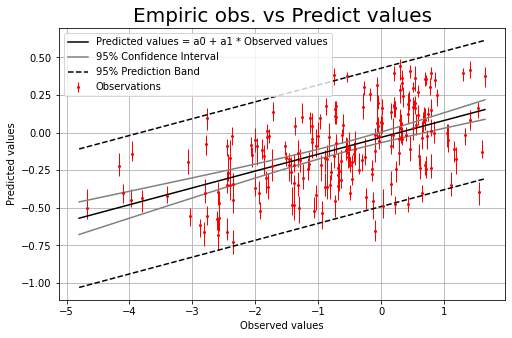

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-4.8, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: A_year: mean - 0.106, median - 0.106, CI - [0.097-0.114]

SHAP-values for: D_cm: mean - 0.07, median - 0.07, CI - [0.065-0.076]

SHAP-values for: F_Soil_ID: mean - 0.054, median - 0.054, CI - [0.048-0.061]

SHAP-values for: G_m2_ha: mean - 0.039, median - 0.038, CI - [0.031-0.045]

SHAP-values for: H_m: mean - 0.042, median - 0.042, CI - [0.037-0.047]

SHAP-values for: M_Soil: mean - 0.022, median - 0.023, CI - [0.018-0.027]

SHAP-values for: Origin_ID: mean - 0.068, median - 0.066, CI - [0.058-0.076]

SHAP-values for: Species_ID: mean - 0.02, median - 0.018, CI - [0.014-0.024]



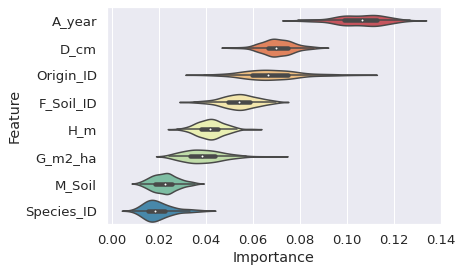

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['A_year', 'D_cm', 'Origin_ID', 'F_Soil_ID', 'H_m',   
  'G_m2_ha', 'M_Soil', 'Species_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [27]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 62.0, median: 62.0,
 pred. interval (P(0.025)-P(0.975)): 62.0-62.0, 
 conf. interval (p-value=0.95): 62.0-62.0 
***
Aggregate bias statistic: 
 mean: 0.529, median: 0.525,
 pred. interval (P(0.025)-P(0.975)): 0.2-0.884, 
 conf. interval (p-value=0.95): 0.377-0.682 
***
Aggregate RMSE statistic: 
 mean: 1.267, median: 1.267, pred. interval (P(0.025)-P(0.975)): 1.002-1.583, 
 conf. interval (p-value=0.95): 1.116-1.424 
***
Aggregate MSE statistic: 
 mean: 1.632, median: 1.606, pred. interval (P(0.025)-P(0.975)): 1.005-2.505, 
 conf. interval (p-value=0.95): 1.248-2.03 
***
Aggregate R^2 statistic: 
 mean: -0.007, median: 0.013, pred. interval (P(0.025)-P(0.975)): -0.32-0.169, 
 conf. interval (p-value=0.95): -0.102-0.102 
***
Aggregate bias(%) statistic: 
 mean: -82.521, median: -84.002, pred. interval (P(0.025)-P(0.975)): -94.85--61.982, 
 conf. interval (p-value=0.95): -89.906--76.1

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

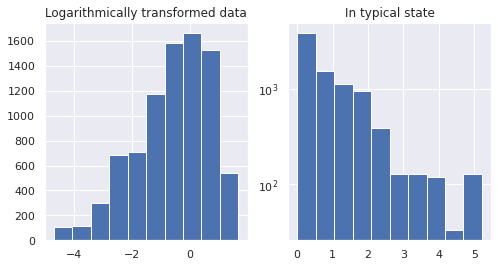

In [28]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [29]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-5, -3, -2, -1, 0, 2])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 0.1, 0.5, 1, 2, 5])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

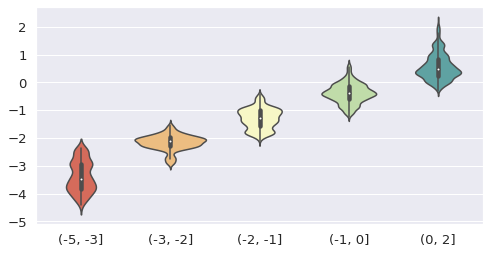

In [30]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

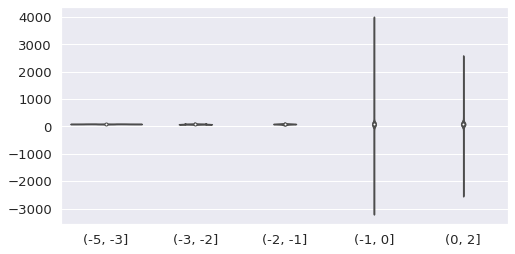

In [31]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

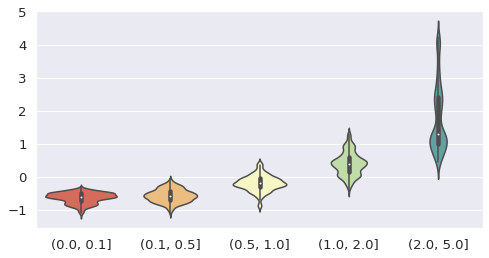

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

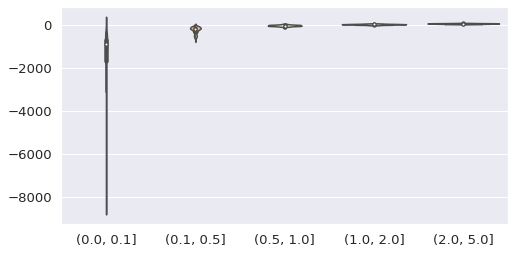

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [34]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [35]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [36]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.70463
[1]	validation_0-rmse:1.69394
[2]	validation_0-rmse:1.68121
[3]	validation_0-rmse:1.66790
[4]	validation_0-rmse:1.65536
[5]	validation_0-rmse:1.64333
[6]	validation_0-rmse:1.63198
[7]	validation_0-rmse:1.61898
[8]	validation_0-rmse:1.60861
[9]	validation_0-rmse:1.59668


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.58722
[11]	validation_0-rmse:1.57550
[12]	validation_0-rmse:1.56441
[13]	validation_0-rmse:1.55489
[14]	validation_0-rmse:1.54483
[15]	validation_0-rmse:1.53500
[16]	validation_0-rmse:1.52534
[17]	validation_0-rmse:1.51509
[18]	validation_0-rmse:1.50525
[19]	validation_0-rmse:1.49474
[20]	validation_0-rmse:1.48550
[21]	validation_0-rmse:1.47525
[22]	validation_0-rmse:1.46689
[23]	validation_0-rmse:1.45817
[24]	validation_0-rmse:1.45015
[25]	validation_0-rmse:1.44236
[26]	validation_0-rmse:1.43421
[27]	validation_0-rmse:1.42518
[28]	validation_0-rmse:1.41637
[29]	validation_0-rmse:1.40733
[30]	validation_0-rmse:1.39761
[31]	validation_0-rmse:1.38944
[32]	validation_0-rmse:1.38092
[33]	validation_0-rmse:1.37175
[34]	validation_0-rmse:1.36371
[35]	validation_0-rmse:1.35599
[36]	validation_0-rmse:1.34593
[37]	validation_0-rmse:1.33861
[38]	validation_0-rmse:1.33179
[39]	validation_0-rmse:1.32410
[40]	validation_0-rmse:1.31584
[41]	validation_0-rmse:1.30765
[42]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [37]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 62


In [38]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

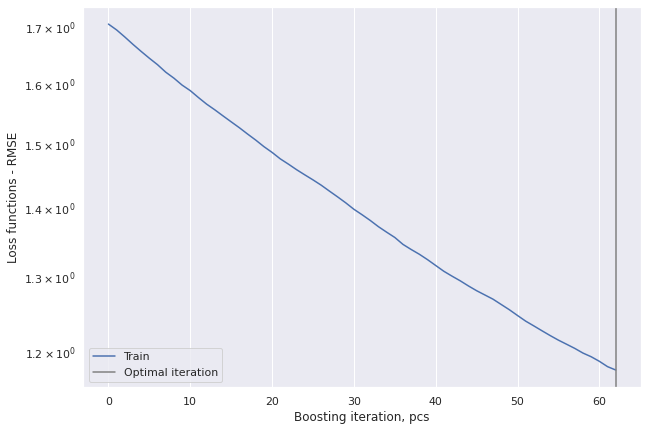

In [39]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [40]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.5
Relative bias(%):  -83.02
RMSE: 1.2
Relative RMSE(%):  -183.776
MSE: 1.4
R square: 16.3%


In [41]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.637
Uncertainty
a0: 0.018+/-0.015
a1: 0.198+/-0.010


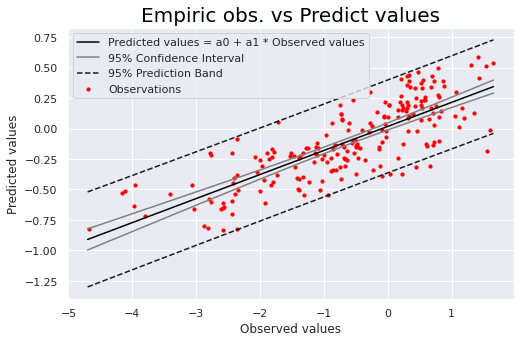

In [42]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-4.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

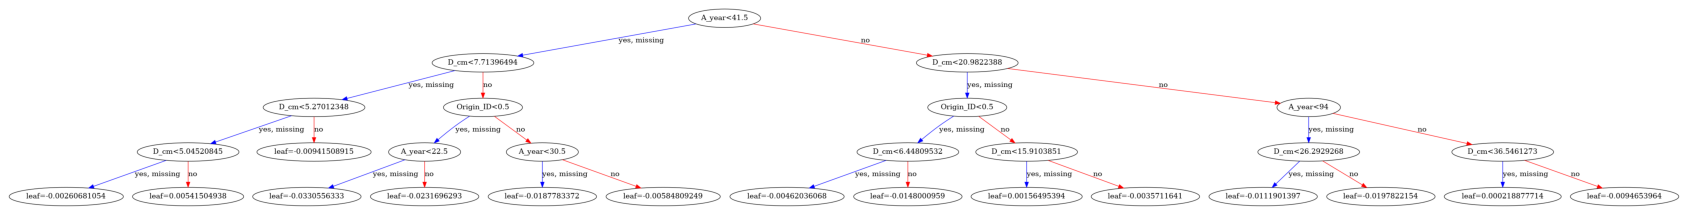

In [45]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

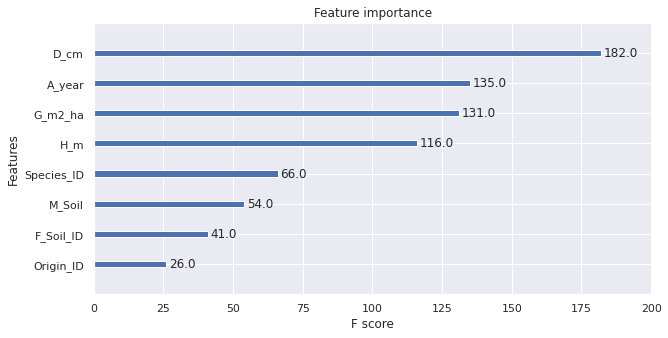

In [47]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

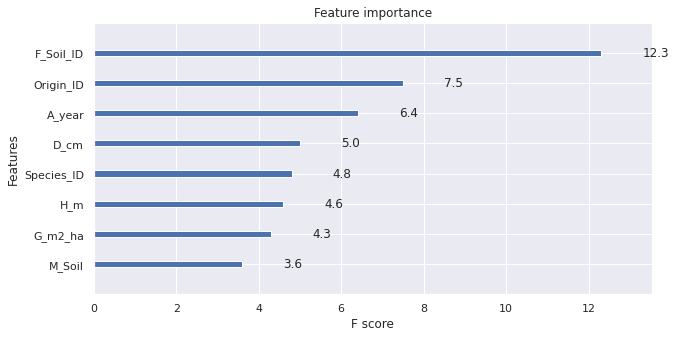

In [48]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

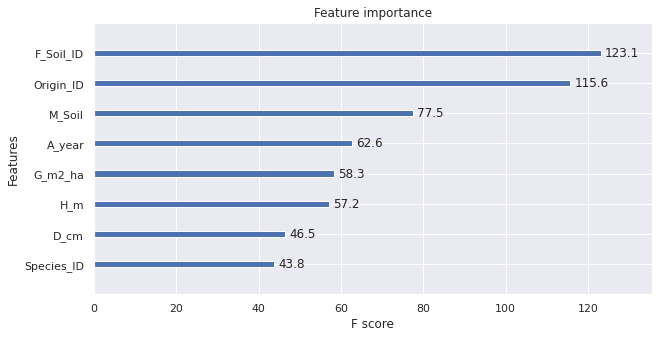

In [49]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [50]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


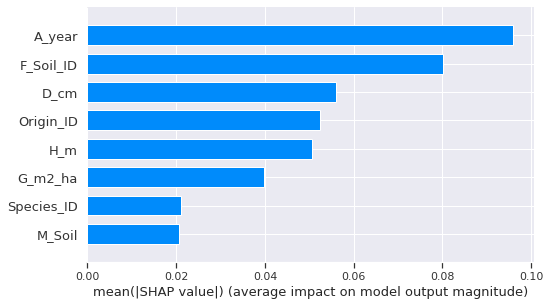

In [52]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

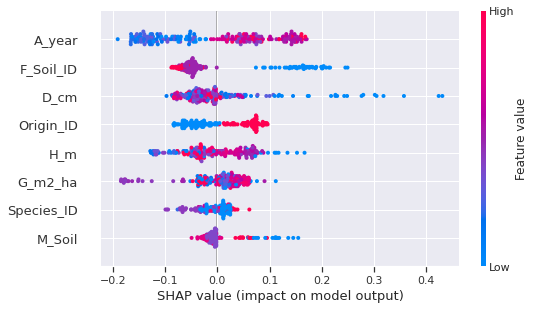

In [53]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


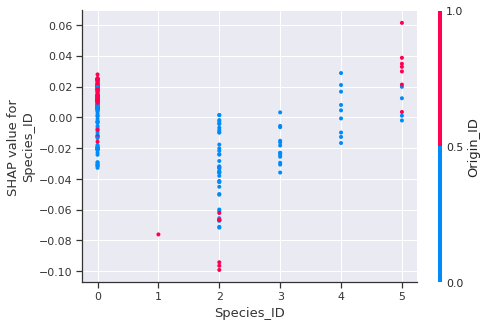

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


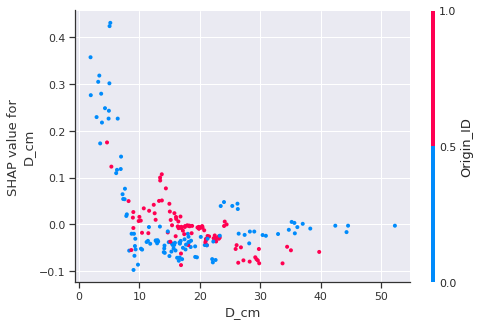

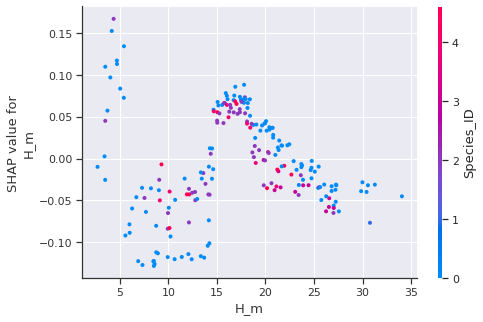

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


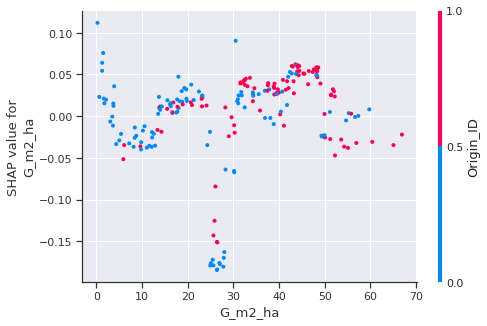

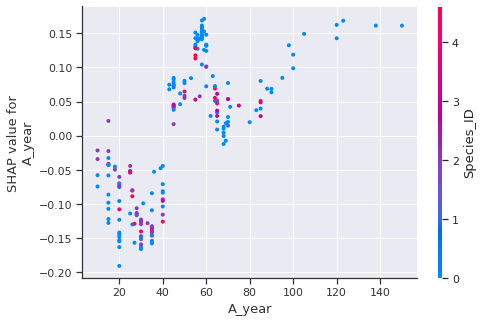

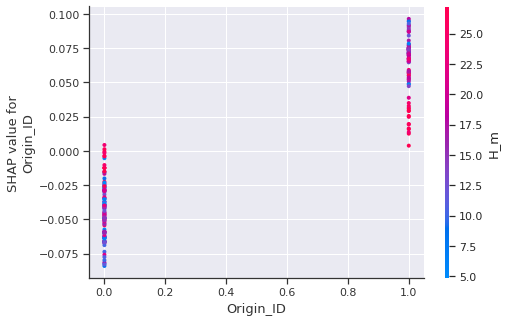

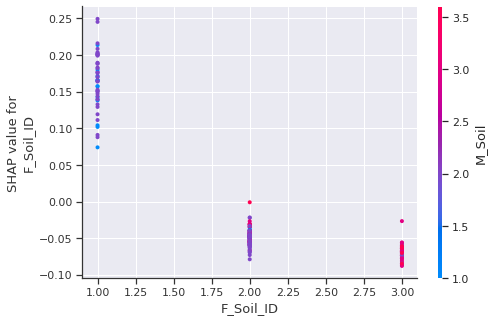

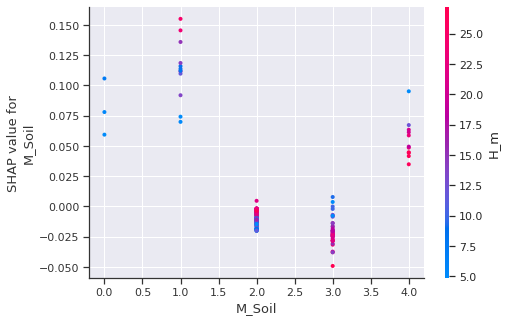

In [54]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [55]:
# Save to JSON
f_xgb_model.save_model("../02_output_data/XGBoost_models/03_LN_Tag_Cs_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../02_output_data/XGBoost_models/03_LN_Tag_Cs_XGB_model.txt")